In [1]:
!pip install keras

In [2]:
!pip install pydot

In [1]:
import string
import numpy as np
from PIL import Image
import os
from pickle import dump, load
import numpy as np

In [2]:
from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers.merge import add
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout

In [3]:
from tqdm.notebook import tqdm
tqdm().pandas()

0it [00:00, ?it/s]

# Loading text file into memory

In [23]:
def load_doc(file_name):
    file = open(file_name,"r")
    text = file.read()
    #print(text)
    file.close()
    return text

# Read or get all images with their captions

In [24]:
def all_img_captions(filename):
    file = load_doc(filename)
    captions = file.split('\n')
    print("caption : ", len(captions))
    descriptions ={}
    for caption in captions:
        img, caption = caption.split('\t')
        print("img",img)
        if img[:-1] not in descriptions:
        #if img not in descriptions:
            descriptions[img[:-1]] = list()
            descriptions[img[:-1]].append(caption)
            #descriptions[img] = list()
        else:
            descriptions[img[:-1]].append(caption)
            #descriptions[img].append(caption)
    return descriptions


# Data cleaning : To lowercase, remove punctuations 

In [25]:
def cleaning_text(captions):
    table = str.maketrans("","",string.punctuation)
    for img,caps in captions.items():
        for i,img_caption in enumerate(caps):
            img_caption.replace("-"," ")
            desc = img_caption.split()
            
            #Lowercase
            desc = [word.lower() for word in desc]
            
            #punctuations
            desc = [word.translate(table) for word in desc]
            
            #hanging 's and a
            desc = [word for word in desc if(len(word)>1)]
            
            #tokens with numbers
            desc = [word for word in desc if(word.isalpha())]
            
            #back to string
            img_caption = " ".join(desc)
            captions[img][i] = img_caption
    return captions

# Unique words

In [26]:
def text_vocabulary(description):
    vocab = set()
    for key in description.keys():
        [vocab.update(d.split()) for d in description[key]]
    return vocab

# Descriptions saved in a file

In [27]:
def save_descriptions(descriptions, filename):
    lines = list()
    for key , desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + "\t" + desc)
    data = "\n".join(lines)
    file = open(filename,"w")
    file.write(data)
    file.close()

# Path to project folder

In [28]:
dataset_text = "D:/NLP"
dataset_images ="D:/NLP/Flicker8k_Dataset"

#prepare text data
filename = dataset_text + "/" + "Flickr8k.token.txt"

In [29]:
filename

'D:/NLP/Flickr8k.token.txt'

In [30]:
#mapping as image to 5 descriptions in description dictionary
descriptions = all_img_captions(filename)
print("Length of descriptions = ",len(descriptions))

caption :  40460
img 1000268201_693b08cb0e.jpg#0
img 1000268201_693b08cb0e.jpg#1
img 1000268201_693b08cb0e.jpg#2
img 1000268201_693b08cb0e.jpg#3
img 1000268201_693b08cb0e.jpg#4
img 1001773457_577c3a7d70.jpg#0
img 1001773457_577c3a7d70.jpg#1
img 1001773457_577c3a7d70.jpg#2
img 1001773457_577c3a7d70.jpg#3
img 1001773457_577c3a7d70.jpg#4
img 1002674143_1b742ab4b8.jpg#0
img 1002674143_1b742ab4b8.jpg#1
img 1002674143_1b742ab4b8.jpg#2
img 1002674143_1b742ab4b8.jpg#3
img 1002674143_1b742ab4b8.jpg#4
img 1003163366_44323f5815.jpg#0
img 1003163366_44323f5815.jpg#1
img 1003163366_44323f5815.jpg#2
img 1003163366_44323f5815.jpg#3
img 1003163366_44323f5815.jpg#4
img 1007129816_e794419615.jpg#0
img 1007129816_e794419615.jpg#1
img 1007129816_e794419615.jpg#2
img 1007129816_e794419615.jpg#3
img 1007129816_e794419615.jpg#4
img 1007320043_627395c3d8.jpg#0
img 1007320043_627395c3d8.jpg#1
img 1007320043_627395c3d8.jpg#2
img 1007320043_627395c3d8.jpg#3
img 1007320043_627395c3d8.jpg#4
img 1009434119_febe4927

img 1167908324_8caab45e15.jpg#2
img 1167908324_8caab45e15.jpg#3
img 1167908324_8caab45e15.jpg#4
img 1169307342_e7a4685a5c.jpg#0
img 1169307342_e7a4685a5c.jpg#1
img 1169307342_e7a4685a5c.jpg#2
img 1169307342_e7a4685a5c.jpg#3
img 1169307342_e7a4685a5c.jpg#4
img 1174525839_7c1e6cfa86.jpg#0
img 1174525839_7c1e6cfa86.jpg#1
img 1174525839_7c1e6cfa86.jpg#2
img 1174525839_7c1e6cfa86.jpg#3
img 1174525839_7c1e6cfa86.jpg#4
img 1174629344_a2e1a2bdbf.jpg#0
img 1174629344_a2e1a2bdbf.jpg#1
img 1174629344_a2e1a2bdbf.jpg#2
img 1174629344_a2e1a2bdbf.jpg#3
img 1174629344_a2e1a2bdbf.jpg#4
img 1176580356_9810d877bf.jpg#0
img 1176580356_9810d877bf.jpg#1
img 1176580356_9810d877bf.jpg#2
img 1176580356_9810d877bf.jpg#3
img 1176580356_9810d877bf.jpg#4
img 1177994172_10d143cb8d.jpg#0
img 1177994172_10d143cb8d.jpg#1
img 1177994172_10d143cb8d.jpg#2
img 1177994172_10d143cb8d.jpg#3
img 1177994172_10d143cb8d.jpg#4
img 1178705300_c224d9a4f1.jpg#0
img 1178705300_c224d9a4f1.jpg#1
img 1178705300_c224d9a4f1.jpg#2
img 1178

img 1299459550_1fd5594fa2.jpg#1
img 1299459550_1fd5594fa2.jpg#2
img 1299459550_1fd5594fa2.jpg#3
img 1299459550_1fd5594fa2.jpg#4
img 1299459562_ed0e064aee.jpg#0
img 1299459562_ed0e064aee.jpg#1
img 1299459562_ed0e064aee.jpg#2
img 1299459562_ed0e064aee.jpg#3
img 1299459562_ed0e064aee.jpg#4
img 1301140633_046e4e8010.jpg#0
img 1301140633_046e4e8010.jpg#1
img 1301140633_046e4e8010.jpg#2
img 1301140633_046e4e8010.jpg#3
img 1301140633_046e4e8010.jpg#4
img 130211457_be3f6b335d.jpg#0
img 130211457_be3f6b335d.jpg#1
img 130211457_be3f6b335d.jpg#2
img 130211457_be3f6b335d.jpg#3
img 130211457_be3f6b335d.jpg#4
img 1302657647_46b36c0d66.jpg#0
img 1302657647_46b36c0d66.jpg#1
img 1302657647_46b36c0d66.jpg#2
img 1302657647_46b36c0d66.jpg#3
img 1302657647_46b36c0d66.jpg#4
img 1303335399_b3facd47ab.jpg#0
img 1303335399_b3facd47ab.jpg#1
img 1303335399_b3facd47ab.jpg#2
img 1303335399_b3facd47ab.jpg#3
img 1303335399_b3facd47ab.jpg#4
img 1303548017_47de590273.jpg#0
img 1303548017_47de590273.jpg#1
img 130354801

img 1425069308_488e5fcf9d.jpg#4
img 1425069590_570cc7c2d8.jpg#0
img 1425069590_570cc7c2d8.jpg#1
img 1425069590_570cc7c2d8.jpg#2
img 1425069590_570cc7c2d8.jpg#3
img 1425069590_570cc7c2d8.jpg#4
img 1425485485_d7c97a5470.jpg#0
img 1425485485_d7c97a5470.jpg#1
img 1425485485_d7c97a5470.jpg#2
img 1425485485_d7c97a5470.jpg#3
img 1425485485_d7c97a5470.jpg#4
img 1425919702_ddb761aeec.jpg#0
img 1425919702_ddb761aeec.jpg#1
img 1425919702_ddb761aeec.jpg#2
img 1425919702_ddb761aeec.jpg#3
img 1425919702_ddb761aeec.jpg#4
img 1426014905_da60d72957.jpg#0
img 1426014905_da60d72957.jpg#1
img 1426014905_da60d72957.jpg#2
img 1426014905_da60d72957.jpg#3
img 1426014905_da60d72957.jpg#4
img 1427391496_ea512cbe7f.jpg#0
img 1427391496_ea512cbe7f.jpg#1
img 1427391496_ea512cbe7f.jpg#2
img 1427391496_ea512cbe7f.jpg#3
img 1427391496_ea512cbe7f.jpg#4
img 142802798_962a4ec5ce.jpg#0
img 142802798_962a4ec5ce.jpg#1
img 142802798_962a4ec5ce.jpg#2
img 142802798_962a4ec5ce.jpg#3
img 142802798_962a4ec5ce.jpg#4
img 142857857

img 1479857177_9d4a6f38fd.jpg#2
img 1479857177_9d4a6f38fd.jpg#3
img 1479857177_9d4a6f38fd.jpg#4
img 1480712062_32a61ad4b7.jpg#0
img 1480712062_32a61ad4b7.jpg#1
img 1480712062_32a61ad4b7.jpg#2
img 1480712062_32a61ad4b7.jpg#3
img 1480712062_32a61ad4b7.jpg#4
img 1481062342_d9e34366c4.jpg#0
img 1481062342_d9e34366c4.jpg#1
img 1481062342_d9e34366c4.jpg#2
img 1481062342_d9e34366c4.jpg#3
img 1481062342_d9e34366c4.jpg#4
img 1482960952_95f2d419cb.jpg#0
img 1482960952_95f2d419cb.jpg#1
img 1482960952_95f2d419cb.jpg#2
img 1482960952_95f2d419cb.jpg#3
img 1482960952_95f2d419cb.jpg#4
img 148512773_bae6901fd6.jpg#0
img 148512773_bae6901fd6.jpg#1
img 148512773_bae6901fd6.jpg#2
img 148512773_bae6901fd6.jpg#3
img 148512773_bae6901fd6.jpg#4
img 1488937076_5baa73fc2a.jpg#0
img 1488937076_5baa73fc2a.jpg#1
img 1488937076_5baa73fc2a.jpg#2
img 1488937076_5baa73fc2a.jpg#3
img 1488937076_5baa73fc2a.jpg#4
img 1489286545_8df476fa26.jpg#0
img 1489286545_8df476fa26.jpg#1
img 1489286545_8df476fa26.jpg#2
img 148928654

img 1689658980_0074d81d28.jpg#2
img 1689658980_0074d81d28.jpg#3
img 1689658980_0074d81d28.jpg#4
img 1691573772_1adef8e40e.jpg#0
img 1691573772_1adef8e40e.jpg#1
img 1691573772_1adef8e40e.jpg#2
img 1691573772_1adef8e40e.jpg#3
img 1691573772_1adef8e40e.jpg#4
img 169490297_b6ff13632a.jpg#0
img 169490297_b6ff13632a.jpg#1
img 169490297_b6ff13632a.jpg#2
img 169490297_b6ff13632a.jpg#3
img 169490297_b6ff13632a.jpg#4
img 170100272_d820db2199.jpg#0
img 170100272_d820db2199.jpg#1
img 170100272_d820db2199.jpg#2
img 170100272_d820db2199.jpg#3
img 170100272_d820db2199.jpg#4
img 1713248047_d03721456d.jpg#0
img 1713248047_d03721456d.jpg#1
img 1713248047_d03721456d.jpg#2
img 1713248047_d03721456d.jpg#3
img 1713248047_d03721456d.jpg#4
img 1713248099_d860df4e10.jpg#0
img 1713248099_d860df4e10.jpg#1
img 1713248099_d860df4e10.jpg#2
img 1713248099_d860df4e10.jpg#3
img 1713248099_d860df4e10.jpg#4
img 1714316707_8bbaa2a2ba.jpg#0
img 1714316707_8bbaa2a2ba.jpg#1
img 1714316707_8bbaa2a2ba.jpg#2
img 1714316707_8bb

img 186348874_75b2cf1ec5.jpg#0
img 186348874_75b2cf1ec5.jpg#1
img 186348874_75b2cf1ec5.jpg#2
img 186348874_75b2cf1ec5.jpg#3
img 186348874_75b2cf1ec5.jpg#4
img 1865794069_6e3a1e57bb.jpg#0
img 1865794069_6e3a1e57bb.jpg#1
img 1865794069_6e3a1e57bb.jpg#2
img 1865794069_6e3a1e57bb.jpg#3
img 1865794069_6e3a1e57bb.jpg#4
img 186890601_8a6b0f1769.jpg#0
img 186890601_8a6b0f1769.jpg#1
img 186890601_8a6b0f1769.jpg#2
img 186890601_8a6b0f1769.jpg#3
img 186890601_8a6b0f1769.jpg#4
img 186890605_ddff5b694e.jpg#0
img 186890605_ddff5b694e.jpg#1
img 186890605_ddff5b694e.jpg#2
img 186890605_ddff5b694e.jpg#3
img 186890605_ddff5b694e.jpg#4
img 1874617189_e85d3f4326.jpg#0
img 1874617189_e85d3f4326.jpg#1
img 1874617189_e85d3f4326.jpg#2
img 1874617189_e85d3f4326.jpg#3
img 1874617189_e85d3f4326.jpg#4
img 1876536922_8fdf8d7028.jpg#0
img 1876536922_8fdf8d7028.jpg#1
img 1876536922_8fdf8d7028.jpg#2
img 1876536922_8fdf8d7028.jpg#3
img 1876536922_8fdf8d7028.jpg#4
img 1881494074_1bebd93089.jpg#0
img 1881494074_1bebd930

img 2063277300_f7ff476914.jpg#4
img 2064417101_3b9d817f4a.jpg#0
img 2064417101_3b9d817f4a.jpg#1
img 2064417101_3b9d817f4a.jpg#2
img 2064417101_3b9d817f4a.jpg#3
img 2064417101_3b9d817f4a.jpg#4
img 2064780645_8f28a1529f.jpg#0
img 2064780645_8f28a1529f.jpg#1
img 2064780645_8f28a1529f.jpg#2
img 2064780645_8f28a1529f.jpg#3
img 2064780645_8f28a1529f.jpg#4
img 2064790732_219e52e19c.jpg#0
img 2064790732_219e52e19c.jpg#1
img 2064790732_219e52e19c.jpg#2
img 2064790732_219e52e19c.jpg#3
img 2064790732_219e52e19c.jpg#4
img 2064792226_97e41d8167.jpg#0
img 2064792226_97e41d8167.jpg#1
img 2064792226_97e41d8167.jpg#2
img 2064792226_97e41d8167.jpg#3
img 2064792226_97e41d8167.jpg#4
img 2065309381_705b774f51.jpg#0
img 2065309381_705b774f51.jpg#1
img 2065309381_705b774f51.jpg#2
img 2065309381_705b774f51.jpg#3
img 2065309381_705b774f51.jpg#4
img 2065875490_a46b58c12b.jpg#0
img 2065875490_a46b58c12b.jpg#1
img 2065875490_a46b58c12b.jpg#2
img 2065875490_a46b58c12b.jpg#3
img 2065875490_a46b58c12b.jpg#4
img 2066

img 2113530024_5bc6a90e42.jpg#1
img 2113530024_5bc6a90e42.jpg#2
img 2113530024_5bc6a90e42.jpg#3
img 2113530024_5bc6a90e42.jpg#4
img 2114126343_a0f74ff63b.jpg#0
img 2114126343_a0f74ff63b.jpg#1
img 2114126343_a0f74ff63b.jpg#2
img 2114126343_a0f74ff63b.jpg#3
img 2114126343_a0f74ff63b.jpg#4
img 2114355355_9d7e2d8178.jpg#0
img 2114355355_9d7e2d8178.jpg#1
img 2114355355_9d7e2d8178.jpg#2
img 2114355355_9d7e2d8178.jpg#3
img 2114355355_9d7e2d8178.jpg#4
img 2114739371_83aa8bdb0e.jpg#0
img 2114739371_83aa8bdb0e.jpg#1
img 2114739371_83aa8bdb0e.jpg#2
img 2114739371_83aa8bdb0e.jpg#3
img 2114739371_83aa8bdb0e.jpg#4
img 2115620856_4fa5025ac6.jpg#0
img 2115620856_4fa5025ac6.jpg#1
img 2115620856_4fa5025ac6.jpg#2
img 2115620856_4fa5025ac6.jpg#3
img 2115620856_4fa5025ac6.jpg#4
img 2115631346_9585a479b0.jpg#0
img 2115631346_9585a479b0.jpg#1
img 2115631346_9585a479b0.jpg#2
img 2115631346_9585a479b0.jpg#3
img 2115631346_9585a479b0.jpg#4
img 2115849046_2aa9fa8d13.jpg#0
img 2115849046_2aa9fa8d13.jpg#1
img 2115

img 2191453879_11dfe2ba3a.jpg#4
img 2192026581_b782d1355a.jpg#0
img 2192026581_b782d1355a.jpg#1
img 2192026581_b782d1355a.jpg#2
img 2192026581_b782d1355a.jpg#3
img 2192026581_b782d1355a.jpg#4
img 2192131110_8a40e7c028.jpg#0
img 2192131110_8a40e7c028.jpg#1
img 2192131110_8a40e7c028.jpg#2
img 2192131110_8a40e7c028.jpg#3
img 2192131110_8a40e7c028.jpg#4
img 2192333873_2a0cbe849d.jpg#0
img 2192333873_2a0cbe849d.jpg#1
img 2192333873_2a0cbe849d.jpg#2
img 2192333873_2a0cbe849d.jpg#3
img 2192333873_2a0cbe849d.jpg#4
img 2192411521_9c7e488c5e.jpg#0
img 2192411521_9c7e488c5e.jpg#1
img 2192411521_9c7e488c5e.jpg#2
img 2192411521_9c7e488c5e.jpg#3
img 2192411521_9c7e488c5e.jpg#4
img 2192475933_d779bf42eb.jpg#0
img 2192475933_d779bf42eb.jpg#1
img 2192475933_d779bf42eb.jpg#2
img 2192475933_d779bf42eb.jpg#3
img 2192475933_d779bf42eb.jpg#4
img 2192802444_b14bb87b95.jpg#0
img 2192802444_b14bb87b95.jpg#1
img 2192802444_b14bb87b95.jpg#2
img 2192802444_b14bb87b95.jpg#3
img 2192802444_b14bb87b95.jpg#4
img 2193

img 2256133102_e2c8314ecb.jpg#0
img 2256133102_e2c8314ecb.jpg#1
img 2256133102_e2c8314ecb.jpg#2
img 2256133102_e2c8314ecb.jpg#3
img 2256133102_e2c8314ecb.jpg#4
img 2256138896_3e24b0b28d.jpg#0
img 2256138896_3e24b0b28d.jpg#1
img 2256138896_3e24b0b28d.jpg#2
img 2256138896_3e24b0b28d.jpg#3
img 2256138896_3e24b0b28d.jpg#4
img 2256218522_53b92bcbb2.jpg#0
img 2256218522_53b92bcbb2.jpg#1
img 2256218522_53b92bcbb2.jpg#2
img 2256218522_53b92bcbb2.jpg#3
img 2256218522_53b92bcbb2.jpg#4
img 2256231539_05c27179f1.jpg#0
img 2256231539_05c27179f1.jpg#1
img 2256231539_05c27179f1.jpg#2
img 2256231539_05c27179f1.jpg#3
img 2256231539_05c27179f1.jpg#4
img 2256320794_0286c31bfa.jpg#0
img 2256320794_0286c31bfa.jpg#1
img 2256320794_0286c31bfa.jpg#2
img 2256320794_0286c31bfa.jpg#3
img 2256320794_0286c31bfa.jpg#4
img 225699652_53f6fb33cd.jpg#0
img 225699652_53f6fb33cd.jpg#1
img 225699652_53f6fb33cd.jpg#2
img 225699652_53f6fb33cd.jpg#3
img 225699652_53f6fb33cd.jpg#4
img 2257099774_37d0d3aa9a.jpg#0
img 225709977

img 2286032269_8ba929709c.jpg#0
img 2286032269_8ba929709c.jpg#1
img 2286032269_8ba929709c.jpg#2
img 2286032269_8ba929709c.jpg#3
img 2286032269_8ba929709c.jpg#4
img 2286235203_af3cd8f243.jpg#0
img 2286235203_af3cd8f243.jpg#1
img 2286235203_af3cd8f243.jpg#2
img 2286235203_af3cd8f243.jpg#3
img 2286235203_af3cd8f243.jpg#4
img 2286236765_2a63eeb550.jpg#0
img 2286236765_2a63eeb550.jpg#1
img 2286236765_2a63eeb550.jpg#2
img 2286236765_2a63eeb550.jpg#3
img 2286236765_2a63eeb550.jpg#4
img 2286239223_d84ffc4e4a.jpg#0
img 2286239223_d84ffc4e4a.jpg#1
img 2286239223_d84ffc4e4a.jpg#2
img 2286239223_d84ffc4e4a.jpg#3
img 2286239223_d84ffc4e4a.jpg#4
img 2286270205_16038dec5a.jpg#0
img 2286270205_16038dec5a.jpg#1
img 2286270205_16038dec5a.jpg#2
img 2286270205_16038dec5a.jpg#3
img 2286270205_16038dec5a.jpg#4
img 2286823363_7d554ea740.jpg#0
img 2286823363_7d554ea740.jpg#1
img 2286823363_7d554ea740.jpg#2
img 2286823363_7d554ea740.jpg#3
img 2286823363_7d554ea740.jpg#4
img 2287023569_fd7a9c60b8.jpg#0
img 2287

img 2335619125_2e2034f2c3.jpg#4
img 2335634931_7e9e8c2959.jpg#0
img 2335634931_7e9e8c2959.jpg#1
img 2335634931_7e9e8c2959.jpg#2
img 2335634931_7e9e8c2959.jpg#3
img 2335634931_7e9e8c2959.jpg#4
img 2337377811_8c81b40a64.jpg#0
img 2337377811_8c81b40a64.jpg#1
img 2337377811_8c81b40a64.jpg#2
img 2337377811_8c81b40a64.jpg#3
img 2337377811_8c81b40a64.jpg#4
img 2337757064_08c4033824.jpg#0
img 2337757064_08c4033824.jpg#1
img 2337757064_08c4033824.jpg#2
img 2337757064_08c4033824.jpg#3
img 2337757064_08c4033824.jpg#4
img 2337809114_899ba61330.jpg#0
img 2337809114_899ba61330.jpg#1
img 2337809114_899ba61330.jpg#2
img 2337809114_899ba61330.jpg#3
img 2337809114_899ba61330.jpg#4
img 2337919839_df83827fa0.jpg#0
img 2337919839_df83827fa0.jpg#1
img 2337919839_df83827fa0.jpg#2
img 2337919839_df83827fa0.jpg#3
img 2337919839_df83827fa0.jpg#4
img 2338627102_6708a9b4fd.jpg#0
img 2338627102_6708a9b4fd.jpg#1
img 2338627102_6708a9b4fd.jpg#2
img 2338627102_6708a9b4fd.jpg#3
img 2338627102_6708a9b4fd.jpg#4
img 2339

img 239807547_4923efc821.jpg#2
img 239807547_4923efc821.jpg#3
img 239807547_4923efc821.jpg#4
img 2398605966_1d0c9e6a20.jpg#0
img 2398605966_1d0c9e6a20.jpg#1
img 2398605966_1d0c9e6a20.jpg#2
img 2398605966_1d0c9e6a20.jpg#3
img 2398605966_1d0c9e6a20.jpg#4
img 2399114095_c3196ff456.jpg#0
img 2399114095_c3196ff456.jpg#1
img 2399114095_c3196ff456.jpg#2
img 2399114095_c3196ff456.jpg#3
img 2399114095_c3196ff456.jpg#4
img 2399219552_bbba0a9a59.jpg#0
img 2399219552_bbba0a9a59.jpg#1
img 2399219552_bbba0a9a59.jpg#2
img 2399219552_bbba0a9a59.jpg#3
img 2399219552_bbba0a9a59.jpg#4
img 2399551242_c62a46dd5f.jpg#0
img 2399551242_c62a46dd5f.jpg#1
img 2399551242_c62a46dd5f.jpg#2
img 2399551242_c62a46dd5f.jpg#3
img 2399551242_c62a46dd5f.jpg#4
img 2400958566_4e09424046.jpg#0
img 2400958566_4e09424046.jpg#1
img 2400958566_4e09424046.jpg#2
img 2400958566_4e09424046.jpg#3
img 2400958566_4e09424046.jpg#4
img 2402462857_7684848704.jpg#0
img 2402462857_7684848704.jpg#1
img 2402462857_7684848704.jpg#2
img 2402462

img 242109387_e497277e07.jpg#4
img 2421446839_fe7d46c177.jpg#0
img 2421446839_fe7d46c177.jpg#1
img 2421446839_fe7d46c177.jpg#2
img 2421446839_fe7d46c177.jpg#3
img 2421446839_fe7d46c177.jpg#4
img 2422018883_336519b5c6.jpg#0
img 2422018883_336519b5c6.jpg#1
img 2422018883_336519b5c6.jpg#2
img 2422018883_336519b5c6.jpg#3
img 2422018883_336519b5c6.jpg#4
img 2422302286_385725e3cf.jpg#0
img 2422302286_385725e3cf.jpg#1
img 2422302286_385725e3cf.jpg#2
img 2422302286_385725e3cf.jpg#3
img 2422302286_385725e3cf.jpg#4
img 2422482455_b98d9c2120.jpg#0
img 2422482455_b98d9c2120.jpg#1
img 2422482455_b98d9c2120.jpg#2
img 2422482455_b98d9c2120.jpg#3
img 2422482455_b98d9c2120.jpg#4
img 2423085253_6c19149855.jpg#0
img 2423085253_6c19149855.jpg#1
img 2423085253_6c19149855.jpg#2
img 2423085253_6c19149855.jpg#3
img 2423085253_6c19149855.jpg#4
img 2423138514_950f79e432.jpg#0
img 2423138514_950f79e432.jpg#1
img 2423138514_950f79e432.jpg#2
img 2423138514_950f79e432.jpg#3
img 2423138514_950f79e432.jpg#4
img 24232

img 2452238877_2340609c6e.jpg#2
img 2452238877_2340609c6e.jpg#3
img 2452238877_2340609c6e.jpg#4
img 2452334314_a7c443a787.jpg#0
img 2452334314_a7c443a787.jpg#1
img 2452334314_a7c443a787.jpg#2
img 2452334314_a7c443a787.jpg#3
img 2452334314_a7c443a787.jpg#4
img 245252561_4f20f1c89e.jpg#0
img 245252561_4f20f1c89e.jpg#1
img 245252561_4f20f1c89e.jpg#2
img 245252561_4f20f1c89e.jpg#3
img 245252561_4f20f1c89e.jpg#4
img 2452686995_621878f561.jpg#0
img 2452686995_621878f561.jpg#1
img 2452686995_621878f561.jpg#2
img 2452686995_621878f561.jpg#3
img 2452686995_621878f561.jpg#4
img 2453318633_550228acd4.jpg#0
img 2453318633_550228acd4.jpg#1
img 2453318633_550228acd4.jpg#2
img 2453318633_550228acd4.jpg#3
img 2453318633_550228acd4.jpg#4
img 2453891449_fedb277908.jpg#0
img 2453891449_fedb277908.jpg#1
img 2453891449_fedb277908.jpg#2
img 2453891449_fedb277908.jpg#3
img 2453891449_fedb277908.jpg#4
img 2453971388_76616b6a82.jpg#0
img 2453971388_76616b6a82.jpg#1
img 2453971388_76616b6a82.jpg#2
img 245397138

img 2500354186_0836309cc9.jpg#4
img 2500567791_101d5ddee3.jpg#0
img 2500567791_101d5ddee3.jpg#1
img 2500567791_101d5ddee3.jpg#2
img 2500567791_101d5ddee3.jpg#3
img 2500567791_101d5ddee3.jpg#4
img 2500826039_165e75b20c.jpg#0
img 2500826039_165e75b20c.jpg#1
img 2500826039_165e75b20c.jpg#2
img 2500826039_165e75b20c.jpg#3
img 2500826039_165e75b20c.jpg#4
img 2501595799_6316001e89.jpg#0
img 2501595799_6316001e89.jpg#1
img 2501595799_6316001e89.jpg#2
img 2501595799_6316001e89.jpg#3
img 2501595799_6316001e89.jpg#4
img 2501742763_b2cb322087.jpg#0
img 2501742763_b2cb322087.jpg#1
img 2501742763_b2cb322087.jpg#2
img 2501742763_b2cb322087.jpg#3
img 2501742763_b2cb322087.jpg#4
img 2501942587_e59b91d1da.jpg#0
img 2501942587_e59b91d1da.jpg#1
img 2501942587_e59b91d1da.jpg#2
img 2501942587_e59b91d1da.jpg#3
img 2501942587_e59b91d1da.jpg#4
img 2501968935_02f2cd8079.jpg#0
img 2501968935_02f2cd8079.jpg#1
img 2501968935_02f2cd8079.jpg#2
img 2501968935_02f2cd8079.jpg#3
img 2501968935_02f2cd8079.jpg#4
img 2502

img 2533414541_362bf043bb.jpg#4
img 2533424347_cf2f84872b.jpg#0
img 2533424347_cf2f84872b.jpg#1
img 2533424347_cf2f84872b.jpg#2
img 2533424347_cf2f84872b.jpg#3
img 2533424347_cf2f84872b.jpg#4
img 2533642917_a5eace85e6.jpg#0
img 2533642917_a5eace85e6.jpg#1
img 2533642917_a5eace85e6.jpg#2
img 2533642917_a5eace85e6.jpg#3
img 2533642917_a5eace85e6.jpg#4
img 2534194182_ac53035cf4.jpg#0
img 2534194182_ac53035cf4.jpg#1
img 2534194182_ac53035cf4.jpg#2
img 2534194182_ac53035cf4.jpg#3
img 2534194182_ac53035cf4.jpg#4
img 2534424894_ccd091fcb5.jpg#0
img 2534424894_ccd091fcb5.jpg#1
img 2534424894_ccd091fcb5.jpg#2
img 2534424894_ccd091fcb5.jpg#3
img 2534424894_ccd091fcb5.jpg#4
img 2534502836_7a75305655.jpg#0
img 2534502836_7a75305655.jpg#1
img 2534502836_7a75305655.jpg#2
img 2534502836_7a75305655.jpg#3
img 2534502836_7a75305655.jpg#4
img 2534652796_c8a23288ab.jpg#0
img 2534652796_c8a23288ab.jpg#1
img 2534652796_c8a23288ab.jpg#2
img 2534652796_c8a23288ab.jpg#3
img 2534652796_c8a23288ab.jpg#4
img 2535

img 2586028627_ddd054d8cc.jpg#4
img 2586532797_dcf22a5021.jpg#0
img 2586532797_dcf22a5021.jpg#1
img 2586532797_dcf22a5021.jpg#2
img 2586532797_dcf22a5021.jpg#3
img 2586532797_dcf22a5021.jpg#4
img 2586911841_41b7a48c91.jpg#0
img 2586911841_41b7a48c91.jpg#1
img 2586911841_41b7a48c91.jpg#2
img 2586911841_41b7a48c91.jpg#3
img 2586911841_41b7a48c91.jpg#4
img 2587017287_888c811b5a.jpg#0
img 2587017287_888c811b5a.jpg#1
img 2587017287_888c811b5a.jpg#2
img 2587017287_888c811b5a.jpg#3
img 2587017287_888c811b5a.jpg#4
img 2587106431_1cc0e719c6.jpg#0
img 2587106431_1cc0e719c6.jpg#1
img 2587106431_1cc0e719c6.jpg#2
img 2587106431_1cc0e719c6.jpg#3
img 2587106431_1cc0e719c6.jpg#4
img 2587696611_db0378710f.jpg#0
img 2587696611_db0378710f.jpg#1
img 2587696611_db0378710f.jpg#2
img 2587696611_db0378710f.jpg#3
img 2587696611_db0378710f.jpg#4
img 2587818583_4aa8e7b174.jpg#0
img 2587818583_4aa8e7b174.jpg#1
img 2587818583_4aa8e7b174.jpg#2
img 2587818583_4aa8e7b174.jpg#3
img 2587818583_4aa8e7b174.jpg#4
img 2587

img 2612040125_0a93889f06.jpg#4
img 2612488996_9450de0e54.jpg#0
img 2612488996_9450de0e54.jpg#1
img 2612488996_9450de0e54.jpg#2
img 2612488996_9450de0e54.jpg#3
img 2612488996_9450de0e54.jpg#4
img 2612608861_92beaa3d0b.jpg#0
img 2612608861_92beaa3d0b.jpg#1
img 2612608861_92beaa3d0b.jpg#2
img 2612608861_92beaa3d0b.jpg#3
img 2612608861_92beaa3d0b.jpg#4
img 2612949583_f45b3afe33.jpg#0
img 2612949583_f45b3afe33.jpg#1
img 2612949583_f45b3afe33.jpg#2
img 2612949583_f45b3afe33.jpg#3
img 2612949583_f45b3afe33.jpg#4
img 2613021139_4b0dc3d4c8.jpg#0
img 2613021139_4b0dc3d4c8.jpg#1
img 2613021139_4b0dc3d4c8.jpg#2
img 2613021139_4b0dc3d4c8.jpg#3
img 2613021139_4b0dc3d4c8.jpg#4
img 2613209320_edf6a2b7e9.jpg#0
img 2613209320_edf6a2b7e9.jpg#1
img 2613209320_edf6a2b7e9.jpg#2
img 2613209320_edf6a2b7e9.jpg#3
img 2613209320_edf6a2b7e9.jpg#4
img 2613889835_6f50a3b83b.jpg#0
img 2613889835_6f50a3b83b.jpg#1
img 2613889835_6f50a3b83b.jpg#2
img 2613889835_6f50a3b83b.jpg#3
img 2613889835_6f50a3b83b.jpg#4
img 2613

img 2661567396_cbe4c2e5be.jpg#4
img 2662262499_3cdf49cedd.jpg#0
img 2662262499_3cdf49cedd.jpg#1
img 2662262499_3cdf49cedd.jpg#2
img 2662262499_3cdf49cedd.jpg#3
img 2662262499_3cdf49cedd.jpg#4
img 2662537919_18a29fca8a.jpg#0
img 2662537919_18a29fca8a.jpg#1
img 2662537919_18a29fca8a.jpg#2
img 2662537919_18a29fca8a.jpg#3
img 2662537919_18a29fca8a.jpg#4
img 2662570182_350baa020f.jpg#0
img 2662570182_350baa020f.jpg#1
img 2662570182_350baa020f.jpg#2
img 2662570182_350baa020f.jpg#3
img 2662570182_350baa020f.jpg#4
img 2662816021_ac474e0fde.jpg#0
img 2662816021_ac474e0fde.jpg#1
img 2662816021_ac474e0fde.jpg#2
img 2662816021_ac474e0fde.jpg#3
img 2662816021_ac474e0fde.jpg#4
img 2662845514_8620aaee96.jpg#0
img 2662845514_8620aaee96.jpg#1
img 2662845514_8620aaee96.jpg#2
img 2662845514_8620aaee96.jpg#3
img 2662845514_8620aaee96.jpg#4
img 2662890367_382eaf83bd.jpg#0
img 2662890367_382eaf83bd.jpg#1
img 2662890367_382eaf83bd.jpg#2
img 2662890367_382eaf83bd.jpg#3
img 2662890367_382eaf83bd.jpg#4
img 2663

img 2695093520_5cfeb0729d.jpg#2
img 2695093520_5cfeb0729d.jpg#3
img 2695093520_5cfeb0729d.jpg#4
img 2695961935_a2a6338f26.jpg#0
img 2695961935_a2a6338f26.jpg#1
img 2695961935_a2a6338f26.jpg#2
img 2695961935_a2a6338f26.jpg#3
img 2695961935_a2a6338f26.jpg#4
img 2695962887_a1647c567b.jpg#0
img 2695962887_a1647c567b.jpg#1
img 2695962887_a1647c567b.jpg#2
img 2695962887_a1647c567b.jpg#3
img 2695962887_a1647c567b.jpg#4
img 2696060728_3043cfc38c.jpg#0
img 2696060728_3043cfc38c.jpg#1
img 2696060728_3043cfc38c.jpg#2
img 2696060728_3043cfc38c.jpg#3
img 2696060728_3043cfc38c.jpg#4
img 269630255_c3ec75c792.jpg#0
img 269630255_c3ec75c792.jpg#1
img 269630255_c3ec75c792.jpg#2
img 269630255_c3ec75c792.jpg#3
img 269630255_c3ec75c792.jpg#4
img 2696394827_7342ced36f.jpg#0
img 2696394827_7342ced36f.jpg#1
img 2696394827_7342ced36f.jpg#2
img 2696394827_7342ced36f.jpg#3
img 2696394827_7342ced36f.jpg#4
img 269650644_059a84ece5.jpg#0
img 269650644_059a84ece5.jpg#1
img 269650644_059a84ece5.jpg#2
img 269650644_05

img 2747640247_b54bfa6886.jpg#2
img 2747640247_b54bfa6886.jpg#3
img 2747640247_b54bfa6886.jpg#4
img 2747714500_49476225c6.jpg#0
img 2747714500_49476225c6.jpg#1
img 2747714500_49476225c6.jpg#2
img 2747714500_49476225c6.jpg#3
img 2747714500_49476225c6.jpg#4
img 2748435417_ea7bbcc17c.jpg#0
img 2748435417_ea7bbcc17c.jpg#1
img 2748435417_ea7bbcc17c.jpg#2
img 2748435417_ea7bbcc17c.jpg#3
img 2748435417_ea7bbcc17c.jpg#4
img 2748729903_3c7c920c4d.jpg#0
img 2748729903_3c7c920c4d.jpg#1
img 2748729903_3c7c920c4d.jpg#2
img 2748729903_3c7c920c4d.jpg#3
img 2748729903_3c7c920c4d.jpg#4
img 2749124446_d4432787b5.jpg#0
img 2749124446_d4432787b5.jpg#1
img 2749124446_d4432787b5.jpg#2
img 2749124446_d4432787b5.jpg#3
img 2749124446_d4432787b5.jpg#4
img 275002371_5b200e6a92.jpg#0
img 275002371_5b200e6a92.jpg#1
img 275002371_5b200e6a92.jpg#2
img 275002371_5b200e6a92.jpg#3
img 275002371_5b200e6a92.jpg#4
img 2750832671_4b39f06acf.jpg#0
img 2750832671_4b39f06acf.jpg#1
img 2750832671_4b39f06acf.jpg#2
img 275083267

img 2795352290_9209b214f3.jpg#2
img 2795352290_9209b214f3.jpg#3
img 2795352290_9209b214f3.jpg#4
img 279550225_d64d56158a.jpg#0
img 279550225_d64d56158a.jpg#1
img 279550225_d64d56158a.jpg#2
img 279550225_d64d56158a.jpg#3
img 279550225_d64d56158a.jpg#4
img 2795866891_7559fd8422.jpg#0
img 2795866891_7559fd8422.jpg#1
img 2795866891_7559fd8422.jpg#2
img 2795866891_7559fd8422.jpg#3
img 2795866891_7559fd8422.jpg#4
img 2796801478_8ebd7e550b.jpg#0
img 2796801478_8ebd7e550b.jpg#1
img 2796801478_8ebd7e550b.jpg#2
img 2796801478_8ebd7e550b.jpg#3
img 2796801478_8ebd7e550b.jpg#4
img 2797149878_bb8e27ecf9.jpg#0
img 2797149878_bb8e27ecf9.jpg#1
img 2797149878_bb8e27ecf9.jpg#2
img 2797149878_bb8e27ecf9.jpg#3
img 2797149878_bb8e27ecf9.jpg#4
img 2797185895_4d9e1e9508.jpg#0
img 2797185895_4d9e1e9508.jpg#1
img 2797185895_4d9e1e9508.jpg#2
img 2797185895_4d9e1e9508.jpg#3
img 2797185895_4d9e1e9508.jpg#4
img 2797188545_aeb26c54c0.jpg#0
img 2797188545_aeb26c54c0.jpg#1
img 2797188545_aeb26c54c0.jpg#2
img 279718854

img 2848977044_446a31d86e.jpg#2
img 2848977044_446a31d86e.jpg#3
img 2848977044_446a31d86e.jpg#4
img 2849194983_2968c72832.jpg#0
img 2849194983_2968c72832.jpg#1
img 2849194983_2968c72832.jpg#2
img 2849194983_2968c72832.jpg#3
img 2849194983_2968c72832.jpg#4
img 2850719435_221f15e951.jpg#0
img 2850719435_221f15e951.jpg#1
img 2850719435_221f15e951.jpg#2
img 2850719435_221f15e951.jpg#3
img 2850719435_221f15e951.jpg#4
img 2851198725_37b6027625.jpg#0
img 2851198725_37b6027625.jpg#1
img 2851198725_37b6027625.jpg#2
img 2851198725_37b6027625.jpg#3
img 2851198725_37b6027625.jpg#4
img 2851304910_b5721199bc.jpg#0
img 2851304910_b5721199bc.jpg#1
img 2851304910_b5721199bc.jpg#2
img 2851304910_b5721199bc.jpg#3
img 2851304910_b5721199bc.jpg#4
img 2851931813_eaf8ed7be3.jpg#0
img 2851931813_eaf8ed7be3.jpg#1
img 2851931813_eaf8ed7be3.jpg#2
img 2851931813_eaf8ed7be3.jpg#3
img 2851931813_eaf8ed7be3.jpg#4
img 2852982055_8112d0964f.jpg#0
img 2852982055_8112d0964f.jpg#1
img 2852982055_8112d0964f.jpg#2
img 2852

img 2891961886_b7a2f0b0fd.jpg#1
img 2891961886_b7a2f0b0fd.jpg#2
img 2891961886_b7a2f0b0fd.jpg#3
img 2891961886_b7a2f0b0fd.jpg#4
img 2892395757_0a1b0eedd2.jpg#0
img 2892395757_0a1b0eedd2.jpg#1
img 2892395757_0a1b0eedd2.jpg#2
img 2892395757_0a1b0eedd2.jpg#3
img 2892395757_0a1b0eedd2.jpg#4
img 2892413015_5ecd9d972a.jpg#0
img 2892413015_5ecd9d972a.jpg#1
img 2892413015_5ecd9d972a.jpg#2
img 2892413015_5ecd9d972a.jpg#3
img 2892413015_5ecd9d972a.jpg#4
img 2892467862_52a3c67418.jpg#0
img 2892467862_52a3c67418.jpg#1
img 2892467862_52a3c67418.jpg#2
img 2892467862_52a3c67418.jpg#3
img 2892467862_52a3c67418.jpg#4
img 2892989340_bb7e0e5548.jpg#0
img 2892989340_bb7e0e5548.jpg#1
img 2892989340_bb7e0e5548.jpg#2
img 2892989340_bb7e0e5548.jpg#3
img 2892989340_bb7e0e5548.jpg#4
img 2892992529_f3335d0a71.jpg#0
img 2892992529_f3335d0a71.jpg#1
img 2892992529_f3335d0a71.jpg#2
img 2892992529_f3335d0a71.jpg#3
img 2892992529_f3335d0a71.jpg#4
img 2892995070_39f3c9a56e.jpg#0
img 2892995070_39f3c9a56e.jpg#1
img 2892

img 2917843040_7c9caaaa8a.jpg#0
img 2917843040_7c9caaaa8a.jpg#1
img 2917843040_7c9caaaa8a.jpg#2
img 2917843040_7c9caaaa8a.jpg#3
img 2917843040_7c9caaaa8a.jpg#4
img 2918653119_f535fc25c4.jpg#0
img 2918653119_f535fc25c4.jpg#1
img 2918653119_f535fc25c4.jpg#2
img 2918653119_f535fc25c4.jpg#3
img 2918653119_f535fc25c4.jpg#4
img 2918769188_565dd48060.jpg#0
img 2918769188_565dd48060.jpg#1
img 2918769188_565dd48060.jpg#2
img 2918769188_565dd48060.jpg#3
img 2918769188_565dd48060.jpg#4
img 2918880895_e61f74f2f0.jpg#0
img 2918880895_e61f74f2f0.jpg#1
img 2918880895_e61f74f2f0.jpg#2
img 2918880895_e61f74f2f0.jpg#3
img 2918880895_e61f74f2f0.jpg#4
img 2919459517_b8b858afa3.jpg#0
img 2919459517_b8b858afa3.jpg#1
img 2919459517_b8b858afa3.jpg#2
img 2919459517_b8b858afa3.jpg#3
img 2919459517_b8b858afa3.jpg#4
img 291952021_f111b0fb3d.jpg#0
img 291952021_f111b0fb3d.jpg#1
img 291952021_f111b0fb3d.jpg#2
img 291952021_f111b0fb3d.jpg#3
img 291952021_f111b0fb3d.jpg#4
img 2920305300_a5b1b2329a.jpg#0
img 292030530

img 2956413620_d59de03a06.jpg#3
img 2956413620_d59de03a06.jpg#4
img 2956562716_5aa3f6ef38.jpg#0
img 2956562716_5aa3f6ef38.jpg#1
img 2956562716_5aa3f6ef38.jpg#2
img 2956562716_5aa3f6ef38.jpg#3
img 2956562716_5aa3f6ef38.jpg#4
img 2956895529_ec6275060e.jpg#0
img 2956895529_ec6275060e.jpg#1
img 2956895529_ec6275060e.jpg#2
img 2956895529_ec6275060e.jpg#3
img 2956895529_ec6275060e.jpg#4
img 2957071266_1b40ec7d96.jpg#0
img 2957071266_1b40ec7d96.jpg#1
img 2957071266_1b40ec7d96.jpg#2
img 2957071266_1b40ec7d96.jpg#3
img 2957071266_1b40ec7d96.jpg#4
img 295729735_8360f2e64c.jpg#0
img 295729735_8360f2e64c.jpg#1
img 295729735_8360f2e64c.jpg#2
img 295729735_8360f2e64c.jpg#3
img 295729735_8360f2e64c.jpg#4
img 2959500257_3621429a37.jpg#0
img 2959500257_3621429a37.jpg#1
img 2959500257_3621429a37.jpg#2
img 2959500257_3621429a37.jpg#3
img 2959500257_3621429a37.jpg#4
img 2959581023_54402c8d88.jpg#0
img 2959581023_54402c8d88.jpg#1
img 2959581023_54402c8d88.jpg#2
img 2959581023_54402c8d88.jpg#3
img 295958102

img 300922408_05a4f9938c.jpg#1
img 300922408_05a4f9938c.jpg#2
img 300922408_05a4f9938c.jpg#3
img 300922408_05a4f9938c.jpg#4
img 3009383694_e045c6169e.jpg#0
img 3009383694_e045c6169e.jpg#1
img 3009383694_e045c6169e.jpg#2
img 3009383694_e045c6169e.jpg#3
img 3009383694_e045c6169e.jpg#4
img 3009644534_992e9ea2a7.jpg#0
img 3009644534_992e9ea2a7.jpg#1
img 3009644534_992e9ea2a7.jpg#2
img 3009644534_992e9ea2a7.jpg#3
img 3009644534_992e9ea2a7.jpg#4
img 3012513414_86180c44cb.jpg#0
img 3012513414_86180c44cb.jpg#1
img 3012513414_86180c44cb.jpg#2
img 3012513414_86180c44cb.jpg#3
img 3012513414_86180c44cb.jpg#4
img 3013469764_30e84e9a0d.jpg#0
img 3013469764_30e84e9a0d.jpg#1
img 3013469764_30e84e9a0d.jpg#2
img 3013469764_30e84e9a0d.jpg#3
img 3013469764_30e84e9a0d.jpg#4
img 3014015906_fdba461f36.jpg#0
img 3014015906_fdba461f36.jpg#1
img 3014015906_fdba461f36.jpg#2
img 3014015906_fdba461f36.jpg#3
img 3014015906_fdba461f36.jpg#4
img 3014080715_f4f0dbb56e.jpg#0
img 3014080715_f4f0dbb56e.jpg#1
img 30140807

img 3043266735_904dda6ded.jpg#3
img 3043266735_904dda6ded.jpg#4
img 3043501068_be58ac47e1.jpg#0
img 3043501068_be58ac47e1.jpg#1
img 3043501068_be58ac47e1.jpg#2
img 3043501068_be58ac47e1.jpg#3
img 3043501068_be58ac47e1.jpg#4
img 3043685748_130db75e3b.jpg#0
img 3043685748_130db75e3b.jpg#1
img 3043685748_130db75e3b.jpg#2
img 3043685748_130db75e3b.jpg#3
img 3043685748_130db75e3b.jpg#4
img 3043904009_3b5e0412cd.jpg#0
img 3043904009_3b5e0412cd.jpg#1
img 3043904009_3b5e0412cd.jpg#2
img 3043904009_3b5e0412cd.jpg#3
img 3043904009_3b5e0412cd.jpg#4
img 3043908909_bb54d2c08e.jpg#0
img 3043908909_bb54d2c08e.jpg#1
img 3043908909_bb54d2c08e.jpg#2
img 3043908909_bb54d2c08e.jpg#3
img 3043908909_bb54d2c08e.jpg#4
img 304408047_98bab3ea64.jpg#0
img 304408047_98bab3ea64.jpg#1
img 304408047_98bab3ea64.jpg#2
img 304408047_98bab3ea64.jpg#3
img 304408047_98bab3ea64.jpg#4
img 3044359043_627488ddf0.jpg#0
img 3044359043_627488ddf0.jpg#1
img 3044359043_627488ddf0.jpg#2
img 3044359043_627488ddf0.jpg#3
img 304435904

img 3079073247_97e88e2eb7.jpg#4
img 3079341641_f65f6b0f8b.jpg#0
img 3079341641_f65f6b0f8b.jpg#1
img 3079341641_f65f6b0f8b.jpg#2
img 3079341641_f65f6b0f8b.jpg#3
img 3079341641_f65f6b0f8b.jpg#4
img 3079786914_fe598b0e54.jpg#0
img 3079786914_fe598b0e54.jpg#1
img 3079786914_fe598b0e54.jpg#2
img 3079786914_fe598b0e54.jpg#3
img 3079786914_fe598b0e54.jpg#4
img 3079787482_0757e9d167.jpg#0
img 3079787482_0757e9d167.jpg#1
img 3079787482_0757e9d167.jpg#2
img 3079787482_0757e9d167.jpg#3
img 3079787482_0757e9d167.jpg#4
img 3079917032_3cfacb2fd7.jpg#0
img 3079917032_3cfacb2fd7.jpg#1
img 3079917032_3cfacb2fd7.jpg#2
img 3079917032_3cfacb2fd7.jpg#3
img 3079917032_3cfacb2fd7.jpg#4
img 307994435_592f933a6d.jpg#0
img 307994435_592f933a6d.jpg#1
img 307994435_592f933a6d.jpg#2
img 307994435_592f933a6d.jpg#3
img 307994435_592f933a6d.jpg#4
img 3080056515_3013830309.jpg#0
img 3080056515_3013830309.jpg#1
img 3080056515_3013830309.jpg#2
img 3080056515_3013830309.jpg#3
img 3080056515_3013830309.jpg#4
img 308014594

img 3106340185_80d0cb770a.jpg#0
img 3106340185_80d0cb770a.jpg#1
img 3106340185_80d0cb770a.jpg#2
img 3106340185_80d0cb770a.jpg#3
img 3106340185_80d0cb770a.jpg#4
img 3106562372_e349a27764.jpg#0
img 3106562372_e349a27764.jpg#1
img 3106562372_e349a27764.jpg#2
img 3106562372_e349a27764.jpg#3
img 3106562372_e349a27764.jpg#4
img 3106782647_b078830a9e.jpg#0
img 3106782647_b078830a9e.jpg#1
img 3106782647_b078830a9e.jpg#2
img 3106782647_b078830a9e.jpg#3
img 3106782647_b078830a9e.jpg#4
img 3106787167_e5f2312622.jpg#0
img 3106787167_e5f2312622.jpg#1
img 3106787167_e5f2312622.jpg#2
img 3106787167_e5f2312622.jpg#3
img 3106787167_e5f2312622.jpg#4
img 3106791484_13e18c33d8.jpg#0
img 3106791484_13e18c33d8.jpg#1
img 3106791484_13e18c33d8.jpg#2
img 3106791484_13e18c33d8.jpg#3
img 3106791484_13e18c33d8.jpg#4
img 3106857210_07a92577fc.jpg#0
img 3106857210_07a92577fc.jpg#1
img 3106857210_07a92577fc.jpg#2
img 3106857210_07a92577fc.jpg#3
img 3106857210_07a92577fc.jpg#4
img 3106883334_419f3fb16f.jpg#0
img 3106

img 3138504165_c7ae396294.jpg#0
img 3138504165_c7ae396294.jpg#1
img 3138504165_c7ae396294.jpg#2
img 3138504165_c7ae396294.jpg#3
img 3138504165_c7ae396294.jpg#4
img 3138562460_44227a35cf.jpg#0
img 3138562460_44227a35cf.jpg#1
img 3138562460_44227a35cf.jpg#2
img 3138562460_44227a35cf.jpg#3
img 3138562460_44227a35cf.jpg#4
img 3138746531_f6b816c126.jpg#0
img 3138746531_f6b816c126.jpg#1
img 3138746531_f6b816c126.jpg#2
img 3138746531_f6b816c126.jpg#3
img 3138746531_f6b816c126.jpg#4
img 3139118874_599b30b116.jpg#0
img 3139118874_599b30b116.jpg#1
img 3139118874_599b30b116.jpg#2
img 3139118874_599b30b116.jpg#3
img 3139118874_599b30b116.jpg#4
img 3139160252_75109e9e05.jpg#0
img 3139160252_75109e9e05.jpg#1
img 3139160252_75109e9e05.jpg#2
img 3139160252_75109e9e05.jpg#3
img 3139160252_75109e9e05.jpg#4
img 3139238055_2817a0c7d8.jpg#0
img 3139238055_2817a0c7d8.jpg#1
img 3139238055_2817a0c7d8.jpg#2
img 3139238055_2817a0c7d8.jpg#3
img 3139238055_2817a0c7d8.jpg#4
img 3139389284_f01bd4c236.jpg#0
img 3139

img 3163068926_d28ed3ef53.jpg#3
img 3163068926_d28ed3ef53.jpg#4
img 3163198309_bbfe504f0a.jpg#0
img 3163198309_bbfe504f0a.jpg#1
img 3163198309_bbfe504f0a.jpg#2
img 3163198309_bbfe504f0a.jpg#3
img 3163198309_bbfe504f0a.jpg#4
img 3163273640_8d3ef22eaf.jpg#0
img 3163273640_8d3ef22eaf.jpg#1
img 3163273640_8d3ef22eaf.jpg#2
img 3163273640_8d3ef22eaf.jpg#3
img 3163273640_8d3ef22eaf.jpg#4
img 3163281186_e2f43dfb5f.jpg#0
img 3163281186_e2f43dfb5f.jpg#1
img 3163281186_e2f43dfb5f.jpg#2
img 3163281186_e2f43dfb5f.jpg#3
img 3163281186_e2f43dfb5f.jpg#4
img 3163323414_d1ce127aa6.jpg#0
img 3163323414_d1ce127aa6.jpg#1
img 3163323414_d1ce127aa6.jpg#2
img 3163323414_d1ce127aa6.jpg#3
img 3163323414_d1ce127aa6.jpg#4
img 3163477256_073605e06e.jpg#0
img 3163477256_073605e06e.jpg#1
img 3163477256_073605e06e.jpg#2
img 3163477256_073605e06e.jpg#3
img 3163477256_073605e06e.jpg#4
img 3163563871_cef3cf33ea.jpg#0
img 3163563871_cef3cf33ea.jpg#1
img 3163563871_cef3cf33ea.jpg#2
img 3163563871_cef3cf33ea.jpg#3
img 3163

img 3200120942_59cfbb3437.jpg#2
img 3200120942_59cfbb3437.jpg#3
img 3200120942_59cfbb3437.jpg#4
img 320093980_5388cb3733.jpg#0
img 320093980_5388cb3733.jpg#1
img 320093980_5388cb3733.jpg#2
img 320093980_5388cb3733.jpg#3
img 320093980_5388cb3733.jpg#4
img 3201427741_3033f5b625.jpg#0
img 3201427741_3033f5b625.jpg#1
img 3201427741_3033f5b625.jpg#2
img 3201427741_3033f5b625.jpg#3
img 3201427741_3033f5b625.jpg#4
img 3201594926_cd2009eb13.jpg#0
img 3201594926_cd2009eb13.jpg#1
img 3201594926_cd2009eb13.jpg#2
img 3201594926_cd2009eb13.jpg#3
img 3201594926_cd2009eb13.jpg#4
img 3201666946_04fe837aff.jpg#0
img 3201666946_04fe837aff.jpg#1
img 3201666946_04fe837aff.jpg#2
img 3201666946_04fe837aff.jpg#3
img 3201666946_04fe837aff.jpg#4
img 3202255152_08973fa3d7.jpg#0
img 3202255152_08973fa3d7.jpg#1
img 3202255152_08973fa3d7.jpg#2
img 3202255152_08973fa3d7.jpg#3
img 3202255152_08973fa3d7.jpg#4
img 3202360797_2084743e90.jpg#0
img 3202360797_2084743e90.jpg#1
img 3202360797_2084743e90.jpg#2
img 320236079

img 3223055565_68973f5d20.jpg#4
img 3223224391_be50bf4f43.jpg#0
img 3223224391_be50bf4f43.jpg#1
img 3223224391_be50bf4f43.jpg#2
img 3223224391_be50bf4f43.jpg#3
img 3223224391_be50bf4f43.jpg#4
img 3223302125_f8154417f4.jpg#0
img 3223302125_f8154417f4.jpg#1
img 3223302125_f8154417f4.jpg#2
img 3223302125_f8154417f4.jpg#3
img 3223302125_f8154417f4.jpg#4
img 3223606402_bb2aa6db95.jpg#0
img 3223606402_bb2aa6db95.jpg#1
img 3223606402_bb2aa6db95.jpg#2
img 3223606402_bb2aa6db95.jpg#3
img 3223606402_bb2aa6db95.jpg#4
img 3223709894_97824ba76f.jpg#0
img 3223709894_97824ba76f.jpg#1
img 3223709894_97824ba76f.jpg#2
img 3223709894_97824ba76f.jpg#3
img 3223709894_97824ba76f.jpg#4
img 3223809913_ae15d14d9a.jpg#0
img 3223809913_ae15d14d9a.jpg#1
img 3223809913_ae15d14d9a.jpg#2
img 3223809913_ae15d14d9a.jpg#3
img 3223809913_ae15d14d9a.jpg#4
img 3223973114_6c15538ce9.jpg#0
img 3223973114_6c15538ce9.jpg#1
img 3223973114_6c15538ce9.jpg#2
img 3223973114_6c15538ce9.jpg#3
img 3223973114_6c15538ce9.jpg#4
img 3224

img 3249891130_b241591e89.jpg#2
img 3249891130_b241591e89.jpg#3
img 3249891130_b241591e89.jpg#4
img 3249891874_6a090ef097.jpg#0
img 3249891874_6a090ef097.jpg#1
img 3249891874_6a090ef097.jpg#2
img 3249891874_6a090ef097.jpg#3
img 3249891874_6a090ef097.jpg#4
img 325005410_e1ff5041b5.jpg#0
img 325005410_e1ff5041b5.jpg#1
img 325005410_e1ff5041b5.jpg#2
img 325005410_e1ff5041b5.jpg#3
img 325005410_e1ff5041b5.jpg#4
img 3250076419_eb3de15063.jpg#0
img 3250076419_eb3de15063.jpg#1
img 3250076419_eb3de15063.jpg#2
img 3250076419_eb3de15063.jpg#3
img 3250076419_eb3de15063.jpg#4
img 3250589803_3f440ba781.jpg#0
img 3250589803_3f440ba781.jpg#1
img 3250589803_3f440ba781.jpg#2
img 3250589803_3f440ba781.jpg#3
img 3250589803_3f440ba781.jpg#4
img 3250593457_9049a73b61.jpg#0
img 3250593457_9049a73b61.jpg#1
img 3250593457_9049a73b61.jpg#2
img 3250593457_9049a73b61.jpg#3
img 3250593457_9049a73b61.jpg#4
img 3250695024_93e8ab7305.jpg#0
img 3250695024_93e8ab7305.jpg#1
img 3250695024_93e8ab7305.jpg#2
img 325069502

img 3270047169_2ed289a9af.jpg#1
img 3270047169_2ed289a9af.jpg#2
img 3270047169_2ed289a9af.jpg#3
img 3270047169_2ed289a9af.jpg#4
img 3270083123_fcc1208053.jpg#0
img 3270083123_fcc1208053.jpg#1
img 3270083123_fcc1208053.jpg#2
img 3270083123_fcc1208053.jpg#3
img 3270083123_fcc1208053.jpg#4
img 3270273940_61ef506f05.jpg#0
img 3270273940_61ef506f05.jpg#1
img 3270273940_61ef506f05.jpg#2
img 3270273940_61ef506f05.jpg#3
img 3270273940_61ef506f05.jpg#4
img 3270691950_88583c3524.jpg#0
img 3270691950_88583c3524.jpg#1
img 3270691950_88583c3524.jpg#2
img 3270691950_88583c3524.jpg#3
img 3270691950_88583c3524.jpg#4
img 3271061953_700b96520c.jpg#0
img 3271061953_700b96520c.jpg#1
img 3271061953_700b96520c.jpg#2
img 3271061953_700b96520c.jpg#3
img 3271061953_700b96520c.jpg#4
img 3271084924_4778d556cc.jpg#0
img 3271084924_4778d556cc.jpg#1
img 3271084924_4778d556cc.jpg#2
img 3271084924_4778d556cc.jpg#3
img 3271084924_4778d556cc.jpg#4
img 3271178748_630d269811.jpg#0
img 3271178748_630d269811.jpg#1
img 3271

img 3303648823_53cf750acd.jpg#0
img 3303648823_53cf750acd.jpg#1
img 3303648823_53cf750acd.jpg#2
img 3303648823_53cf750acd.jpg#3
img 3303648823_53cf750acd.jpg#4
img 3303787342_b258b377b6.jpg#0
img 3303787342_b258b377b6.jpg#1
img 3303787342_b258b377b6.jpg#2
img 3303787342_b258b377b6.jpg#3
img 3303787342_b258b377b6.jpg#4
img 3303797949_339bb969ba.jpg#0
img 3303797949_339bb969ba.jpg#1
img 3303797949_339bb969ba.jpg#2
img 3303797949_339bb969ba.jpg#3
img 3303797949_339bb969ba.jpg#4
img 3304030264_da3dd18c7b.jpg#0
img 3304030264_da3dd18c7b.jpg#1
img 3304030264_da3dd18c7b.jpg#2
img 3304030264_da3dd18c7b.jpg#3
img 3304030264_da3dd18c7b.jpg#4
img 3304484212_b950233c30.jpg#0
img 3304484212_b950233c30.jpg#1
img 3304484212_b950233c30.jpg#2
img 3304484212_b950233c30.jpg#3
img 3304484212_b950233c30.jpg#4
img 3304511635_113beaf458.jpg#0
img 3304511635_113beaf458.jpg#1
img 3304511635_113beaf458.jpg#2
img 3304511635_113beaf458.jpg#3
img 3304511635_113beaf458.jpg#4
img 3304556387_203b9d4db0.jpg#0
img 3304

img 3336831820_5c5df4b033.jpg#3
img 3336831820_5c5df4b033.jpg#4
img 3337046794_296bd2c7e0.jpg#0
img 3337046794_296bd2c7e0.jpg#1
img 3337046794_296bd2c7e0.jpg#2
img 3337046794_296bd2c7e0.jpg#3
img 3337046794_296bd2c7e0.jpg#4
img 3337332770_5eda5cceb7.jpg#0
img 3337332770_5eda5cceb7.jpg#1
img 3337332770_5eda5cceb7.jpg#2
img 3337332770_5eda5cceb7.jpg#3
img 3337332770_5eda5cceb7.jpg#4
img 3337461409_e4e317853d.jpg#0
img 3337461409_e4e317853d.jpg#1
img 3337461409_e4e317853d.jpg#2
img 3337461409_e4e317853d.jpg#3
img 3337461409_e4e317853d.jpg#4
img 3338217927_3c5cf3f7c6.jpg#0
img 3338217927_3c5cf3f7c6.jpg#1
img 3338217927_3c5cf3f7c6.jpg#2
img 3338217927_3c5cf3f7c6.jpg#3
img 3338217927_3c5cf3f7c6.jpg#4
img 3338291921_fe7ae0c8f8.jpg#0
img 3338291921_fe7ae0c8f8.jpg#1
img 3338291921_fe7ae0c8f8.jpg#2
img 3338291921_fe7ae0c8f8.jpg#3
img 3338291921_fe7ae0c8f8.jpg#4
img 3338474677_7376e426c2.jpg#0
img 3338474677_7376e426c2.jpg#1
img 3338474677_7376e426c2.jpg#2
img 3338474677_7376e426c2.jpg#3
img 3338

img 3364026240_645d533fda.jpg#3
img 3364026240_645d533fda.jpg#4
img 3364151356_eecd07a23e.jpg#0
img 3364151356_eecd07a23e.jpg#1
img 3364151356_eecd07a23e.jpg#2
img 3364151356_eecd07a23e.jpg#3
img 3364151356_eecd07a23e.jpg#4
img 3364160101_c5e6c52b25.jpg#0
img 3364160101_c5e6c52b25.jpg#1
img 3364160101_c5e6c52b25.jpg#2
img 3364160101_c5e6c52b25.jpg#3
img 3364160101_c5e6c52b25.jpg#4
img 3364258732_9942c557e5.jpg#0
img 3364258732_9942c557e5.jpg#1
img 3364258732_9942c557e5.jpg#2
img 3364258732_9942c557e5.jpg#3
img 3364258732_9942c557e5.jpg#4
img 336460583_6c8ccb7188.jpg#0
img 336460583_6c8ccb7188.jpg#1
img 336460583_6c8ccb7188.jpg#2
img 336460583_6c8ccb7188.jpg#3
img 336460583_6c8ccb7188.jpg#4
img 3364715316_df8c20bac1.jpg#0
img 3364715316_df8c20bac1.jpg#1
img 3364715316_df8c20bac1.jpg#2
img 3364715316_df8c20bac1.jpg#3
img 3364715316_df8c20bac1.jpg#4
img 3364796213_b8948913b5.jpg#0
img 3364796213_b8948913b5.jpg#1
img 3364796213_b8948913b5.jpg#2
img 3364796213_b8948913b5.jpg#3
img 336479621

img 3397220683_4aca010f86.jpg#0
img 3397220683_4aca010f86.jpg#1
img 3397220683_4aca010f86.jpg#2
img 3397220683_4aca010f86.jpg#3
img 3397220683_4aca010f86.jpg#4
img 3397228832_8ce5b1c26f.jpg#0
img 3397228832_8ce5b1c26f.jpg#1
img 3397228832_8ce5b1c26f.jpg#2
img 3397228832_8ce5b1c26f.jpg#3
img 3397228832_8ce5b1c26f.jpg#4
img 3397259310_1ed1a346b5.jpg#0
img 3397259310_1ed1a346b5.jpg#1
img 3397259310_1ed1a346b5.jpg#2
img 3397259310_1ed1a346b5.jpg#3
img 3397259310_1ed1a346b5.jpg#4
img 3397310901_cbef5c06ef.jpg#0
img 3397310901_cbef5c06ef.jpg#1
img 3397310901_cbef5c06ef.jpg#2
img 3397310901_cbef5c06ef.jpg#3
img 3397310901_cbef5c06ef.jpg#4
img 3397633339_d1ae6d9a0e.jpg#0
img 3397633339_d1ae6d9a0e.jpg#1
img 3397633339_d1ae6d9a0e.jpg#2
img 3397633339_d1ae6d9a0e.jpg#3
img 3397633339_d1ae6d9a0e.jpg#4
img 3397803103_8a46d716f4.jpg#0
img 3397803103_8a46d716f4.jpg#1
img 3397803103_8a46d716f4.jpg#2
img 3397803103_8a46d716f4.jpg#3
img 3397803103_8a46d716f4.jpg#4
img 339822505_be3ccbb71f.jpg#0
img 33982

img 3426789838_8771f0ed56.jpg#3
img 3426789838_8771f0ed56.jpg#4
img 3426933951_2302a941d8.jpg#0
img 3426933951_2302a941d8.jpg#1
img 3426933951_2302a941d8.jpg#2
img 3426933951_2302a941d8.jpg#3
img 3426933951_2302a941d8.jpg#4
img 3426962078_13e87e10de.jpg#0
img 3426962078_13e87e10de.jpg#1
img 3426962078_13e87e10de.jpg#2
img 3426962078_13e87e10de.jpg#3
img 3426962078_13e87e10de.jpg#4
img 3426964258_67a0cee201.jpg#0
img 3426964258_67a0cee201.jpg#1
img 3426964258_67a0cee201.jpg#2
img 3426964258_67a0cee201.jpg#3
img 3426964258_67a0cee201.jpg#4
img 3426966595_c8c4e1e872.jpg#0
img 3426966595_c8c4e1e872.jpg#1
img 3426966595_c8c4e1e872.jpg#2
img 3426966595_c8c4e1e872.jpg#3
img 3426966595_c8c4e1e872.jpg#4
img 3427023324_f1f6504bf4.jpg#0
img 3427023324_f1f6504bf4.jpg#1
img 3427023324_f1f6504bf4.jpg#2
img 3427023324_f1f6504bf4.jpg#3
img 3427023324_f1f6504bf4.jpg#4
img 3427118504_93126c83e0.jpg#0
img 3427118504_93126c83e0.jpg#1
img 3427118504_93126c83e0.jpg#2
img 3427118504_93126c83e0.jpg#3
img 3427

img 3441145615_b4fcd9eea0.jpg#1
img 3441145615_b4fcd9eea0.jpg#2
img 3441145615_b4fcd9eea0.jpg#3
img 3441145615_b4fcd9eea0.jpg#4
img 3441399292_60c83bd5db.jpg#0
img 3441399292_60c83bd5db.jpg#1
img 3441399292_60c83bd5db.jpg#2
img 3441399292_60c83bd5db.jpg#3
img 3441399292_60c83bd5db.jpg#4
img 3441511444_b031585b45.jpg#0
img 3441511444_b031585b45.jpg#1
img 3441511444_b031585b45.jpg#2
img 3441511444_b031585b45.jpg#3
img 3441511444_b031585b45.jpg#4
img 3441531010_8eebbb507e.jpg#0
img 3441531010_8eebbb507e.jpg#1
img 3441531010_8eebbb507e.jpg#2
img 3441531010_8eebbb507e.jpg#3
img 3441531010_8eebbb507e.jpg#4
img 3441701164_6dbbdf1bce.jpg#0
img 3441701164_6dbbdf1bce.jpg#1
img 3441701164_6dbbdf1bce.jpg#2
img 3441701164_6dbbdf1bce.jpg#3
img 3441701164_6dbbdf1bce.jpg#4
img 3442138291_3e75f4bdb8.jpg#0
img 3442138291_3e75f4bdb8.jpg#1
img 3442138291_3e75f4bdb8.jpg#2
img 3442138291_3e75f4bdb8.jpg#3
img 3442138291_3e75f4bdb8.jpg#4
img 3442242092_e579538d82.jpg#0
img 3442242092_e579538d82.jpg#1
img 3442

img 3474176841_cde2bee67c.jpg#0
img 3474176841_cde2bee67c.jpg#1
img 3474176841_cde2bee67c.jpg#2
img 3474176841_cde2bee67c.jpg#3
img 3474176841_cde2bee67c.jpg#4
img 3474265683_43b1033d94.jpg#0
img 3474265683_43b1033d94.jpg#1
img 3474265683_43b1033d94.jpg#2
img 3474265683_43b1033d94.jpg#3
img 3474265683_43b1033d94.jpg#4
img 3474330484_a01d8af624.jpg#0
img 3474330484_a01d8af624.jpg#1
img 3474330484_a01d8af624.jpg#2
img 3474330484_a01d8af624.jpg#3
img 3474330484_a01d8af624.jpg#4
img 3474406285_01f3d24b71.jpg#0
img 3474406285_01f3d24b71.jpg#1
img 3474406285_01f3d24b71.jpg#2
img 3474406285_01f3d24b71.jpg#3
img 3474406285_01f3d24b71.jpg#4
img 3474912569_7165dc1d06.jpg#0
img 3474912569_7165dc1d06.jpg#1
img 3474912569_7165dc1d06.jpg#2
img 3474912569_7165dc1d06.jpg#3
img 3474912569_7165dc1d06.jpg#4
img 3474958471_9106beb07f.jpg#0
img 3474958471_9106beb07f.jpg#1
img 3474958471_9106beb07f.jpg#2
img 3474958471_9106beb07f.jpg#3
img 3474958471_9106beb07f.jpg#4
img 3474985008_0a827cd340.jpg#0
img 3474

img 3497224764_6e17544e0d.jpg#0
img 3497224764_6e17544e0d.jpg#1
img 3497224764_6e17544e0d.jpg#2
img 3497224764_6e17544e0d.jpg#3
img 3497224764_6e17544e0d.jpg#4
img 3497234632_6ec740fc1e.jpg#0
img 3497234632_6ec740fc1e.jpg#1
img 3497234632_6ec740fc1e.jpg#2
img 3497234632_6ec740fc1e.jpg#3
img 3497234632_6ec740fc1e.jpg#4
img 3497236690_a48bf7ac42.jpg#0
img 3497236690_a48bf7ac42.jpg#1
img 3497236690_a48bf7ac42.jpg#2
img 3497236690_a48bf7ac42.jpg#3
img 3497236690_a48bf7ac42.jpg#4
img 3497237366_366997495d.jpg#0
img 3497237366_366997495d.jpg#1
img 3497237366_366997495d.jpg#2
img 3497237366_366997495d.jpg#3
img 3497237366_366997495d.jpg#4
img 3497238310_2abde3965d.jpg#0
img 3497238310_2abde3965d.jpg#1
img 3497238310_2abde3965d.jpg#2
img 3497238310_2abde3965d.jpg#3
img 3497238310_2abde3965d.jpg#4
img 3497255828_f27e009aac.jpg#0
img 3497255828_f27e009aac.jpg#1
img 3497255828_f27e009aac.jpg#2
img 3497255828_f27e009aac.jpg#3
img 3497255828_f27e009aac.jpg#4
img 3497485793_e36c1d2779.jpg#0
img 3497

img 3525453732_f74a38f111.jpg#1
img 3525453732_f74a38f111.jpg#2
img 3525453732_f74a38f111.jpg#3
img 3525453732_f74a38f111.jpg#4
img 3525841965_7814484515.jpg#0
img 3525841965_7814484515.jpg#1
img 3525841965_7814484515.jpg#2
img 3525841965_7814484515.jpg#3
img 3525841965_7814484515.jpg#4
img 3526018344_450c517a72.jpg#0
img 3526018344_450c517a72.jpg#1
img 3526018344_450c517a72.jpg#2
img 3526018344_450c517a72.jpg#3
img 3526018344_450c517a72.jpg#4
img 3526150930_580908dab6.jpg#0
img 3526150930_580908dab6.jpg#1
img 3526150930_580908dab6.jpg#2
img 3526150930_580908dab6.jpg#3
img 3526150930_580908dab6.jpg#4
img 3526431764_056d2c61dc.jpg#0
img 3526431764_056d2c61dc.jpg#1
img 3526431764_056d2c61dc.jpg#2
img 3526431764_056d2c61dc.jpg#3
img 3526431764_056d2c61dc.jpg#4
img 3526805681_38461c0d5d.jpg#0
img 3526805681_38461c0d5d.jpg#1
img 3526805681_38461c0d5d.jpg#2
img 3526805681_38461c0d5d.jpg#3
img 3526805681_38461c0d5d.jpg#4
img 3526897578_3cf77da99b.jpg#0
img 3526897578_3cf77da99b.jpg#1
img 3526

img 3544669026_1b5c0e6316.jpg#1
img 3544669026_1b5c0e6316.jpg#2
img 3544669026_1b5c0e6316.jpg#3
img 3544669026_1b5c0e6316.jpg#4
img 3544673666_ffc7483c96.jpg#0
img 3544673666_ffc7483c96.jpg#1
img 3544673666_ffc7483c96.jpg#2
img 3544673666_ffc7483c96.jpg#3
img 3544673666_ffc7483c96.jpg#4
img 3544793763_b38546a5e8.jpg#0
img 3544793763_b38546a5e8.jpg#1
img 3544793763_b38546a5e8.jpg#2
img 3544793763_b38546a5e8.jpg#3
img 3544793763_b38546a5e8.jpg#4
img 3544803461_a418ca611e.jpg#0
img 3544803461_a418ca611e.jpg#1
img 3544803461_a418ca611e.jpg#2
img 3544803461_a418ca611e.jpg#3
img 3544803461_a418ca611e.jpg#4
img 3545427060_c16a8b7dfd.jpg#0
img 3545427060_c16a8b7dfd.jpg#1
img 3545427060_c16a8b7dfd.jpg#2
img 3545427060_c16a8b7dfd.jpg#3
img 3545427060_c16a8b7dfd.jpg#4
img 3545586120_283d728a97.jpg#0
img 3545586120_283d728a97.jpg#1
img 3545586120_283d728a97.jpg#2
img 3545586120_283d728a97.jpg#3
img 3545586120_283d728a97.jpg#4
img 3545652636_0746537307.jpg#0
img 3545652636_0746537307.jpg#1
img 3545

img 3571675421_7e07ac07c5.jpg#1
img 3571675421_7e07ac07c5.jpg#2
img 3571675421_7e07ac07c5.jpg#3
img 3571675421_7e07ac07c5.jpg#4
img 357191373_a1cb5696e8.jpg#0
img 357191373_a1cb5696e8.jpg#1
img 357191373_a1cb5696e8.jpg#2
img 357191373_a1cb5696e8.jpg#3
img 357191373_a1cb5696e8.jpg#4
img 3572144280_ea42bbd927.jpg#0
img 3572144280_ea42bbd927.jpg#1
img 3572144280_ea42bbd927.jpg#2
img 3572144280_ea42bbd927.jpg#3
img 3572144280_ea42bbd927.jpg#4
img 3572267708_9d8a81d4a4.jpg#0
img 3572267708_9d8a81d4a4.jpg#1
img 3572267708_9d8a81d4a4.jpg#2
img 3572267708_9d8a81d4a4.jpg#3
img 3572267708_9d8a81d4a4.jpg#4
img 3572346664_e1e6c77f11.jpg#0
img 3572346664_e1e6c77f11.jpg#1
img 3572346664_e1e6c77f11.jpg#2
img 3572346664_e1e6c77f11.jpg#3
img 3572346664_e1e6c77f11.jpg#4
img 3572942419_16ebdc3d46.jpg#0
img 3572942419_16ebdc3d46.jpg#1
img 3572942419_16ebdc3d46.jpg#2
img 3572942419_16ebdc3d46.jpg#3
img 3572942419_16ebdc3d46.jpg#4
img 3573202338_f43dd22d28.jpg#0
img 3573202338_f43dd22d28.jpg#1
img 357320233

img 3604383863_5e387cb8e6.jpg#0
img 3604383863_5e387cb8e6.jpg#1
img 3604383863_5e387cb8e6.jpg#2
img 3604383863_5e387cb8e6.jpg#3
img 3604383863_5e387cb8e6.jpg#4
img 3604384157_99241be16e.jpg#0
img 3604384157_99241be16e.jpg#1
img 3604384157_99241be16e.jpg#2
img 3604384157_99241be16e.jpg#3
img 3604384157_99241be16e.jpg#4
img 3604384383_db6805d1b9.jpg#0
img 3604384383_db6805d1b9.jpg#1
img 3604384383_db6805d1b9.jpg#2
img 3604384383_db6805d1b9.jpg#3
img 3604384383_db6805d1b9.jpg#4
img 3604391853_b4809fcb8c.jpg#0
img 3604391853_b4809fcb8c.jpg#1
img 3604391853_b4809fcb8c.jpg#2
img 3604391853_b4809fcb8c.jpg#3
img 3604391853_b4809fcb8c.jpg#4
img 3604496023_c1f546423e.jpg#0
img 3604496023_c1f546423e.jpg#1
img 3604496023_c1f546423e.jpg#2
img 3604496023_c1f546423e.jpg#3
img 3604496023_c1f546423e.jpg#4
img 3604928725_58147c87cd.jpg#0
img 3604928725_58147c87cd.jpg#1
img 3604928725_58147c87cd.jpg#2
img 3604928725_58147c87cd.jpg#3
img 3604928725_58147c87cd.jpg#4
img 3605061440_1d08c80a57.jpg#0
img 3605

img 3631136463_53ff624b82.jpg#1
img 3631136463_53ff624b82.jpg#2
img 3631136463_53ff624b82.jpg#3
img 3631136463_53ff624b82.jpg#4
img 3631344685_ed0f3e091b.jpg#0
img 3631344685_ed0f3e091b.jpg#1
img 3631344685_ed0f3e091b.jpg#2
img 3631344685_ed0f3e091b.jpg#3
img 3631344685_ed0f3e091b.jpg#4
img 3631474374_e40764d153.jpg#0
img 3631474374_e40764d153.jpg#1
img 3631474374_e40764d153.jpg#2
img 3631474374_e40764d153.jpg#3
img 3631474374_e40764d153.jpg#4
img 3631671718_d712821757.jpg#0
img 3631671718_d712821757.jpg#1
img 3631671718_d712821757.jpg#2
img 3631671718_d712821757.jpg#3
img 3631671718_d712821757.jpg#4
img 3631810528_7233c0f421.jpg#0
img 3631810528_7233c0f421.jpg#1
img 3631810528_7233c0f421.jpg#2
img 3631810528_7233c0f421.jpg#3
img 3631810528_7233c0f421.jpg#4
img 3631986552_944ea208fc.jpg#0
img 3631986552_944ea208fc.jpg#1
img 3631986552_944ea208fc.jpg#2
img 3631986552_944ea208fc.jpg#3
img 3631986552_944ea208fc.jpg#4
img 3632047678_f202609e50.jpg#0
img 3632047678_f202609e50.jpg#1
img 3632

img 3653462288_bfe2360a64.jpg#2
img 3653462288_bfe2360a64.jpg#3
img 3653462288_bfe2360a64.jpg#4
img 3653484549_f316590b0f.jpg#0
img 3653484549_f316590b0f.jpg#1
img 3653484549_f316590b0f.jpg#2
img 3653484549_f316590b0f.jpg#3
img 3653484549_f316590b0f.jpg#4
img 3653764864_225958c9c1.jpg#0
img 3653764864_225958c9c1.jpg#1
img 3653764864_225958c9c1.jpg#2
img 3653764864_225958c9c1.jpg#3
img 3653764864_225958c9c1.jpg#4
img 3653837067_94050699ec.jpg#0
img 3653837067_94050699ec.jpg#1
img 3653837067_94050699ec.jpg#2
img 3653837067_94050699ec.jpg#3
img 3653837067_94050699ec.jpg#4
img 3654103642_075f8af4f4.jpg#0
img 3654103642_075f8af4f4.jpg#1
img 3654103642_075f8af4f4.jpg#2
img 3654103642_075f8af4f4.jpg#3
img 3654103642_075f8af4f4.jpg#4
img 3654338683_13b2f95a9a.jpg#0
img 3654338683_13b2f95a9a.jpg#1
img 3654338683_13b2f95a9a.jpg#2
img 3654338683_13b2f95a9a.jpg#3
img 3654338683_13b2f95a9a.jpg#4
img 3654869593_c8599a8e20.jpg#0
img 3654869593_c8599a8e20.jpg#1
img 3654869593_c8599a8e20.jpg#2
img 3654

img 3686078365_9e655e238f.jpg#3
img 3686078365_9e655e238f.jpg#4
img 3686924335_3c51e8834a.jpg#0
img 3686924335_3c51e8834a.jpg#1
img 3686924335_3c51e8834a.jpg#2
img 3686924335_3c51e8834a.jpg#3
img 3686924335_3c51e8834a.jpg#4
img 3687062281_e62f70baf3.jpg#0
img 3687062281_e62f70baf3.jpg#1
img 3687062281_e62f70baf3.jpg#2
img 3687062281_e62f70baf3.jpg#3
img 3687062281_e62f70baf3.jpg#4
img 3687222696_85bf6f78f7.jpg#0
img 3687222696_85bf6f78f7.jpg#1
img 3687222696_85bf6f78f7.jpg#2
img 3687222696_85bf6f78f7.jpg#3
img 3687222696_85bf6f78f7.jpg#4
img 3687995245_624b54090d.jpg#0
img 3687995245_624b54090d.jpg#1
img 3687995245_624b54090d.jpg#2
img 3687995245_624b54090d.jpg#3
img 3687995245_624b54090d.jpg#4
img 3687996279_05b5a2a706.jpg#0
img 3687996279_05b5a2a706.jpg#1
img 3687996279_05b5a2a706.jpg#2
img 3687996279_05b5a2a706.jpg#3
img 3687996279_05b5a2a706.jpg#4
img 3687996569_99163a41c3.jpg#0
img 3687996569_99163a41c3.jpg#1
img 3687996569_99163a41c3.jpg#2
img 3687996569_99163a41c3.jpg#3
img 3687

img 3716244806_97d5a1fb61.jpg#1
img 3716244806_97d5a1fb61.jpg#2
img 3716244806_97d5a1fb61.jpg#3
img 3716244806_97d5a1fb61.jpg#4
img 3716272233_7845ec5b3e.jpg#0
img 3716272233_7845ec5b3e.jpg#1
img 3716272233_7845ec5b3e.jpg#2
img 3716272233_7845ec5b3e.jpg#3
img 3716272233_7845ec5b3e.jpg#4
img 3716277216_c04002be81.jpg#0
img 3716277216_c04002be81.jpg#1
img 3716277216_c04002be81.jpg#2
img 3716277216_c04002be81.jpg#3
img 3716277216_c04002be81.jpg#4
img 3717309680_e5105afa6d.jpg#0
img 3717309680_e5105afa6d.jpg#1
img 3717309680_e5105afa6d.jpg#2
img 3717309680_e5105afa6d.jpg#3
img 3717309680_e5105afa6d.jpg#4
img 3717531382_e1e05e22c5.jpg#0
img 3717531382_e1e05e22c5.jpg#1
img 3717531382_e1e05e22c5.jpg#2
img 3717531382_e1e05e22c5.jpg#3
img 3717531382_e1e05e22c5.jpg#4
img 3717809376_f97611ab84.jpg#0
img 3717809376_f97611ab84.jpg#1
img 3717809376_f97611ab84.jpg#2
img 3717809376_f97611ab84.jpg#3
img 3717809376_f97611ab84.jpg#4
img 3717845800_ab45e255b8.jpg#0
img 3717845800_ab45e255b8.jpg#1
img 3717

img 391723162_3bdeb7ea33.jpg#4
img 392467282_00bb22e201.jpg#0
img 392467282_00bb22e201.jpg#1
img 392467282_00bb22e201.jpg#2
img 392467282_00bb22e201.jpg#3
img 392467282_00bb22e201.jpg#4
img 392976422_c8d0514bc3.jpg#0
img 392976422_c8d0514bc3.jpg#1
img 392976422_c8d0514bc3.jpg#2
img 392976422_c8d0514bc3.jpg#3
img 392976422_c8d0514bc3.jpg#4
img 393284934_d38e1cd6fe.jpg#0
img 393284934_d38e1cd6fe.jpg#1
img 393284934_d38e1cd6fe.jpg#2
img 393284934_d38e1cd6fe.jpg#3
img 393284934_d38e1cd6fe.jpg#4
img 393810324_1c33760a95.jpg#0
img 393810324_1c33760a95.jpg#1
img 393810324_1c33760a95.jpg#2
img 393810324_1c33760a95.jpg#3
img 393810324_1c33760a95.jpg#4
img 393958545_48c17c66d1.jpg#0
img 393958545_48c17c66d1.jpg#1
img 393958545_48c17c66d1.jpg#2
img 393958545_48c17c66d1.jpg#3
img 393958545_48c17c66d1.jpg#4
img 393987665_91d28f0ed0.jpg#0
img 393987665_91d28f0ed0.jpg#1
img 393987665_91d28f0ed0.jpg#2
img 393987665_91d28f0ed0.jpg#3
img 393987665_91d28f0ed0.jpg#4
img 394136487_4fc531b33a.jpg#0
img 3941

img 428408242_b32faf2240.jpg#1
img 428408242_b32faf2240.jpg#2
img 428408242_b32faf2240.jpg#3
img 428408242_b32faf2240.jpg#4
img 428483413_b9370baf72.jpg#0
img 428483413_b9370baf72.jpg#1
img 428483413_b9370baf72.jpg#2
img 428483413_b9370baf72.jpg#3
img 428483413_b9370baf72.jpg#4
img 428485639_a82635d6ee.jpg#0
img 428485639_a82635d6ee.jpg#1
img 428485639_a82635d6ee.jpg#2
img 428485639_a82635d6ee.jpg#3
img 428485639_a82635d6ee.jpg#4
img 428796930_476a3d6395.jpg#0
img 428796930_476a3d6395.jpg#1
img 428796930_476a3d6395.jpg#2
img 428796930_476a3d6395.jpg#3
img 428796930_476a3d6395.jpg#4
img 429174232_ddd4ff5e0b.jpg#0
img 429174232_ddd4ff5e0b.jpg#1
img 429174232_ddd4ff5e0b.jpg#2
img 429174232_ddd4ff5e0b.jpg#3
img 429174232_ddd4ff5e0b.jpg#4
img 429205889_ff5a006311.jpg#0
img 429205889_ff5a006311.jpg#1
img 429205889_ff5a006311.jpg#2
img 429205889_ff5a006311.jpg#3
img 429205889_ff5a006311.jpg#4
img 429270993_294ba8e64c.jpg#0
img 429270993_294ba8e64c.jpg#1
img 429270993_294ba8e64c.jpg#2
img 4292

img 481732592_b50194cb89.jpg#1
img 481732592_b50194cb89.jpg#2
img 481732592_b50194cb89.jpg#3
img 481732592_b50194cb89.jpg#4
img 481827288_a688be7913.jpg#0
img 481827288_a688be7913.jpg#1
img 481827288_a688be7913.jpg#2
img 481827288_a688be7913.jpg#3
img 481827288_a688be7913.jpg#4
img 481887827_f8975dabf1.jpg#0
img 481887827_f8975dabf1.jpg#1
img 481887827_f8975dabf1.jpg#2
img 481887827_f8975dabf1.jpg#3
img 481887827_f8975dabf1.jpg#4
img 482047956_9a29e9cee6.jpg#0
img 482047956_9a29e9cee6.jpg#1
img 482047956_9a29e9cee6.jpg#2
img 482047956_9a29e9cee6.jpg#3
img 482047956_9a29e9cee6.jpg#4
img 482088914_e6ea4501e9.jpg#0
img 482088914_e6ea4501e9.jpg#1
img 482088914_e6ea4501e9.jpg#2
img 482088914_e6ea4501e9.jpg#3
img 482088914_e6ea4501e9.jpg#4
img 482098572_e83153b300.jpg#0
img 482098572_e83153b300.jpg#1
img 482098572_e83153b300.jpg#2
img 482098572_e83153b300.jpg#3
img 482098572_e83153b300.jpg#4
img 482353373_03a9d5e8bc.jpg#0
img 482353373_03a9d5e8bc.jpg#1
img 482353373_03a9d5e8bc.jpg#2
img 4823

img 502671104_b2114246c7.jpg#3
img 502671104_b2114246c7.jpg#4
img 502783522_3656f27014.jpg#0
img 502783522_3656f27014.jpg#1
img 502783522_3656f27014.jpg#2
img 502783522_3656f27014.jpg#3
img 502783522_3656f27014.jpg#4
img 502884177_25939ac000.jpg#0
img 502884177_25939ac000.jpg#1
img 502884177_25939ac000.jpg#2
img 502884177_25939ac000.jpg#3
img 502884177_25939ac000.jpg#4
img 503090187_8758ab5680.jpg#0
img 503090187_8758ab5680.jpg#1
img 503090187_8758ab5680.jpg#2
img 503090187_8758ab5680.jpg#3
img 503090187_8758ab5680.jpg#4
img 503717911_fc43cb3cf9.jpg#0
img 503717911_fc43cb3cf9.jpg#1
img 503717911_fc43cb3cf9.jpg#2
img 503717911_fc43cb3cf9.jpg#3
img 503717911_fc43cb3cf9.jpg#4
img 503794526_603a7954d3.jpg#0
img 503794526_603a7954d3.jpg#1
img 503794526_603a7954d3.jpg#2
img 503794526_603a7954d3.jpg#3
img 503794526_603a7954d3.jpg#4
img 504385521_6e668691a3.jpg#0
img 504385521_6e668691a3.jpg#1
img 504385521_6e668691a3.jpg#2
img 504385521_6e668691a3.jpg#3
img 504385521_6e668691a3.jpg#4
img 5047

img 533713007_bf9f3e25b4.jpg#1
img 533713007_bf9f3e25b4.jpg#2
img 533713007_bf9f3e25b4.jpg#3
img 533713007_bf9f3e25b4.jpg#4
img 533979933_a95b03323b.jpg#0
img 533979933_a95b03323b.jpg#1
img 533979933_a95b03323b.jpg#2
img 533979933_a95b03323b.jpg#3
img 533979933_a95b03323b.jpg#4
img 534056823_0752303702.jpg#0
img 534056823_0752303702.jpg#1
img 534056823_0752303702.jpg#2
img 534056823_0752303702.jpg#3
img 534056823_0752303702.jpg#4
img 534200447_b0f3ff02be.jpg#0
img 534200447_b0f3ff02be.jpg#1
img 534200447_b0f3ff02be.jpg#2
img 534200447_b0f3ff02be.jpg#3
img 534200447_b0f3ff02be.jpg#4
img 534313000_4ad39c7ee0.jpg#0
img 534313000_4ad39c7ee0.jpg#1
img 534313000_4ad39c7ee0.jpg#2
img 534313000_4ad39c7ee0.jpg#3
img 534313000_4ad39c7ee0.jpg#4
img 534655560_dc1c335b3f.jpg#0
img 534655560_dc1c335b3f.jpg#1
img 534655560_dc1c335b3f.jpg#2
img 534655560_dc1c335b3f.jpg#3
img 534655560_dc1c335b3f.jpg#4
img 534669139_1a4f8ab9d5.jpg#0
img 534669139_1a4f8ab9d5.jpg#1
img 534669139_1a4f8ab9d5.jpg#2
img 5346

img 576075451_5e0f6facb3.jpg#3
img 576075451_5e0f6facb3.jpg#4
img 576093768_e78f91c176.jpg#0
img 576093768_e78f91c176.jpg#1
img 576093768_e78f91c176.jpg#2
img 576093768_e78f91c176.jpg#3
img 576093768_e78f91c176.jpg#4
img 576920249_df1bdc2068.jpg#0
img 576920249_df1bdc2068.jpg#1
img 576920249_df1bdc2068.jpg#2
img 576920249_df1bdc2068.jpg#3
img 576920249_df1bdc2068.jpg#4
img 578274277_652cae32ba.jpg#0
img 578274277_652cae32ba.jpg#1
img 578274277_652cae32ba.jpg#2
img 578274277_652cae32ba.jpg#3
img 578274277_652cae32ba.jpg#4
img 578644583_da3ff18dd1.jpg#0
img 578644583_da3ff18dd1.jpg#1
img 578644583_da3ff18dd1.jpg#2
img 578644583_da3ff18dd1.jpg#3
img 578644583_da3ff18dd1.jpg#4
img 581419370_30485f3580.jpg#0
img 581419370_30485f3580.jpg#1
img 581419370_30485f3580.jpg#2
img 581419370_30485f3580.jpg#3
img 581419370_30485f3580.jpg#4
img 582788646_dc40748639.jpg#0
img 582788646_dc40748639.jpg#1
img 582788646_dc40748639.jpg#2
img 582788646_dc40748639.jpg#3
img 582788646_dc40748639.jpg#4
img 5828

img 753285176_f21a2b984d.jpg#1
img 753285176_f21a2b984d.jpg#2
img 753285176_f21a2b984d.jpg#3
img 753285176_f21a2b984d.jpg#4
img 753578547_912d2b4048.jpg#0
img 753578547_912d2b4048.jpg#1
img 753578547_912d2b4048.jpg#2
img 753578547_912d2b4048.jpg#3
img 753578547_912d2b4048.jpg#4
img 754852108_72f80d421f.jpg#0
img 754852108_72f80d421f.jpg#1
img 754852108_72f80d421f.jpg#2
img 754852108_72f80d421f.jpg#3
img 754852108_72f80d421f.jpg#4
img 755326139_ee344ece7b.jpg#0
img 755326139_ee344ece7b.jpg#1
img 755326139_ee344ece7b.jpg#2
img 755326139_ee344ece7b.jpg#3
img 755326139_ee344ece7b.jpg#4
img 756004341_1a816df714.jpg#0
img 756004341_1a816df714.jpg#1
img 756004341_1a816df714.jpg#2
img 756004341_1a816df714.jpg#3
img 756004341_1a816df714.jpg#4
img 756521713_5d3da56a54.jpg#0
img 756521713_5d3da56a54.jpg#1
img 756521713_5d3da56a54.jpg#2
img 756521713_5d3da56a54.jpg#3
img 756521713_5d3da56a54.jpg#4
img 756909515_a416161656.jpg#0
img 756909515_a416161656.jpg#1
img 756909515_a416161656.jpg#2
img 7569

img 862177617_c2c0581075.jpg#1
img 862177617_c2c0581075.jpg#2
img 862177617_c2c0581075.jpg#3
img 862177617_c2c0581075.jpg#4
img 862187579_9faf4a51e0.jpg#0
img 862187579_9faf4a51e0.jpg#1
img 862187579_9faf4a51e0.jpg#2
img 862187579_9faf4a51e0.jpg#3
img 862187579_9faf4a51e0.jpg#4
img 86412576_c53392ef80.jpg#0
img 86412576_c53392ef80.jpg#1
img 86412576_c53392ef80.jpg#2
img 86412576_c53392ef80.jpg#3
img 86412576_c53392ef80.jpg#4
img 864290968_eccb46d5ab.jpg#0
img 864290968_eccb46d5ab.jpg#1
img 864290968_eccb46d5ab.jpg#2
img 864290968_eccb46d5ab.jpg#3
img 864290968_eccb46d5ab.jpg#4
img 86542183_5e312ae4d4.jpg#0
img 86542183_5e312ae4d4.jpg#1
img 86542183_5e312ae4d4.jpg#2
img 86542183_5e312ae4d4.jpg#3
img 86542183_5e312ae4d4.jpg#4
img 866841633_05d273b96d.jpg#0
img 866841633_05d273b96d.jpg#1
img 866841633_05d273b96d.jpg#2
img 866841633_05d273b96d.jpg#3
img 866841633_05d273b96d.jpg#4
img 870710405_51e507b31a.jpg#0
img 870710405_51e507b31a.jpg#1
img 870710405_51e507b31a.jpg#2
img 870710405_51e5

In [31]:
#for i in descriptions:
#    print(descriptions[i])

In [32]:
#Cleaning the descriptions
clean_descriptions = cleaning_text(descriptions)

In [33]:
#vocabulary
vocabulary = text_vocabulary(clean_descriptions)
print("length of the vocabulary : ",len(vocabulary))

length of the vocabulary :  8763


In [34]:
#saving description to file
save_descriptions(clean_descriptions,"descriptions.txt")

# Extracting feature vector

In [25]:
def extract_features(directory):
        model = Xception( include_top=False, pooling='avg' )
        features = {}
        for img in tqdm(os.listdir(directory)):
            filename = directory + "/" + img
            image = Image.open(filename)
            image = image.resize((299,299))
            image = np.expand_dims(image, axis=0)
            #image = preprocess_input(image)
            image = image/127.5
            image = image - 1.0
            feature = model.predict(image)
            features[img] = feature
        return features

In [ ]:
features = extract_features(dataset_images)
dump(features, open("features.p","wb"))


  0%|          | 0/8091 [00:00<?, ?it/s]

In [6]:
features = load(open("features.p","rb"))
#print(features)

In [7]:
#load data
def load_photos(filename):
    file = load_doc(filename)
    #photos = file.split("\n")[:-1]
    photos = file.split("\n")
    #print(photos)
    return photos

In [8]:
#clean description
def load_clean_descriptions(filename, photos): 
    #loading clean_descriptions
    file = load_doc(filename)
    #print(file)
    descriptions = {}
    for line in file.split("\n"):
        words = line.split()
        if len(words)<1 :
            continue
        image, image_caption = words[0], words[1:]
        print("first :",image)
        img = image[:-1]
        print("conv :",img)
        if img in photos:
            if img not in descriptions:
                descriptions[img] = []
            desc = '<start> ' + " ".join(image_caption) + ' <end>'
            descriptions[img].append(desc)
    return descriptions


In [9]:
#load the features
def load_features(photos):
    #loading all features
    all_features = load(open("features.p","rb"))
    #selecting only needed features
    '''
    lst=[]
    for k in photos:
        if k in all_features:
            lst.append(k)
    print(len(lst))
    '''
    features = {k: all_features[k] for k in photos if k in all_features}
    return features


In [10]:
filename = dataset_text + "/" + "Flickr_8k.trainImages.txt"

In [11]:
filename

'D:/NLP/Flickr_8k.trainImages.txt'

In [14]:
train_imgs = load_photos(filename)
print("tr images :",len(train_imgs))
train_descriptions = load_clean_descriptions("descriptions.txt", train_imgs)
#print("tr descr :",train_descriptions)
train_features = load_features(train_imgs)
#print("tr feat :",train_features)

tr images : 6001
first : 1000268201_693b08cb0e.jpg#
conv : 1000268201_693b08cb0e.jpg
first : 1000268201_693b08cb0e.jpg#
conv : 1000268201_693b08cb0e.jpg
first : 1000268201_693b08cb0e.jpg#
conv : 1000268201_693b08cb0e.jpg
first : 1000268201_693b08cb0e.jpg#
conv : 1000268201_693b08cb0e.jpg
first : 1000268201_693b08cb0e.jpg#
conv : 1000268201_693b08cb0e.jpg
first : 1001773457_577c3a7d70.jpg#
conv : 1001773457_577c3a7d70.jpg
first : 1001773457_577c3a7d70.jpg#
conv : 1001773457_577c3a7d70.jpg
first : 1001773457_577c3a7d70.jpg#
conv : 1001773457_577c3a7d70.jpg
first : 1001773457_577c3a7d70.jpg#
conv : 1001773457_577c3a7d70.jpg
first : 1001773457_577c3a7d70.jpg#
conv : 1001773457_577c3a7d70.jpg
first : 1002674143_1b742ab4b8.jpg#
conv : 1002674143_1b742ab4b8.jpg
first : 1002674143_1b742ab4b8.jpg#
conv : 1002674143_1b742ab4b8.jpg
first : 1002674143_1b742ab4b8.jpg#
conv : 1002674143_1b742ab4b8.jpg
first : 1002674143_1b742ab4b8.jpg#
conv : 1002674143_1b742ab4b8.jpg
first : 1002674143_1b742ab4b8.j

first : 1056873310_49c665eb22.jpg#
conv : 1056873310_49c665eb22.jpg
first : 1056873310_49c665eb22.jpg#
conv : 1056873310_49c665eb22.jpg
first : 1056873310_49c665eb22.jpg#
conv : 1056873310_49c665eb22.jpg
first : 1056873310_49c665eb22.jpg#
conv : 1056873310_49c665eb22.jpg
first : 1057089366_ca83da0877.jpg#
conv : 1057089366_ca83da0877.jpg
first : 1057089366_ca83da0877.jpg#
conv : 1057089366_ca83da0877.jpg
first : 1057089366_ca83da0877.jpg#
conv : 1057089366_ca83da0877.jpg
first : 1057089366_ca83da0877.jpg#
conv : 1057089366_ca83da0877.jpg
first : 1057089366_ca83da0877.jpg#
conv : 1057089366_ca83da0877.jpg
first : 1057210460_09c6f4c6c1.jpg#
conv : 1057210460_09c6f4c6c1.jpg
first : 1057210460_09c6f4c6c1.jpg#
conv : 1057210460_09c6f4c6c1.jpg
first : 1057210460_09c6f4c6c1.jpg#
conv : 1057210460_09c6f4c6c1.jpg
first : 1057210460_09c6f4c6c1.jpg#
conv : 1057210460_09c6f4c6c1.jpg
first : 1057210460_09c6f4c6c1.jpg#
conv : 1057210460_09c6f4c6c1.jpg
first : 1057251835_6ded4ada9c.jpg#
conv : 105725

first : 111537217_082a4ba060.jpg#
conv : 111537217_082a4ba060.jpg
first : 111537217_082a4ba060.jpg#
conv : 111537217_082a4ba060.jpg
first : 111537222_07e56d5a30.jpg#
conv : 111537222_07e56d5a30.jpg
first : 111537222_07e56d5a30.jpg#
conv : 111537222_07e56d5a30.jpg
first : 111537222_07e56d5a30.jpg#
conv : 111537222_07e56d5a30.jpg
first : 111537222_07e56d5a30.jpg#
conv : 111537222_07e56d5a30.jpg
first : 111537222_07e56d5a30.jpg#
conv : 111537222_07e56d5a30.jpg
first : 1115565519_d976d4b1f1.jpg#
conv : 1115565519_d976d4b1f1.jpg
first : 1115565519_d976d4b1f1.jpg#
conv : 1115565519_d976d4b1f1.jpg
first : 1115565519_d976d4b1f1.jpg#
conv : 1115565519_d976d4b1f1.jpg
first : 1115565519_d976d4b1f1.jpg#
conv : 1115565519_d976d4b1f1.jpg
first : 1115565519_d976d4b1f1.jpg#
conv : 1115565519_d976d4b1f1.jpg
first : 1115679311_245eff2f4b.jpg#
conv : 1115679311_245eff2f4b.jpg
first : 1115679311_245eff2f4b.jpg#
conv : 1115679311_245eff2f4b.jpg
first : 1115679311_245eff2f4b.jpg#
conv : 1115679311_245eff2f4

conv : 116409198_0fe0c94f3b.jpg
first : 1164131282_b30926f332.jpg#
conv : 1164131282_b30926f332.jpg
first : 1164131282_b30926f332.jpg#
conv : 1164131282_b30926f332.jpg
first : 1164131282_b30926f332.jpg#
conv : 1164131282_b30926f332.jpg
first : 1164131282_b30926f332.jpg#
conv : 1164131282_b30926f332.jpg
first : 1164131282_b30926f332.jpg#
conv : 1164131282_b30926f332.jpg
first : 1164765687_7aca07bbe7.jpg#
conv : 1164765687_7aca07bbe7.jpg
first : 1164765687_7aca07bbe7.jpg#
conv : 1164765687_7aca07bbe7.jpg
first : 1164765687_7aca07bbe7.jpg#
conv : 1164765687_7aca07bbe7.jpg
first : 1164765687_7aca07bbe7.jpg#
conv : 1164765687_7aca07bbe7.jpg
first : 1164765687_7aca07bbe7.jpg#
conv : 1164765687_7aca07bbe7.jpg
first : 1167662968_e466f1e80a.jpg#
conv : 1167662968_e466f1e80a.jpg
first : 1167662968_e466f1e80a.jpg#
conv : 1167662968_e466f1e80a.jpg
first : 1167662968_e466f1e80a.jpg#
conv : 1167662968_e466f1e80a.jpg
first : 1167662968_e466f1e80a.jpg#
conv : 1167662968_e466f1e80a.jpg
first : 11676629

conv : 1259936608_e3f0064f23.jpg
first : 1259936608_e3f0064f23.jpg#
conv : 1259936608_e3f0064f23.jpg
first : 1259936608_e3f0064f23.jpg#
conv : 1259936608_e3f0064f23.jpg
first : 1259936608_e3f0064f23.jpg#
conv : 1259936608_e3f0064f23.jpg
first : 1259936608_e3f0064f23.jpg#
conv : 1259936608_e3f0064f23.jpg
first : 1260816604_570fc35836.jpg#
conv : 1260816604_570fc35836.jpg
first : 1260816604_570fc35836.jpg#
conv : 1260816604_570fc35836.jpg
first : 1260816604_570fc35836.jpg#
conv : 1260816604_570fc35836.jpg
first : 1260816604_570fc35836.jpg#
conv : 1260816604_570fc35836.jpg
first : 1260816604_570fc35836.jpg#
conv : 1260816604_570fc35836.jpg
first : 1262077938_8b9516c273.jpg#
conv : 1262077938_8b9516c273.jpg
first : 1262077938_8b9516c273.jpg#
conv : 1262077938_8b9516c273.jpg
first : 1262077938_8b9516c273.jpg#
conv : 1262077938_8b9516c273.jpg
first : 1262077938_8b9516c273.jpg#
conv : 1262077938_8b9516c273.jpg
first : 1262077938_8b9516c273.jpg#
conv : 1262077938_8b9516c273.jpg
first : 1262454

first : 1296770308_3db2022f5a.jpg#
conv : 1296770308_3db2022f5a.jpg
first : 1296770308_3db2022f5a.jpg#
conv : 1296770308_3db2022f5a.jpg
first : 1296770308_3db2022f5a.jpg#
conv : 1296770308_3db2022f5a.jpg
first : 1296770308_3db2022f5a.jpg#
conv : 1296770308_3db2022f5a.jpg
first : 1296770308_3db2022f5a.jpg#
conv : 1296770308_3db2022f5a.jpg
first : 1298295313_db1f4c6522.jpg#
conv : 1298295313_db1f4c6522.jpg
first : 1298295313_db1f4c6522.jpg#
conv : 1298295313_db1f4c6522.jpg
first : 1298295313_db1f4c6522.jpg#
conv : 1298295313_db1f4c6522.jpg
first : 1298295313_db1f4c6522.jpg#
conv : 1298295313_db1f4c6522.jpg
first : 1298295313_db1f4c6522.jpg#
conv : 1298295313_db1f4c6522.jpg
first : 1298866571_b4c496b71c.jpg#
conv : 1298866571_b4c496b71c.jpg
first : 1298866571_b4c496b71c.jpg#
conv : 1298866571_b4c496b71c.jpg
first : 1298866571_b4c496b71c.jpg#
conv : 1298866571_b4c496b71c.jpg
first : 1298866571_b4c496b71c.jpg#
conv : 1298866571_b4c496b71c.jpg
first : 1298866571_b4c496b71c.jpg#
conv : 129886

conv : 1324816249_86600a6759.jpg
first : 1324816249_86600a6759.jpg#
conv : 1324816249_86600a6759.jpg
first : 1324816249_86600a6759.jpg#
conv : 1324816249_86600a6759.jpg
first : 132489044_3be606baf7.jpg#
conv : 132489044_3be606baf7.jpg
first : 132489044_3be606baf7.jpg#
conv : 132489044_3be606baf7.jpg
first : 132489044_3be606baf7.jpg#
conv : 132489044_3be606baf7.jpg
first : 132489044_3be606baf7.jpg#
conv : 132489044_3be606baf7.jpg
first : 132489044_3be606baf7.jpg#
conv : 132489044_3be606baf7.jpg
first : 1329832826_432538d331.jpg#
conv : 1329832826_432538d331.jpg
first : 1329832826_432538d331.jpg#
conv : 1329832826_432538d331.jpg
first : 1329832826_432538d331.jpg#
conv : 1329832826_432538d331.jpg
first : 1329832826_432538d331.jpg#
conv : 1329832826_432538d331.jpg
first : 1329832826_432538d331.jpg#
conv : 1329832826_432538d331.jpg
first : 1330645772_24f831ff8f.jpg#
conv : 1330645772_24f831ff8f.jpg
first : 1330645772_24f831ff8f.jpg#
conv : 1330645772_24f831ff8f.jpg
first : 1330645772_24f831

first : 1355833561_9c43073eda.jpg#
conv : 1355833561_9c43073eda.jpg
first : 1355935187_2c99648138.jpg#
conv : 1355935187_2c99648138.jpg
first : 1355935187_2c99648138.jpg#
conv : 1355935187_2c99648138.jpg
first : 1355935187_2c99648138.jpg#
conv : 1355935187_2c99648138.jpg
first : 1355935187_2c99648138.jpg#
conv : 1355935187_2c99648138.jpg
first : 1355935187_2c99648138.jpg#
conv : 1355935187_2c99648138.jpg
first : 1355945307_f9e01a9a05.jpg#
conv : 1355945307_f9e01a9a05.jpg
first : 1355945307_f9e01a9a05.jpg#
conv : 1355945307_f9e01a9a05.jpg
first : 1355945307_f9e01a9a05.jpg#
conv : 1355945307_f9e01a9a05.jpg
first : 1355945307_f9e01a9a05.jpg#
conv : 1355945307_f9e01a9a05.jpg
first : 1355945307_f9e01a9a05.jpg#
conv : 1355945307_f9e01a9a05.jpg
first : 1356543628_c13ebe38fb.jpg#
conv : 1356543628_c13ebe38fb.jpg
first : 1356543628_c13ebe38fb.jpg#
conv : 1356543628_c13ebe38fb.jpg
first : 1356543628_c13ebe38fb.jpg#
conv : 1356543628_c13ebe38fb.jpg
first : 1356543628_c13ebe38fb.jpg#
conv : 135654

first : 1401961581_76921a75c5.jpg#
conv : 1401961581_76921a75c5.jpg
first : 1401961581_76921a75c5.jpg#
conv : 1401961581_76921a75c5.jpg
first : 1401961581_76921a75c5.jpg#
conv : 1401961581_76921a75c5.jpg
first : 1401961581_76921a75c5.jpg#
conv : 1401961581_76921a75c5.jpg
first : 1401961581_76921a75c5.jpg#
conv : 1401961581_76921a75c5.jpg
first : 1402640441_81978e32a9.jpg#
conv : 1402640441_81978e32a9.jpg
first : 1402640441_81978e32a9.jpg#
conv : 1402640441_81978e32a9.jpg
first : 1402640441_81978e32a9.jpg#
conv : 1402640441_81978e32a9.jpg
first : 1402640441_81978e32a9.jpg#
conv : 1402640441_81978e32a9.jpg
first : 1402640441_81978e32a9.jpg#
conv : 1402640441_81978e32a9.jpg
first : 1402641725_5e027ecaa7.jpg#
conv : 1402641725_5e027ecaa7.jpg
first : 1402641725_5e027ecaa7.jpg#
conv : 1402641725_5e027ecaa7.jpg
first : 1402641725_5e027ecaa7.jpg#
conv : 1402641725_5e027ecaa7.jpg
first : 1402641725_5e027ecaa7.jpg#
conv : 1402641725_5e027ecaa7.jpg
first : 1402641725_5e027ecaa7.jpg#
conv : 140264

first : 1440024115_129212c988.jpg#
conv : 1440024115_129212c988.jpg
first : 1440024115_129212c988.jpg#
conv : 1440024115_129212c988.jpg
first : 1440024115_129212c988.jpg#
conv : 1440024115_129212c988.jpg
first : 1440024115_129212c988.jpg#
conv : 1440024115_129212c988.jpg
first : 1440024115_129212c988.jpg#
conv : 1440024115_129212c988.jpg
first : 1443807993_aebfb2784a.jpg#
conv : 1443807993_aebfb2784a.jpg
first : 1443807993_aebfb2784a.jpg#
conv : 1443807993_aebfb2784a.jpg
first : 1443807993_aebfb2784a.jpg#
conv : 1443807993_aebfb2784a.jpg
first : 1443807993_aebfb2784a.jpg#
conv : 1443807993_aebfb2784a.jpg
first : 1443807993_aebfb2784a.jpg#
conv : 1443807993_aebfb2784a.jpg
first : 1445123245_c7b9db0e0c.jpg#
conv : 1445123245_c7b9db0e0c.jpg
first : 1445123245_c7b9db0e0c.jpg#
conv : 1445123245_c7b9db0e0c.jpg
first : 1445123245_c7b9db0e0c.jpg#
conv : 1445123245_c7b9db0e0c.jpg
first : 1445123245_c7b9db0e0c.jpg#
conv : 1445123245_c7b9db0e0c.jpg
first : 1445123245_c7b9db0e0c.jpg#
conv : 144512

conv : 1479513774_70c94cf9d3.jpg
first : 1479513774_70c94cf9d3.jpg#
conv : 1479513774_70c94cf9d3.jpg
first : 1479679558_d0a01bc62b.jpg#
conv : 1479679558_d0a01bc62b.jpg
first : 1479679558_d0a01bc62b.jpg#
conv : 1479679558_d0a01bc62b.jpg
first : 1479679558_d0a01bc62b.jpg#
conv : 1479679558_d0a01bc62b.jpg
first : 1479679558_d0a01bc62b.jpg#
conv : 1479679558_d0a01bc62b.jpg
first : 1479679558_d0a01bc62b.jpg#
conv : 1479679558_d0a01bc62b.jpg
first : 1479857177_9d4a6f38fd.jpg#
conv : 1479857177_9d4a6f38fd.jpg
first : 1479857177_9d4a6f38fd.jpg#
conv : 1479857177_9d4a6f38fd.jpg
first : 1479857177_9d4a6f38fd.jpg#
conv : 1479857177_9d4a6f38fd.jpg
first : 1479857177_9d4a6f38fd.jpg#
conv : 1479857177_9d4a6f38fd.jpg
first : 1479857177_9d4a6f38fd.jpg#
conv : 1479857177_9d4a6f38fd.jpg
first : 1480712062_32a61ad4b7.jpg#
conv : 1480712062_32a61ad4b7.jpg
first : 1480712062_32a61ad4b7.jpg#
conv : 1480712062_32a61ad4b7.jpg
first : 1480712062_32a61ad4b7.jpg#
conv : 1480712062_32a61ad4b7.jpg
first : 1480712

conv : 1526325728_74eb4153d8.jpg
first : 1526325728_74eb4153d8.jpg#
conv : 1526325728_74eb4153d8.jpg
first : 1526325728_74eb4153d8.jpg#
conv : 1526325728_74eb4153d8.jpg
first : 1527297882_dededc7891.jpg#
conv : 1527297882_dededc7891.jpg
first : 1527297882_dededc7891.jpg#
conv : 1527297882_dededc7891.jpg
first : 1527297882_dededc7891.jpg#
conv : 1527297882_dededc7891.jpg
first : 1527297882_dededc7891.jpg#
conv : 1527297882_dededc7891.jpg
first : 1527297882_dededc7891.jpg#
conv : 1527297882_dededc7891.jpg
first : 1527333441_af65636a74.jpg#
conv : 1527333441_af65636a74.jpg
first : 1527333441_af65636a74.jpg#
conv : 1527333441_af65636a74.jpg
first : 1527333441_af65636a74.jpg#
conv : 1527333441_af65636a74.jpg
first : 1527333441_af65636a74.jpg#
conv : 1527333441_af65636a74.jpg
first : 1527333441_af65636a74.jpg#
conv : 1527333441_af65636a74.jpg
first : 1527513023_3d8152b379.jpg#
conv : 1527513023_3d8152b379.jpg
first : 1527513023_3d8152b379.jpg#
conv : 1527513023_3d8152b379.jpg
first : 1527513

conv : 1581822598_0ae23074f1.jpg
first : 1581822598_0ae23074f1.jpg#
conv : 1581822598_0ae23074f1.jpg
first : 1584315962_5b0b45d02d.jpg#
conv : 1584315962_5b0b45d02d.jpg
first : 1584315962_5b0b45d02d.jpg#
conv : 1584315962_5b0b45d02d.jpg
first : 1584315962_5b0b45d02d.jpg#
conv : 1584315962_5b0b45d02d.jpg
first : 1584315962_5b0b45d02d.jpg#
conv : 1584315962_5b0b45d02d.jpg
first : 1584315962_5b0b45d02d.jpg#
conv : 1584315962_5b0b45d02d.jpg
first : 1594038143_57f299aa8a.jpg#
conv : 1594038143_57f299aa8a.jpg
first : 1594038143_57f299aa8a.jpg#
conv : 1594038143_57f299aa8a.jpg
first : 1594038143_57f299aa8a.jpg#
conv : 1594038143_57f299aa8a.jpg
first : 1594038143_57f299aa8a.jpg#
conv : 1594038143_57f299aa8a.jpg
first : 1594038143_57f299aa8a.jpg#
conv : 1594038143_57f299aa8a.jpg
first : 159712188_d530dd478c.jpg#
conv : 159712188_d530dd478c.jpg
first : 159712188_d530dd478c.jpg#
conv : 159712188_d530dd478c.jpg
first : 159712188_d530dd478c.jpg#
conv : 159712188_d530dd478c.jpg
first : 159712188_d53

conv : 1714316707_8bbaa2a2ba.jpg
first : 1714316707_8bbaa2a2ba.jpg#
conv : 1714316707_8bbaa2a2ba.jpg
first : 1714316707_8bbaa2a2ba.jpg#
conv : 1714316707_8bbaa2a2ba.jpg
first : 1714316707_8bbaa2a2ba.jpg#
conv : 1714316707_8bbaa2a2ba.jpg
first : 171488318_fb26af58e2.jpg#
conv : 171488318_fb26af58e2.jpg
first : 171488318_fb26af58e2.jpg#
conv : 171488318_fb26af58e2.jpg
first : 171488318_fb26af58e2.jpg#
conv : 171488318_fb26af58e2.jpg
first : 171488318_fb26af58e2.jpg#
conv : 171488318_fb26af58e2.jpg
first : 171488318_fb26af58e2.jpg#
conv : 171488318_fb26af58e2.jpg
first : 1716445442_9cf3528342.jpg#
conv : 1716445442_9cf3528342.jpg
first : 1716445442_9cf3528342.jpg#
conv : 1716445442_9cf3528342.jpg
first : 1716445442_9cf3528342.jpg#
conv : 1716445442_9cf3528342.jpg
first : 1716445442_9cf3528342.jpg#
conv : 1716445442_9cf3528342.jpg
first : 1716445442_9cf3528342.jpg#
conv : 1716445442_9cf3528342.jpg
first : 1718184338_5968d88edb.jpg#
conv : 1718184338_5968d88edb.jpg
first : 1718184338_5968d8

first : 1775029934_e1e96038a8.jpg#
conv : 1775029934_e1e96038a8.jpg
first : 1775029934_e1e96038a8.jpg#
conv : 1775029934_e1e96038a8.jpg
first : 1776981714_5b224d0f7a.jpg#
conv : 1776981714_5b224d0f7a.jpg
first : 1776981714_5b224d0f7a.jpg#
conv : 1776981714_5b224d0f7a.jpg
first : 1776981714_5b224d0f7a.jpg#
conv : 1776981714_5b224d0f7a.jpg
first : 1776981714_5b224d0f7a.jpg#
conv : 1776981714_5b224d0f7a.jpg
first : 1776981714_5b224d0f7a.jpg#
conv : 1776981714_5b224d0f7a.jpg
first : 1777816180_08d7e8063b.jpg#
conv : 1777816180_08d7e8063b.jpg
first : 1777816180_08d7e8063b.jpg#
conv : 1777816180_08d7e8063b.jpg
first : 1777816180_08d7e8063b.jpg#
conv : 1777816180_08d7e8063b.jpg
first : 1777816180_08d7e8063b.jpg#
conv : 1777816180_08d7e8063b.jpg
first : 1777816180_08d7e8063b.jpg#
conv : 1777816180_08d7e8063b.jpg
first : 1778020185_1d44c04dae.jpg#
conv : 1778020185_1d44c04dae.jpg
first : 1778020185_1d44c04dae.jpg#
conv : 1778020185_1d44c04dae.jpg
first : 1778020185_1d44c04dae.jpg#
conv : 177802

first : 1814391289_83a1eb71d3.jpg#
conv : 1814391289_83a1eb71d3.jpg
first : 1814391289_83a1eb71d3.jpg#
conv : 1814391289_83a1eb71d3.jpg
first : 1814391289_83a1eb71d3.jpg#
conv : 1814391289_83a1eb71d3.jpg
first : 1814391289_83a1eb71d3.jpg#
conv : 1814391289_83a1eb71d3.jpg
first : 181777261_84c48b31cb.jpg#
conv : 181777261_84c48b31cb.jpg
first : 181777261_84c48b31cb.jpg#
conv : 181777261_84c48b31cb.jpg
first : 181777261_84c48b31cb.jpg#
conv : 181777261_84c48b31cb.jpg
first : 181777261_84c48b31cb.jpg#
conv : 181777261_84c48b31cb.jpg
first : 181777261_84c48b31cb.jpg#
conv : 181777261_84c48b31cb.jpg
first : 1818403842_553a2a392c.jpg#
conv : 1818403842_553a2a392c.jpg
first : 1818403842_553a2a392c.jpg#
conv : 1818403842_553a2a392c.jpg
first : 1818403842_553a2a392c.jpg#
conv : 1818403842_553a2a392c.jpg
first : 1818403842_553a2a392c.jpg#
conv : 1818403842_553a2a392c.jpg
first : 1818403842_553a2a392c.jpg#
conv : 1818403842_553a2a392c.jpg
first : 1819261140_6c022f4b1d.jpg#
conv : 1819261140_6c022

conv : 1923476156_e20976b32d.jpg
first : 1923476156_e20976b32d.jpg#
conv : 1923476156_e20976b32d.jpg
first : 1923476156_e20976b32d.jpg#
conv : 1923476156_e20976b32d.jpg
first : 1924234308_c9ddcf206d.jpg#
conv : 1924234308_c9ddcf206d.jpg
first : 1924234308_c9ddcf206d.jpg#
conv : 1924234308_c9ddcf206d.jpg
first : 1924234308_c9ddcf206d.jpg#
conv : 1924234308_c9ddcf206d.jpg
first : 1924234308_c9ddcf206d.jpg#
conv : 1924234308_c9ddcf206d.jpg
first : 1924234308_c9ddcf206d.jpg#
conv : 1924234308_c9ddcf206d.jpg
first : 1925434818_2949a8f6d8.jpg#
conv : 1925434818_2949a8f6d8.jpg
first : 1925434818_2949a8f6d8.jpg#
conv : 1925434818_2949a8f6d8.jpg
first : 1925434818_2949a8f6d8.jpg#
conv : 1925434818_2949a8f6d8.jpg
first : 1925434818_2949a8f6d8.jpg#
conv : 1925434818_2949a8f6d8.jpg
first : 1925434818_2949a8f6d8.jpg#
conv : 1925434818_2949a8f6d8.jpg
first : 1926129518_4350f4f552.jpg#
conv : 1926129518_4350f4f552.jpg
first : 1926129518_4350f4f552.jpg#
conv : 1926129518_4350f4f552.jpg
first : 1926129

first : 2021671653_567395c7cf.jpg#
conv : 2021671653_567395c7cf.jpg
first : 2029280005_a19609c81a.jpg#
conv : 2029280005_a19609c81a.jpg
first : 2029280005_a19609c81a.jpg#
conv : 2029280005_a19609c81a.jpg
first : 2029280005_a19609c81a.jpg#
conv : 2029280005_a19609c81a.jpg
first : 2029280005_a19609c81a.jpg#
conv : 2029280005_a19609c81a.jpg
first : 2029280005_a19609c81a.jpg#
conv : 2029280005_a19609c81a.jpg
first : 2030781555_b7ff7be28f.jpg#
conv : 2030781555_b7ff7be28f.jpg
first : 2030781555_b7ff7be28f.jpg#
conv : 2030781555_b7ff7be28f.jpg
first : 2030781555_b7ff7be28f.jpg#
conv : 2030781555_b7ff7be28f.jpg
first : 2030781555_b7ff7be28f.jpg#
conv : 2030781555_b7ff7be28f.jpg
first : 2030781555_b7ff7be28f.jpg#
conv : 2030781555_b7ff7be28f.jpg
first : 203114209_e4cd71a6b7.jpg#
conv : 203114209_e4cd71a6b7.jpg
first : 203114209_e4cd71a6b7.jpg#
conv : 203114209_e4cd71a6b7.jpg
first : 203114209_e4cd71a6b7.jpg#
conv : 203114209_e4cd71a6b7.jpg
first : 203114209_e4cd71a6b7.jpg#
conv : 203114209_e4c

conv : 2063277300_f7ff476914.jpg
first : 2063277300_f7ff476914.jpg#
conv : 2063277300_f7ff476914.jpg
first : 2064417101_3b9d817f4a.jpg#
conv : 2064417101_3b9d817f4a.jpg
first : 2064417101_3b9d817f4a.jpg#
conv : 2064417101_3b9d817f4a.jpg
first : 2064417101_3b9d817f4a.jpg#
conv : 2064417101_3b9d817f4a.jpg
first : 2064417101_3b9d817f4a.jpg#
conv : 2064417101_3b9d817f4a.jpg
first : 2064417101_3b9d817f4a.jpg#
conv : 2064417101_3b9d817f4a.jpg
first : 2064780645_8f28a1529f.jpg#
conv : 2064780645_8f28a1529f.jpg
first : 2064780645_8f28a1529f.jpg#
conv : 2064780645_8f28a1529f.jpg
first : 2064780645_8f28a1529f.jpg#
conv : 2064780645_8f28a1529f.jpg
first : 2064780645_8f28a1529f.jpg#
conv : 2064780645_8f28a1529f.jpg
first : 2064780645_8f28a1529f.jpg#
conv : 2064780645_8f28a1529f.jpg
first : 2064790732_219e52e19c.jpg#
conv : 2064790732_219e52e19c.jpg
first : 2064790732_219e52e19c.jpg#
conv : 2064790732_219e52e19c.jpg
first : 2064790732_219e52e19c.jpg#
conv : 2064790732_219e52e19c.jpg
first : 2064790

first : 2074146683_7c83167aa1.jpg#
conv : 2074146683_7c83167aa1.jpg
first : 2074146683_7c83167aa1.jpg#
conv : 2074146683_7c83167aa1.jpg
first : 2074146683_7c83167aa1.jpg#
conv : 2074146683_7c83167aa1.jpg
first : 2074244690_82e30ff44b.jpg#
conv : 2074244690_82e30ff44b.jpg
first : 2074244690_82e30ff44b.jpg#
conv : 2074244690_82e30ff44b.jpg
first : 2074244690_82e30ff44b.jpg#
conv : 2074244690_82e30ff44b.jpg
first : 2074244690_82e30ff44b.jpg#
conv : 2074244690_82e30ff44b.jpg
first : 2074244690_82e30ff44b.jpg#
conv : 2074244690_82e30ff44b.jpg
first : 2074764331_90a9962b52.jpg#
conv : 2074764331_90a9962b52.jpg
first : 2074764331_90a9962b52.jpg#
conv : 2074764331_90a9962b52.jpg
first : 2074764331_90a9962b52.jpg#
conv : 2074764331_90a9962b52.jpg
first : 2074764331_90a9962b52.jpg#
conv : 2074764331_90a9962b52.jpg
first : 2074764331_90a9962b52.jpg#
conv : 2074764331_90a9962b52.jpg
first : 2075041394_0b3ea1822d.jpg#
conv : 2075041394_0b3ea1822d.jpg
first : 2075041394_0b3ea1822d.jpg#
conv : 207504

conv : 2086534745_1e4ab80078.jpg
first : 2086534745_1e4ab80078.jpg#
conv : 2086534745_1e4ab80078.jpg
first : 2086678529_b3301c2d71.jpg#
conv : 2086678529_b3301c2d71.jpg
first : 2086678529_b3301c2d71.jpg#
conv : 2086678529_b3301c2d71.jpg
first : 2086678529_b3301c2d71.jpg#
conv : 2086678529_b3301c2d71.jpg
first : 2086678529_b3301c2d71.jpg#
conv : 2086678529_b3301c2d71.jpg
first : 2086678529_b3301c2d71.jpg#
conv : 2086678529_b3301c2d71.jpg
first : 2087317114_cf06df5aa5.jpg#
conv : 2087317114_cf06df5aa5.jpg
first : 2087317114_cf06df5aa5.jpg#
conv : 2087317114_cf06df5aa5.jpg
first : 2087317114_cf06df5aa5.jpg#
conv : 2087317114_cf06df5aa5.jpg
first : 2087317114_cf06df5aa5.jpg#
conv : 2087317114_cf06df5aa5.jpg
first : 2087317114_cf06df5aa5.jpg#
conv : 2087317114_cf06df5aa5.jpg
first : 2087640654_1a84577a44.jpg#
conv : 2087640654_1a84577a44.jpg
first : 2087640654_1a84577a44.jpg#
conv : 2087640654_1a84577a44.jpg
first : 2087640654_1a84577a44.jpg#
conv : 2087640654_1a84577a44.jpg
first : 2087640

first : 2096771662_984441d20d.jpg#
conv : 2096771662_984441d20d.jpg
first : 2096771662_984441d20d.jpg#
conv : 2096771662_984441d20d.jpg
first : 2096771662_984441d20d.jpg#
conv : 2096771662_984441d20d.jpg
first : 2097398349_ff178b3f1b.jpg#
conv : 2097398349_ff178b3f1b.jpg
first : 2097398349_ff178b3f1b.jpg#
conv : 2097398349_ff178b3f1b.jpg
first : 2097398349_ff178b3f1b.jpg#
conv : 2097398349_ff178b3f1b.jpg
first : 2097398349_ff178b3f1b.jpg#
conv : 2097398349_ff178b3f1b.jpg
first : 2097398349_ff178b3f1b.jpg#
conv : 2097398349_ff178b3f1b.jpg
first : 2097403787_77a154f5b9.jpg#
conv : 2097403787_77a154f5b9.jpg
first : 2097403787_77a154f5b9.jpg#
conv : 2097403787_77a154f5b9.jpg
first : 2097403787_77a154f5b9.jpg#
conv : 2097403787_77a154f5b9.jpg
first : 2097403787_77a154f5b9.jpg#
conv : 2097403787_77a154f5b9.jpg
first : 2097403787_77a154f5b9.jpg#
conv : 2097403787_77a154f5b9.jpg
first : 2097407245_c798e0dcaf.jpg#
conv : 2097407245_c798e0dcaf.jpg
first : 2097407245_c798e0dcaf.jpg#
conv : 209740

first : 210625425_fb1ef5d23b.jpg#
conv : 210625425_fb1ef5d23b.jpg
first : 210625425_fb1ef5d23b.jpg#
conv : 210625425_fb1ef5d23b.jpg
first : 210625425_fb1ef5d23b.jpg#
conv : 210625425_fb1ef5d23b.jpg
first : 210625425_fb1ef5d23b.jpg#
conv : 210625425_fb1ef5d23b.jpg
first : 2106772874_381824648b.jpg#
conv : 2106772874_381824648b.jpg
first : 2106772874_381824648b.jpg#
conv : 2106772874_381824648b.jpg
first : 2106772874_381824648b.jpg#
conv : 2106772874_381824648b.jpg
first : 2106772874_381824648b.jpg#
conv : 2106772874_381824648b.jpg
first : 2106772874_381824648b.jpg#
conv : 2106772874_381824648b.jpg
first : 210686241_b8e069fff3.jpg#
conv : 210686241_b8e069fff3.jpg
first : 210686241_b8e069fff3.jpg#
conv : 210686241_b8e069fff3.jpg
first : 210686241_b8e069fff3.jpg#
conv : 210686241_b8e069fff3.jpg
first : 210686241_b8e069fff3.jpg#
conv : 210686241_b8e069fff3.jpg
first : 210686241_b8e069fff3.jpg#
conv : 210686241_b8e069fff3.jpg
first : 2107837987_ffecfc367a.jpg#
conv : 2107837987_ffecfc367a.jp

first : 2126950128_74a4882658.jpg#
conv : 2126950128_74a4882658.jpg
first : 2127031632_77505e4218.jpg#
conv : 2127031632_77505e4218.jpg
first : 2127031632_77505e4218.jpg#
conv : 2127031632_77505e4218.jpg
first : 2127031632_77505e4218.jpg#
conv : 2127031632_77505e4218.jpg
first : 2127031632_77505e4218.jpg#
conv : 2127031632_77505e4218.jpg
first : 2127031632_77505e4218.jpg#
conv : 2127031632_77505e4218.jpg
first : 2127207912_9298824e66.jpg#
conv : 2127207912_9298824e66.jpg
first : 2127207912_9298824e66.jpg#
conv : 2127207912_9298824e66.jpg
first : 2127207912_9298824e66.jpg#
conv : 2127207912_9298824e66.jpg
first : 2127207912_9298824e66.jpg#
conv : 2127207912_9298824e66.jpg
first : 2127207912_9298824e66.jpg#
conv : 2127207912_9298824e66.jpg
first : 2127209046_94711c747b.jpg#
conv : 2127209046_94711c747b.jpg
first : 2127209046_94711c747b.jpg#
conv : 2127209046_94711c747b.jpg
first : 2127209046_94711c747b.jpg#
conv : 2127209046_94711c747b.jpg
first : 2127209046_94711c747b.jpg#
conv : 212720

first : 2144050118_3e7d2e05b1.jpg#
conv : 2144050118_3e7d2e05b1.jpg
first : 2144050118_3e7d2e05b1.jpg#
conv : 2144050118_3e7d2e05b1.jpg
first : 2144050118_3e7d2e05b1.jpg#
conv : 2144050118_3e7d2e05b1.jpg
first : 2144050118_3e7d2e05b1.jpg#
conv : 2144050118_3e7d2e05b1.jpg
first : 2144050118_3e7d2e05b1.jpg#
conv : 2144050118_3e7d2e05b1.jpg
first : 2144846312_d4c738dc6c.jpg#
conv : 2144846312_d4c738dc6c.jpg
first : 2144846312_d4c738dc6c.jpg#
conv : 2144846312_d4c738dc6c.jpg
first : 2144846312_d4c738dc6c.jpg#
conv : 2144846312_d4c738dc6c.jpg
first : 2144846312_d4c738dc6c.jpg#
conv : 2144846312_d4c738dc6c.jpg
first : 2144846312_d4c738dc6c.jpg#
conv : 2144846312_d4c738dc6c.jpg
first : 214501174_6db1f4d69c.jpg#
conv : 214501174_6db1f4d69c.jpg
first : 214501174_6db1f4d69c.jpg#
conv : 214501174_6db1f4d69c.jpg
first : 214501174_6db1f4d69c.jpg#
conv : 214501174_6db1f4d69c.jpg
first : 214501174_6db1f4d69c.jpg#
conv : 214501174_6db1f4d69c.jpg
first : 214501174_6db1f4d69c.jpg#
conv : 214501174_6db1f

first : 2170187328_65c2f11891.jpg#
conv : 2170187328_65c2f11891.jpg
first : 2170187328_65c2f11891.jpg#
conv : 2170187328_65c2f11891.jpg
first : 2170222061_e8bce4a32d.jpg#
conv : 2170222061_e8bce4a32d.jpg
first : 2170222061_e8bce4a32d.jpg#
conv : 2170222061_e8bce4a32d.jpg
first : 2170222061_e8bce4a32d.jpg#
conv : 2170222061_e8bce4a32d.jpg
first : 2170222061_e8bce4a32d.jpg#
conv : 2170222061_e8bce4a32d.jpg
first : 2170222061_e8bce4a32d.jpg#
conv : 2170222061_e8bce4a32d.jpg
first : 2171154778_8189169336.jpg#
conv : 2171154778_8189169336.jpg
first : 2171154778_8189169336.jpg#
conv : 2171154778_8189169336.jpg
first : 2171154778_8189169336.jpg#
conv : 2171154778_8189169336.jpg
first : 2171154778_8189169336.jpg#
conv : 2171154778_8189169336.jpg
first : 2171154778_8189169336.jpg#
conv : 2171154778_8189169336.jpg
first : 2171576939_d1e72daab2.jpg#
conv : 2171576939_d1e72daab2.jpg
first : 2171576939_d1e72daab2.jpg#
conv : 2171576939_d1e72daab2.jpg
first : 2171576939_d1e72daab2.jpg#
conv : 217157

first : 2182050469_1edac0bc60.jpg#
conv : 2182050469_1edac0bc60.jpg
first : 2182050469_1edac0bc60.jpg#
conv : 2182050469_1edac0bc60.jpg
first : 2182050469_1edac0bc60.jpg#
conv : 2182050469_1edac0bc60.jpg
first : 2182050469_1edac0bc60.jpg#
conv : 2182050469_1edac0bc60.jpg
first : 2182488373_df73c7cc09.jpg#
conv : 2182488373_df73c7cc09.jpg
first : 2182488373_df73c7cc09.jpg#
conv : 2182488373_df73c7cc09.jpg
first : 2182488373_df73c7cc09.jpg#
conv : 2182488373_df73c7cc09.jpg
first : 2182488373_df73c7cc09.jpg#
conv : 2182488373_df73c7cc09.jpg
first : 2182488373_df73c7cc09.jpg#
conv : 2182488373_df73c7cc09.jpg
first : 2183227136_8bb657846b.jpg#
conv : 2183227136_8bb657846b.jpg
first : 2183227136_8bb657846b.jpg#
conv : 2183227136_8bb657846b.jpg
first : 2183227136_8bb657846b.jpg#
conv : 2183227136_8bb657846b.jpg
first : 2183227136_8bb657846b.jpg#
conv : 2183227136_8bb657846b.jpg
first : 2183227136_8bb657846b.jpg#
conv : 2183227136_8bb657846b.jpg
first : 218342358_1755a9cce1.jpg#
conv : 2183423

first : 219301553_d2fffe9e0c.jpg#
conv : 219301553_d2fffe9e0c.jpg
first : 219301553_d2fffe9e0c.jpg#
conv : 219301553_d2fffe9e0c.jpg
first : 219301555_17883a51bd.jpg#
conv : 219301555_17883a51bd.jpg
first : 219301555_17883a51bd.jpg#
conv : 219301555_17883a51bd.jpg
first : 219301555_17883a51bd.jpg#
conv : 219301555_17883a51bd.jpg
first : 219301555_17883a51bd.jpg#
conv : 219301555_17883a51bd.jpg
first : 219301555_17883a51bd.jpg#
conv : 219301555_17883a51bd.jpg
first : 2193223202_4d908c0450.jpg#
conv : 2193223202_4d908c0450.jpg
first : 2193223202_4d908c0450.jpg#
conv : 2193223202_4d908c0450.jpg
first : 2193223202_4d908c0450.jpg#
conv : 2193223202_4d908c0450.jpg
first : 2193223202_4d908c0450.jpg#
conv : 2193223202_4d908c0450.jpg
first : 2193223202_4d908c0450.jpg#
conv : 2193223202_4d908c0450.jpg
first : 2193980605_4221c6474d.jpg#
conv : 2193980605_4221c6474d.jpg
first : 2193980605_4221c6474d.jpg#
conv : 2193980605_4221c6474d.jpg
first : 2193980605_4221c6474d.jpg#
conv : 2193980605_4221c6474

conv : 2206960564_325ed0c7ae.jpg
first : 2207244634_1db1a1890b.jpg#
conv : 2207244634_1db1a1890b.jpg
first : 2207244634_1db1a1890b.jpg#
conv : 2207244634_1db1a1890b.jpg
first : 2207244634_1db1a1890b.jpg#
conv : 2207244634_1db1a1890b.jpg
first : 2207244634_1db1a1890b.jpg#
conv : 2207244634_1db1a1890b.jpg
first : 2207244634_1db1a1890b.jpg#
conv : 2207244634_1db1a1890b.jpg
first : 2208055895_37cd8e1edf.jpg#
conv : 2208055895_37cd8e1edf.jpg
first : 2208055895_37cd8e1edf.jpg#
conv : 2208055895_37cd8e1edf.jpg
first : 2208055895_37cd8e1edf.jpg#
conv : 2208055895_37cd8e1edf.jpg
first : 2208055895_37cd8e1edf.jpg#
conv : 2208055895_37cd8e1edf.jpg
first : 2208055895_37cd8e1edf.jpg#
conv : 2208055895_37cd8e1edf.jpg
first : 2208067635_39a03834ca.jpg#
conv : 2208067635_39a03834ca.jpg
first : 2208067635_39a03834ca.jpg#
conv : 2208067635_39a03834ca.jpg
first : 2208067635_39a03834ca.jpg#
conv : 2208067635_39a03834ca.jpg
first : 2208067635_39a03834ca.jpg#
conv : 2208067635_39a03834ca.jpg
first : 2208067

first : 2219959872_988e6d498e.jpg#
conv : 2219959872_988e6d498e.jpg
first : 2220175999_081aa9cce8.jpg#
conv : 2220175999_081aa9cce8.jpg
first : 2220175999_081aa9cce8.jpg#
conv : 2220175999_081aa9cce8.jpg
first : 2220175999_081aa9cce8.jpg#
conv : 2220175999_081aa9cce8.jpg
first : 2220175999_081aa9cce8.jpg#
conv : 2220175999_081aa9cce8.jpg
first : 2220175999_081aa9cce8.jpg#
conv : 2220175999_081aa9cce8.jpg
first : 2220185725_45d4fa68d9.jpg#
conv : 2220185725_45d4fa68d9.jpg
first : 2220185725_45d4fa68d9.jpg#
conv : 2220185725_45d4fa68d9.jpg
first : 2220185725_45d4fa68d9.jpg#
conv : 2220185725_45d4fa68d9.jpg
first : 2220185725_45d4fa68d9.jpg#
conv : 2220185725_45d4fa68d9.jpg
first : 2220185725_45d4fa68d9.jpg#
conv : 2220185725_45d4fa68d9.jpg
first : 2220612655_030413b787.jpg#
conv : 2220612655_030413b787.jpg
first : 2220612655_030413b787.jpg#
conv : 2220612655_030413b787.jpg
first : 2220612655_030413b787.jpg#
conv : 2220612655_030413b787.jpg
first : 2220612655_030413b787.jpg#
conv : 222061

first : 223299142_521aedf9e7.jpg#
conv : 223299142_521aedf9e7.jpg
first : 223299142_521aedf9e7.jpg#
conv : 223299142_521aedf9e7.jpg
first : 223299142_521aedf9e7.jpg#
conv : 223299142_521aedf9e7.jpg
first : 2233426944_0959835ced.jpg#
conv : 2233426944_0959835ced.jpg
first : 2233426944_0959835ced.jpg#
conv : 2233426944_0959835ced.jpg
first : 2233426944_0959835ced.jpg#
conv : 2233426944_0959835ced.jpg
first : 2233426944_0959835ced.jpg#
conv : 2233426944_0959835ced.jpg
first : 2233426944_0959835ced.jpg#
conv : 2233426944_0959835ced.jpg
first : 2234702530_a265a4df22.jpg#
conv : 2234702530_a265a4df22.jpg
first : 2234702530_a265a4df22.jpg#
conv : 2234702530_a265a4df22.jpg
first : 2234702530_a265a4df22.jpg#
conv : 2234702530_a265a4df22.jpg
first : 2234702530_a265a4df22.jpg#
conv : 2234702530_a265a4df22.jpg
first : 2234702530_a265a4df22.jpg#
conv : 2234702530_a265a4df22.jpg
first : 2234910971_80e0325918.jpg#
conv : 2234910971_80e0325918.jpg
first : 2234910971_80e0325918.jpg#
conv : 2234910971_8

first : 2256231539_05c27179f1.jpg#
conv : 2256231539_05c27179f1.jpg
first : 2256231539_05c27179f1.jpg#
conv : 2256231539_05c27179f1.jpg
first : 2256231539_05c27179f1.jpg#
conv : 2256231539_05c27179f1.jpg
first : 2256320794_0286c31bfa.jpg#
conv : 2256320794_0286c31bfa.jpg
first : 2256320794_0286c31bfa.jpg#
conv : 2256320794_0286c31bfa.jpg
first : 2256320794_0286c31bfa.jpg#
conv : 2256320794_0286c31bfa.jpg
first : 2256320794_0286c31bfa.jpg#
conv : 2256320794_0286c31bfa.jpg
first : 2256320794_0286c31bfa.jpg#
conv : 2256320794_0286c31bfa.jpg
first : 225699652_53f6fb33cd.jpg#
conv : 225699652_53f6fb33cd.jpg
first : 225699652_53f6fb33cd.jpg#
conv : 225699652_53f6fb33cd.jpg
first : 225699652_53f6fb33cd.jpg#
conv : 225699652_53f6fb33cd.jpg
first : 225699652_53f6fb33cd.jpg#
conv : 225699652_53f6fb33cd.jpg
first : 225699652_53f6fb33cd.jpg#
conv : 225699652_53f6fb33cd.jpg
first : 2257099774_37d0d3aa9a.jpg#
conv : 2257099774_37d0d3aa9a.jpg
first : 2257099774_37d0d3aa9a.jpg#
conv : 2257099774_37d0d

first : 2270483627_16fe41b063.jpg#
conv : 2270483627_16fe41b063.jpg
first : 2270483627_16fe41b063.jpg#
conv : 2270483627_16fe41b063.jpg
first : 2270483627_16fe41b063.jpg#
conv : 2270483627_16fe41b063.jpg
first : 2270483627_16fe41b063.jpg#
conv : 2270483627_16fe41b063.jpg
first : 2271264741_aa8f73f87c.jpg#
conv : 2271264741_aa8f73f87c.jpg
first : 2271264741_aa8f73f87c.jpg#
conv : 2271264741_aa8f73f87c.jpg
first : 2271264741_aa8f73f87c.jpg#
conv : 2271264741_aa8f73f87c.jpg
first : 2271264741_aa8f73f87c.jpg#
conv : 2271264741_aa8f73f87c.jpg
first : 2271264741_aa8f73f87c.jpg#
conv : 2271264741_aa8f73f87c.jpg
first : 2271468944_3264d29208.jpg#
conv : 2271468944_3264d29208.jpg
first : 2271468944_3264d29208.jpg#
conv : 2271468944_3264d29208.jpg
first : 2271468944_3264d29208.jpg#
conv : 2271468944_3264d29208.jpg
first : 2271468944_3264d29208.jpg#
conv : 2271468944_3264d29208.jpg
first : 2271468944_3264d29208.jpg#
conv : 2271468944_3264d29208.jpg
first : 2271667421_7b21fc23b8.jpg#
conv : 227166

conv : 2287887341_663bfa15af.jpg
first : 2287887341_663bfa15af.jpg#
conv : 2287887341_663bfa15af.jpg
first : 2287887341_663bfa15af.jpg#
conv : 2287887341_663bfa15af.jpg
first : 2287887341_663bfa15af.jpg#
conv : 2287887341_663bfa15af.jpg
first : 2288099178_41091aa00c.jpg#
conv : 2288099178_41091aa00c.jpg
first : 2288099178_41091aa00c.jpg#
conv : 2288099178_41091aa00c.jpg
first : 2288099178_41091aa00c.jpg#
conv : 2288099178_41091aa00c.jpg
first : 2288099178_41091aa00c.jpg#
conv : 2288099178_41091aa00c.jpg
first : 2288099178_41091aa00c.jpg#
conv : 2288099178_41091aa00c.jpg
first : 2288315705_5f4c37d932.jpg#
conv : 2288315705_5f4c37d932.jpg
first : 2288315705_5f4c37d932.jpg#
conv : 2288315705_5f4c37d932.jpg
first : 2288315705_5f4c37d932.jpg#
conv : 2288315705_5f4c37d932.jpg
first : 2288315705_5f4c37d932.jpg#
conv : 2288315705_5f4c37d932.jpg
first : 2288315705_5f4c37d932.jpg#
conv : 2288315705_5f4c37d932.jpg
first : 2288530008_4ebcee2174.jpg#
conv : 2288530008_4ebcee2174.jpg
first : 2288530

first : 2308978137_bfe776d541.jpg#
conv : 2308978137_bfe776d541.jpg
first : 2308978137_bfe776d541.jpg#
conv : 2308978137_bfe776d541.jpg
first : 2308978137_bfe776d541.jpg#
conv : 2308978137_bfe776d541.jpg
first : 2308978137_bfe776d541.jpg#
conv : 2308978137_bfe776d541.jpg
first : 2309327462_82a24538d4.jpg#
conv : 2309327462_82a24538d4.jpg
first : 2309327462_82a24538d4.jpg#
conv : 2309327462_82a24538d4.jpg
first : 2309327462_82a24538d4.jpg#
conv : 2309327462_82a24538d4.jpg
first : 2309327462_82a24538d4.jpg#
conv : 2309327462_82a24538d4.jpg
first : 2309327462_82a24538d4.jpg#
conv : 2309327462_82a24538d4.jpg
first : 2309860995_c2e2a0feeb.jpg#
conv : 2309860995_c2e2a0feeb.jpg
first : 2309860995_c2e2a0feeb.jpg#
conv : 2309860995_c2e2a0feeb.jpg
first : 2309860995_c2e2a0feeb.jpg#
conv : 2309860995_c2e2a0feeb.jpg
first : 2309860995_c2e2a0feeb.jpg#
conv : 2309860995_c2e2a0feeb.jpg
first : 2309860995_c2e2a0feeb.jpg#
conv : 2309860995_c2e2a0feeb.jpg
first : 2310108346_e82d209ccd.jpg#
conv : 231010

first : 2330843604_b8d75d6ac7.jpg#
conv : 2330843604_b8d75d6ac7.jpg
first : 2330843604_b8d75d6ac7.jpg#
conv : 2330843604_b8d75d6ac7.jpg
first : 2331510788_986809bbb4.jpg#
conv : 2331510788_986809bbb4.jpg
first : 2331510788_986809bbb4.jpg#
conv : 2331510788_986809bbb4.jpg
first : 2331510788_986809bbb4.jpg#
conv : 2331510788_986809bbb4.jpg
first : 2331510788_986809bbb4.jpg#
conv : 2331510788_986809bbb4.jpg
first : 2331510788_986809bbb4.jpg#
conv : 2331510788_986809bbb4.jpg
first : 233242340_09963100a3.jpg#
conv : 233242340_09963100a3.jpg
first : 233242340_09963100a3.jpg#
conv : 233242340_09963100a3.jpg
first : 233242340_09963100a3.jpg#
conv : 233242340_09963100a3.jpg
first : 233242340_09963100a3.jpg#
conv : 233242340_09963100a3.jpg
first : 233242340_09963100a3.jpg#
conv : 233242340_09963100a3.jpg
first : 2332540384_4cf26406a9.jpg#
conv : 2332540384_4cf26406a9.jpg
first : 2332540384_4cf26406a9.jpg#
conv : 2332540384_4cf26406a9.jpg
first : 2332540384_4cf26406a9.jpg#
conv : 2332540384_4cf26

first : 2358554995_54ed3baa83.jpg#
conv : 2358554995_54ed3baa83.jpg
first : 2358554995_54ed3baa83.jpg#
conv : 2358554995_54ed3baa83.jpg
first : 2358561039_e215a8d6cd.jpg#
conv : 2358561039_e215a8d6cd.jpg
first : 2358561039_e215a8d6cd.jpg#
conv : 2358561039_e215a8d6cd.jpg
first : 2358561039_e215a8d6cd.jpg#
conv : 2358561039_e215a8d6cd.jpg
first : 2358561039_e215a8d6cd.jpg#
conv : 2358561039_e215a8d6cd.jpg
first : 2358561039_e215a8d6cd.jpg#
conv : 2358561039_e215a8d6cd.jpg
first : 2358898017_24496b80e8.jpg#
conv : 2358898017_24496b80e8.jpg
first : 2358898017_24496b80e8.jpg#
conv : 2358898017_24496b80e8.jpg
first : 2358898017_24496b80e8.jpg#
conv : 2358898017_24496b80e8.jpg
first : 2358898017_24496b80e8.jpg#
conv : 2358898017_24496b80e8.jpg
first : 2358898017_24496b80e8.jpg#
conv : 2358898017_24496b80e8.jpg
first : 2359784186_36c9746d02.jpg#
conv : 2359784186_36c9746d02.jpg
first : 2359784186_36c9746d02.jpg#
conv : 2359784186_36c9746d02.jpg
first : 2359784186_36c9746d02.jpg#
conv : 235978

first : 2374652725_32f90fa15c.jpg#
conv : 2374652725_32f90fa15c.jpg
first : 2374652725_32f90fa15c.jpg#
conv : 2374652725_32f90fa15c.jpg
first : 2374652725_32f90fa15c.jpg#
conv : 2374652725_32f90fa15c.jpg
first : 237547381_aa17c805e0.jpg#
conv : 237547381_aa17c805e0.jpg
first : 237547381_aa17c805e0.jpg#
conv : 237547381_aa17c805e0.jpg
first : 237547381_aa17c805e0.jpg#
conv : 237547381_aa17c805e0.jpg
first : 237547381_aa17c805e0.jpg#
conv : 237547381_aa17c805e0.jpg
first : 237547381_aa17c805e0.jpg#
conv : 237547381_aa17c805e0.jpg
first : 2375924666_fee50f1cba.jpg#
conv : 2375924666_fee50f1cba.jpg
first : 2375924666_fee50f1cba.jpg#
conv : 2375924666_fee50f1cba.jpg
first : 2375924666_fee50f1cba.jpg#
conv : 2375924666_fee50f1cba.jpg
first : 2375924666_fee50f1cba.jpg#
conv : 2375924666_fee50f1cba.jpg
first : 2375924666_fee50f1cba.jpg#
conv : 2375924666_fee50f1cba.jpg
first : 2376694294_9a4ecc3b90.jpg#
conv : 2376694294_9a4ecc3b90.jpg
first : 2376694294_9a4ecc3b90.jpg#
conv : 2376694294_9a4ec

conv : 239807547_4923efc821.jpg
first : 2398605966_1d0c9e6a20.jpg#
conv : 2398605966_1d0c9e6a20.jpg
first : 2398605966_1d0c9e6a20.jpg#
conv : 2398605966_1d0c9e6a20.jpg
first : 2398605966_1d0c9e6a20.jpg#
conv : 2398605966_1d0c9e6a20.jpg
first : 2398605966_1d0c9e6a20.jpg#
conv : 2398605966_1d0c9e6a20.jpg
first : 2398605966_1d0c9e6a20.jpg#
conv : 2398605966_1d0c9e6a20.jpg
first : 2399114095_c3196ff456.jpg#
conv : 2399114095_c3196ff456.jpg
first : 2399114095_c3196ff456.jpg#
conv : 2399114095_c3196ff456.jpg
first : 2399114095_c3196ff456.jpg#
conv : 2399114095_c3196ff456.jpg
first : 2399114095_c3196ff456.jpg#
conv : 2399114095_c3196ff456.jpg
first : 2399114095_c3196ff456.jpg#
conv : 2399114095_c3196ff456.jpg
first : 2399219552_bbba0a9a59.jpg#
conv : 2399219552_bbba0a9a59.jpg
first : 2399219552_bbba0a9a59.jpg#
conv : 2399219552_bbba0a9a59.jpg
first : 2399219552_bbba0a9a59.jpg#
conv : 2399219552_bbba0a9a59.jpg
first : 2399219552_bbba0a9a59.jpg#
conv : 2399219552_bbba0a9a59.jpg
first : 23992195

first : 241345656_861aacefde.jpg#
conv : 241345656_861aacefde.jpg
first : 241345656_861aacefde.jpg#
conv : 241345656_861aacefde.jpg
first : 241345656_861aacefde.jpg#
conv : 241345656_861aacefde.jpg
first : 241345721_3f3724a7fc.jpg#
conv : 241345721_3f3724a7fc.jpg
first : 241345721_3f3724a7fc.jpg#
conv : 241345721_3f3724a7fc.jpg
first : 241345721_3f3724a7fc.jpg#
conv : 241345721_3f3724a7fc.jpg
first : 241345721_3f3724a7fc.jpg#
conv : 241345721_3f3724a7fc.jpg
first : 241345721_3f3724a7fc.jpg#
conv : 241345721_3f3724a7fc.jpg
first : 241345770_9f8aa6723c.jpg#
conv : 241345770_9f8aa6723c.jpg
first : 241345770_9f8aa6723c.jpg#
conv : 241345770_9f8aa6723c.jpg
first : 241345770_9f8aa6723c.jpg#
conv : 241345770_9f8aa6723c.jpg
first : 241345770_9f8aa6723c.jpg#
conv : 241345770_9f8aa6723c.jpg
first : 241345770_9f8aa6723c.jpg#
conv : 241345770_9f8aa6723c.jpg
first : 241345811_46b5f157d4.jpg#
conv : 241345811_46b5f157d4.jpg
first : 241345811_46b5f157d4.jpg#
conv : 241345811_46b5f157d4.jpg
first : 24

conv : 2420546021_4a59790da6.jpg
first : 2420546021_4a59790da6.jpg#
conv : 2420546021_4a59790da6.jpg
first : 2420546021_4a59790da6.jpg#
conv : 2420546021_4a59790da6.jpg
first : 2420546021_4a59790da6.jpg#
conv : 2420546021_4a59790da6.jpg
first : 242064301_a9d12f1754.jpg#
conv : 242064301_a9d12f1754.jpg
first : 242064301_a9d12f1754.jpg#
conv : 242064301_a9d12f1754.jpg
first : 242064301_a9d12f1754.jpg#
conv : 242064301_a9d12f1754.jpg
first : 242064301_a9d12f1754.jpg#
conv : 242064301_a9d12f1754.jpg
first : 242064301_a9d12f1754.jpg#
conv : 242064301_a9d12f1754.jpg
first : 2420696992_22e0dd467d.jpg#
conv : 2420696992_22e0dd467d.jpg
first : 2420696992_22e0dd467d.jpg#
conv : 2420696992_22e0dd467d.jpg
first : 2420696992_22e0dd467d.jpg#
conv : 2420696992_22e0dd467d.jpg
first : 2420696992_22e0dd467d.jpg#
conv : 2420696992_22e0dd467d.jpg
first : 2420696992_22e0dd467d.jpg#
conv : 2420696992_22e0dd467d.jpg
first : 2420730259_86e7f8a815.jpg#
conv : 2420730259_86e7f8a815.jpg
first : 2420730259_86e7f8

conv : 2433175169_da939372f2.jpg
first : 2433175169_da939372f2.jpg#
conv : 2433175169_da939372f2.jpg
first : 2433175169_da939372f2.jpg#
conv : 2433175169_da939372f2.jpg
first : 2433175169_da939372f2.jpg#
conv : 2433175169_da939372f2.jpg
first : 2434006663_207a284cec.jpg#
conv : 2434006663_207a284cec.jpg
first : 2434006663_207a284cec.jpg#
conv : 2434006663_207a284cec.jpg
first : 2434006663_207a284cec.jpg#
conv : 2434006663_207a284cec.jpg
first : 2434006663_207a284cec.jpg#
conv : 2434006663_207a284cec.jpg
first : 2434006663_207a284cec.jpg#
conv : 2434006663_207a284cec.jpg
first : 2434074318_e35a567220.jpg#
conv : 2434074318_e35a567220.jpg
first : 2434074318_e35a567220.jpg#
conv : 2434074318_e35a567220.jpg
first : 2434074318_e35a567220.jpg#
conv : 2434074318_e35a567220.jpg
first : 2434074318_e35a567220.jpg#
conv : 2434074318_e35a567220.jpg
first : 2434074318_e35a567220.jpg#
conv : 2434074318_e35a567220.jpg
first : 2435166927_28b8130660.jpg#
conv : 2435166927_28b8130660.jpg
first : 2435166

conv : 2449446913_28fa5b7c75.jpg
first : 2449446913_28fa5b7c75.jpg#
conv : 2449446913_28fa5b7c75.jpg
first : 2449446913_28fa5b7c75.jpg#
conv : 2449446913_28fa5b7c75.jpg
first : 2449518585_113dc4a8e5.jpg#
conv : 2449518585_113dc4a8e5.jpg
first : 2449518585_113dc4a8e5.jpg#
conv : 2449518585_113dc4a8e5.jpg
first : 2449518585_113dc4a8e5.jpg#
conv : 2449518585_113dc4a8e5.jpg
first : 2449518585_113dc4a8e5.jpg#
conv : 2449518585_113dc4a8e5.jpg
first : 2449518585_113dc4a8e5.jpg#
conv : 2449518585_113dc4a8e5.jpg
first : 2449552677_ee78f01bae.jpg#
conv : 2449552677_ee78f01bae.jpg
first : 2449552677_ee78f01bae.jpg#
conv : 2449552677_ee78f01bae.jpg
first : 2449552677_ee78f01bae.jpg#
conv : 2449552677_ee78f01bae.jpg
first : 2449552677_ee78f01bae.jpg#
conv : 2449552677_ee78f01bae.jpg
first : 2449552677_ee78f01bae.jpg#
conv : 2449552677_ee78f01bae.jpg
first : 2450299735_62c095f40e.jpg#
conv : 2450299735_62c095f40e.jpg
first : 2450299735_62c095f40e.jpg#
conv : 2450299735_62c095f40e.jpg
first : 2450299

first : 2466093839_33bbc8cbd9.jpg#
conv : 2466093839_33bbc8cbd9.jpg
first : 2466093839_33bbc8cbd9.jpg#
conv : 2466093839_33bbc8cbd9.jpg
first : 2466093839_33bbc8cbd9.jpg#
conv : 2466093839_33bbc8cbd9.jpg
first : 2466171100_5e60cfcc11.jpg#
conv : 2466171100_5e60cfcc11.jpg
first : 2466171100_5e60cfcc11.jpg#
conv : 2466171100_5e60cfcc11.jpg
first : 2466171100_5e60cfcc11.jpg#
conv : 2466171100_5e60cfcc11.jpg
first : 2466171100_5e60cfcc11.jpg#
conv : 2466171100_5e60cfcc11.jpg
first : 2466171100_5e60cfcc11.jpg#
conv : 2466171100_5e60cfcc11.jpg
first : 2466171114_3fa51415a7.jpg#
conv : 2466171114_3fa51415a7.jpg
first : 2466171114_3fa51415a7.jpg#
conv : 2466171114_3fa51415a7.jpg
first : 2466171114_3fa51415a7.jpg#
conv : 2466171114_3fa51415a7.jpg
first : 2466171114_3fa51415a7.jpg#
conv : 2466171114_3fa51415a7.jpg
first : 2466171114_3fa51415a7.jpg#
conv : 2466171114_3fa51415a7.jpg
first : 2466420387_86fe77c966.jpg#
conv : 2466420387_86fe77c966.jpg
first : 2466420387_86fe77c966.jpg#
conv : 246642

conv : 2474092890_6c0781a8ed.jpg
first : 2474092890_6c0781a8ed.jpg#
conv : 2474092890_6c0781a8ed.jpg
first : 2474092890_6c0781a8ed.jpg#
conv : 2474092890_6c0781a8ed.jpg
first : 2474918824_88660c7757.jpg#
conv : 2474918824_88660c7757.jpg
first : 2474918824_88660c7757.jpg#
conv : 2474918824_88660c7757.jpg
first : 2474918824_88660c7757.jpg#
conv : 2474918824_88660c7757.jpg
first : 2474918824_88660c7757.jpg#
conv : 2474918824_88660c7757.jpg
first : 2474918824_88660c7757.jpg#
conv : 2474918824_88660c7757.jpg
first : 2475162978_2c51048dca.jpg#
conv : 2475162978_2c51048dca.jpg
first : 2475162978_2c51048dca.jpg#
conv : 2475162978_2c51048dca.jpg
first : 2475162978_2c51048dca.jpg#
conv : 2475162978_2c51048dca.jpg
first : 2475162978_2c51048dca.jpg#
conv : 2475162978_2c51048dca.jpg
first : 2475162978_2c51048dca.jpg#
conv : 2475162978_2c51048dca.jpg
first : 2475300106_b8563111ba.jpg#
conv : 2475300106_b8563111ba.jpg
first : 2475300106_b8563111ba.jpg#
conv : 2475300106_b8563111ba.jpg
first : 2475300

conv : 2501595799_6316001e89.jpg
first : 2501595799_6316001e89.jpg#
conv : 2501595799_6316001e89.jpg
first : 2501595799_6316001e89.jpg#
conv : 2501595799_6316001e89.jpg
first : 2501595799_6316001e89.jpg#
conv : 2501595799_6316001e89.jpg
first : 2501595799_6316001e89.jpg#
conv : 2501595799_6316001e89.jpg
first : 2501742763_b2cb322087.jpg#
conv : 2501742763_b2cb322087.jpg
first : 2501742763_b2cb322087.jpg#
conv : 2501742763_b2cb322087.jpg
first : 2501742763_b2cb322087.jpg#
conv : 2501742763_b2cb322087.jpg
first : 2501742763_b2cb322087.jpg#
conv : 2501742763_b2cb322087.jpg
first : 2501742763_b2cb322087.jpg#
conv : 2501742763_b2cb322087.jpg
first : 2501942587_e59b91d1da.jpg#
conv : 2501942587_e59b91d1da.jpg
first : 2501942587_e59b91d1da.jpg#
conv : 2501942587_e59b91d1da.jpg
first : 2501942587_e59b91d1da.jpg#
conv : 2501942587_e59b91d1da.jpg
first : 2501942587_e59b91d1da.jpg#
conv : 2501942587_e59b91d1da.jpg
first : 2501942587_e59b91d1da.jpg#
conv : 2501942587_e59b91d1da.jpg
first : 2501968

first : 2518219912_f47214aa16.jpg#
conv : 2518219912_f47214aa16.jpg
first : 2518219912_f47214aa16.jpg#
conv : 2518219912_f47214aa16.jpg
first : 2518219912_f47214aa16.jpg#
conv : 2518219912_f47214aa16.jpg
first : 2518508760_68d8df7365.jpg#
conv : 2518508760_68d8df7365.jpg
first : 2518508760_68d8df7365.jpg#
conv : 2518508760_68d8df7365.jpg
first : 2518508760_68d8df7365.jpg#
conv : 2518508760_68d8df7365.jpg
first : 2518508760_68d8df7365.jpg#
conv : 2518508760_68d8df7365.jpg
first : 2518508760_68d8df7365.jpg#
conv : 2518508760_68d8df7365.jpg
first : 2518853257_02f30e282e.jpg#
conv : 2518853257_02f30e282e.jpg
first : 2518853257_02f30e282e.jpg#
conv : 2518853257_02f30e282e.jpg
first : 2518853257_02f30e282e.jpg#
conv : 2518853257_02f30e282e.jpg
first : 2518853257_02f30e282e.jpg#
conv : 2518853257_02f30e282e.jpg
first : 2518853257_02f30e282e.jpg#
conv : 2518853257_02f30e282e.jpg
first : 2519483556_2b1632a18c.jpg#
conv : 2519483556_2b1632a18c.jpg
first : 2519483556_2b1632a18c.jpg#
conv : 251948

first : 2533642917_a5eace85e6.jpg#
conv : 2533642917_a5eace85e6.jpg
first : 2533642917_a5eace85e6.jpg#
conv : 2533642917_a5eace85e6.jpg
first : 2533642917_a5eace85e6.jpg#
conv : 2533642917_a5eace85e6.jpg
first : 2533642917_a5eace85e6.jpg#
conv : 2533642917_a5eace85e6.jpg
first : 2533642917_a5eace85e6.jpg#
conv : 2533642917_a5eace85e6.jpg
first : 2534194182_ac53035cf4.jpg#
conv : 2534194182_ac53035cf4.jpg
first : 2534194182_ac53035cf4.jpg#
conv : 2534194182_ac53035cf4.jpg
first : 2534194182_ac53035cf4.jpg#
conv : 2534194182_ac53035cf4.jpg
first : 2534194182_ac53035cf4.jpg#
conv : 2534194182_ac53035cf4.jpg
first : 2534194182_ac53035cf4.jpg#
conv : 2534194182_ac53035cf4.jpg
first : 2534424894_ccd091fcb5.jpg#
conv : 2534424894_ccd091fcb5.jpg
first : 2534424894_ccd091fcb5.jpg#
conv : 2534424894_ccd091fcb5.jpg
first : 2534424894_ccd091fcb5.jpg#
conv : 2534424894_ccd091fcb5.jpg
first : 2534424894_ccd091fcb5.jpg#
conv : 2534424894_ccd091fcb5.jpg
first : 2534424894_ccd091fcb5.jpg#
conv : 253442

conv : 2552438538_285a05b86c.jpg
first : 255266148_7ba7df1a88.jpg#
conv : 255266148_7ba7df1a88.jpg
first : 255266148_7ba7df1a88.jpg#
conv : 255266148_7ba7df1a88.jpg
first : 255266148_7ba7df1a88.jpg#
conv : 255266148_7ba7df1a88.jpg
first : 255266148_7ba7df1a88.jpg#
conv : 255266148_7ba7df1a88.jpg
first : 255266148_7ba7df1a88.jpg#
conv : 255266148_7ba7df1a88.jpg
first : 2552723989_7bc93e0f7b.jpg#
conv : 2552723989_7bc93e0f7b.jpg
first : 2552723989_7bc93e0f7b.jpg#
conv : 2552723989_7bc93e0f7b.jpg
first : 2552723989_7bc93e0f7b.jpg#
conv : 2552723989_7bc93e0f7b.jpg
first : 2552723989_7bc93e0f7b.jpg#
conv : 2552723989_7bc93e0f7b.jpg
first : 2552723989_7bc93e0f7b.jpg#
conv : 2552723989_7bc93e0f7b.jpg
first : 2552816307_c7c8e7f6b4.jpg#
conv : 2552816307_c7c8e7f6b4.jpg
first : 2552816307_c7c8e7f6b4.jpg#
conv : 2552816307_c7c8e7f6b4.jpg
first : 2552816307_c7c8e7f6b4.jpg#
conv : 2552816307_c7c8e7f6b4.jpg
first : 2552816307_c7c8e7f6b4.jpg#
conv : 2552816307_c7c8e7f6b4.jpg
first : 2552816307_c7c8e7

conv : 256439287_990ac4a761.jpg
first : 256439287_990ac4a761.jpg#
conv : 256439287_990ac4a761.jpg
first : 256439287_990ac4a761.jpg#
conv : 256439287_990ac4a761.jpg
first : 256444892_efcb3bd824.jpg#
conv : 256444892_efcb3bd824.jpg
first : 256444892_efcb3bd824.jpg#
conv : 256444892_efcb3bd824.jpg
first : 256444892_efcb3bd824.jpg#
conv : 256444892_efcb3bd824.jpg
first : 256444892_efcb3bd824.jpg#
conv : 256444892_efcb3bd824.jpg
first : 256444892_efcb3bd824.jpg#
conv : 256444892_efcb3bd824.jpg
first : 2564663851_3a9832e4fc.jpg#
conv : 2564663851_3a9832e4fc.jpg
first : 2564663851_3a9832e4fc.jpg#
conv : 2564663851_3a9832e4fc.jpg
first : 2564663851_3a9832e4fc.jpg#
conv : 2564663851_3a9832e4fc.jpg
first : 2564663851_3a9832e4fc.jpg#
conv : 2564663851_3a9832e4fc.jpg
first : 2564663851_3a9832e4fc.jpg#
conv : 2564663851_3a9832e4fc.jpg
first : 2564888404_b57f89d3c7.jpg#
conv : 2564888404_b57f89d3c7.jpg
first : 2564888404_b57f89d3c7.jpg#
conv : 2564888404_b57f89d3c7.jpg
first : 2564888404_b57f89d3c7.

first : 2585141045_b496a7b7c4.jpg#
conv : 2585141045_b496a7b7c4.jpg
first : 2585141045_b496a7b7c4.jpg#
conv : 2585141045_b496a7b7c4.jpg
first : 2585141045_b496a7b7c4.jpg#
conv : 2585141045_b496a7b7c4.jpg
first : 2586028627_ddd054d8cc.jpg#
conv : 2586028627_ddd054d8cc.jpg
first : 2586028627_ddd054d8cc.jpg#
conv : 2586028627_ddd054d8cc.jpg
first : 2586028627_ddd054d8cc.jpg#
conv : 2586028627_ddd054d8cc.jpg
first : 2586028627_ddd054d8cc.jpg#
conv : 2586028627_ddd054d8cc.jpg
first : 2586028627_ddd054d8cc.jpg#
conv : 2586028627_ddd054d8cc.jpg
first : 2586532797_dcf22a5021.jpg#
conv : 2586532797_dcf22a5021.jpg
first : 2586532797_dcf22a5021.jpg#
conv : 2586532797_dcf22a5021.jpg
first : 2586532797_dcf22a5021.jpg#
conv : 2586532797_dcf22a5021.jpg
first : 2586532797_dcf22a5021.jpg#
conv : 2586532797_dcf22a5021.jpg
first : 2586532797_dcf22a5021.jpg#
conv : 2586532797_dcf22a5021.jpg
first : 2586911841_41b7a48c91.jpg#
conv : 2586911841_41b7a48c91.jpg
first : 2586911841_41b7a48c91.jpg#
conv : 258691

first : 2597737483_6518a230e4.jpg#
conv : 2597737483_6518a230e4.jpg
first : 2597737483_6518a230e4.jpg#
conv : 2597737483_6518a230e4.jpg
first : 2597873827_a5cb3e57ba.jpg#
conv : 2597873827_a5cb3e57ba.jpg
first : 2597873827_a5cb3e57ba.jpg#
conv : 2597873827_a5cb3e57ba.jpg
first : 2597873827_a5cb3e57ba.jpg#
conv : 2597873827_a5cb3e57ba.jpg
first : 2597873827_a5cb3e57ba.jpg#
conv : 2597873827_a5cb3e57ba.jpg
first : 2597873827_a5cb3e57ba.jpg#
conv : 2597873827_a5cb3e57ba.jpg
first : 2597958208_e03aa149c9.jpg#
conv : 2597958208_e03aa149c9.jpg
first : 2597958208_e03aa149c9.jpg#
conv : 2597958208_e03aa149c9.jpg
first : 2597958208_e03aa149c9.jpg#
conv : 2597958208_e03aa149c9.jpg
first : 2597958208_e03aa149c9.jpg#
conv : 2597958208_e03aa149c9.jpg
first : 2597958208_e03aa149c9.jpg#
conv : 2597958208_e03aa149c9.jpg
first : 2598012140_832863fcb9.jpg#
conv : 2598012140_832863fcb9.jpg
first : 2598012140_832863fcb9.jpg#
conv : 2598012140_832863fcb9.jpg
first : 2598012140_832863fcb9.jpg#
conv : 259801

first : 2619454551_c4bb726a85.jpg#
conv : 2619454551_c4bb726a85.jpg
first : 2620113705_a8fa89b8f6.jpg#
conv : 2620113705_a8fa89b8f6.jpg
first : 2620113705_a8fa89b8f6.jpg#
conv : 2620113705_a8fa89b8f6.jpg
first : 2620113705_a8fa89b8f6.jpg#
conv : 2620113705_a8fa89b8f6.jpg
first : 2620113705_a8fa89b8f6.jpg#
conv : 2620113705_a8fa89b8f6.jpg
first : 2620113705_a8fa89b8f6.jpg#
conv : 2620113705_a8fa89b8f6.jpg
first : 2621415349_ef1a7e73be.jpg#
conv : 2621415349_ef1a7e73be.jpg
first : 2621415349_ef1a7e73be.jpg#
conv : 2621415349_ef1a7e73be.jpg
first : 2621415349_ef1a7e73be.jpg#
conv : 2621415349_ef1a7e73be.jpg
first : 2621415349_ef1a7e73be.jpg#
conv : 2621415349_ef1a7e73be.jpg
first : 2621415349_ef1a7e73be.jpg#
conv : 2621415349_ef1a7e73be.jpg
first : 2621771656_09a620da6d.jpg#
conv : 2621771656_09a620da6d.jpg
first : 2621771656_09a620da6d.jpg#
conv : 2621771656_09a620da6d.jpg
first : 2621771656_09a620da6d.jpg#
conv : 2621771656_09a620da6d.jpg
first : 2621771656_09a620da6d.jpg#
conv : 262177

first : 2637510448_4521cf6f29.jpg#
conv : 2637510448_4521cf6f29.jpg
first : 2637510448_4521cf6f29.jpg#
conv : 2637510448_4521cf6f29.jpg
first : 2637510448_4521cf6f29.jpg#
conv : 2637510448_4521cf6f29.jpg
first : 2637904605_fc355816fc.jpg#
conv : 2637904605_fc355816fc.jpg
first : 2637904605_fc355816fc.jpg#
conv : 2637904605_fc355816fc.jpg
first : 2637904605_fc355816fc.jpg#
conv : 2637904605_fc355816fc.jpg
first : 2637904605_fc355816fc.jpg#
conv : 2637904605_fc355816fc.jpg
first : 2637904605_fc355816fc.jpg#
conv : 2637904605_fc355816fc.jpg
first : 2637959357_dd64a03efa.jpg#
conv : 2637959357_dd64a03efa.jpg
first : 2637959357_dd64a03efa.jpg#
conv : 2637959357_dd64a03efa.jpg
first : 2637959357_dd64a03efa.jpg#
conv : 2637959357_dd64a03efa.jpg
first : 2637959357_dd64a03efa.jpg#
conv : 2637959357_dd64a03efa.jpg
first : 2637959357_dd64a03efa.jpg#
conv : 2637959357_dd64a03efa.jpg
first : 2638369467_8fc251595b.jpg#
conv : 2638369467_8fc251595b.jpg
first : 2638369467_8fc251595b.jpg#
conv : 263836

conv : 2651915425_7a58e862e9.jpg
first : 2652155912_8ba5426790.jpg#
conv : 2652155912_8ba5426790.jpg
first : 2652155912_8ba5426790.jpg#
conv : 2652155912_8ba5426790.jpg
first : 2652155912_8ba5426790.jpg#
conv : 2652155912_8ba5426790.jpg
first : 2652155912_8ba5426790.jpg#
conv : 2652155912_8ba5426790.jpg
first : 2652155912_8ba5426790.jpg#
conv : 2652155912_8ba5426790.jpg
first : 265223843_9ef21e1872.jpg#
conv : 265223843_9ef21e1872.jpg
first : 265223843_9ef21e1872.jpg#
conv : 265223843_9ef21e1872.jpg
first : 265223843_9ef21e1872.jpg#
conv : 265223843_9ef21e1872.jpg
first : 265223843_9ef21e1872.jpg#
conv : 265223843_9ef21e1872.jpg
first : 265223843_9ef21e1872.jpg#
conv : 265223843_9ef21e1872.jpg
first : 265223847_636ba039c1.jpg#
conv : 265223847_636ba039c1.jpg
first : 265223847_636ba039c1.jpg#
conv : 265223847_636ba039c1.jpg
first : 265223847_636ba039c1.jpg#
conv : 265223847_636ba039c1.jpg
first : 265223847_636ba039c1.jpg#
conv : 265223847_636ba039c1.jpg
first : 265223847_636ba039c1.jpg#

conv : 2662845514_8620aaee96.jpg
first : 2662845514_8620aaee96.jpg#
conv : 2662845514_8620aaee96.jpg
first : 2662890367_382eaf83bd.jpg#
conv : 2662890367_382eaf83bd.jpg
first : 2662890367_382eaf83bd.jpg#
conv : 2662890367_382eaf83bd.jpg
first : 2662890367_382eaf83bd.jpg#
conv : 2662890367_382eaf83bd.jpg
first : 2662890367_382eaf83bd.jpg#
conv : 2662890367_382eaf83bd.jpg
first : 2662890367_382eaf83bd.jpg#
conv : 2662890367_382eaf83bd.jpg
first : 2663248626_f000f2661d.jpg#
conv : 2663248626_f000f2661d.jpg
first : 2663248626_f000f2661d.jpg#
conv : 2663248626_f000f2661d.jpg
first : 2663248626_f000f2661d.jpg#
conv : 2663248626_f000f2661d.jpg
first : 2663248626_f000f2661d.jpg#
conv : 2663248626_f000f2661d.jpg
first : 2663248626_f000f2661d.jpg#
conv : 2663248626_f000f2661d.jpg
first : 2663794355_e726ec7e05.jpg#
conv : 2663794355_e726ec7e05.jpg
first : 2663794355_e726ec7e05.jpg#
conv : 2663794355_e726ec7e05.jpg
first : 2663794355_e726ec7e05.jpg#
conv : 2663794355_e726ec7e05.jpg
first : 2663794

first : 2684322797_85406f571d.jpg#
conv : 2684322797_85406f571d.jpg
first : 2684323357_c7a6d05d05.jpg#
conv : 2684323357_c7a6d05d05.jpg
first : 2684323357_c7a6d05d05.jpg#
conv : 2684323357_c7a6d05d05.jpg
first : 2684323357_c7a6d05d05.jpg#
conv : 2684323357_c7a6d05d05.jpg
first : 2684323357_c7a6d05d05.jpg#
conv : 2684323357_c7a6d05d05.jpg
first : 2684323357_c7a6d05d05.jpg#
conv : 2684323357_c7a6d05d05.jpg
first : 2684489465_32ba1d0344.jpg#
conv : 2684489465_32ba1d0344.jpg
first : 2684489465_32ba1d0344.jpg#
conv : 2684489465_32ba1d0344.jpg
first : 2684489465_32ba1d0344.jpg#
conv : 2684489465_32ba1d0344.jpg
first : 2684489465_32ba1d0344.jpg#
conv : 2684489465_32ba1d0344.jpg
first : 2684489465_32ba1d0344.jpg#
conv : 2684489465_32ba1d0344.jpg
first : 2685139184_4ff45e0f76.jpg#
conv : 2685139184_4ff45e0f76.jpg
first : 2685139184_4ff45e0f76.jpg#
conv : 2685139184_4ff45e0f76.jpg
first : 2685139184_4ff45e0f76.jpg#
conv : 2685139184_4ff45e0f76.jpg
first : 2685139184_4ff45e0f76.jpg#
conv : 268513

first : 2704257993_d485058a5f.jpg#
conv : 2704257993_d485058a5f.jpg
first : 2704257993_d485058a5f.jpg#
conv : 2704257993_d485058a5f.jpg
first : 2704257993_d485058a5f.jpg#
conv : 2704257993_d485058a5f.jpg
first : 2704362232_7d84503433.jpg#
conv : 2704362232_7d84503433.jpg
first : 2704362232_7d84503433.jpg#
conv : 2704362232_7d84503433.jpg
first : 2704362232_7d84503433.jpg#
conv : 2704362232_7d84503433.jpg
first : 2704362232_7d84503433.jpg#
conv : 2704362232_7d84503433.jpg
first : 2704362232_7d84503433.jpg#
conv : 2704362232_7d84503433.jpg
first : 2704379125_9c35650d16.jpg#
conv : 2704379125_9c35650d16.jpg
first : 2704379125_9c35650d16.jpg#
conv : 2704379125_9c35650d16.jpg
first : 2704379125_9c35650d16.jpg#
conv : 2704379125_9c35650d16.jpg
first : 2704379125_9c35650d16.jpg#
conv : 2704379125_9c35650d16.jpg
first : 2704379125_9c35650d16.jpg#
conv : 2704379125_9c35650d16.jpg
first : 2704934519_457dc38986.jpg#
conv : 2704934519_457dc38986.jpg
first : 2704934519_457dc38986.jpg#
conv : 270493

first : 2714878018_1593c38d69.jpg#
conv : 2714878018_1593c38d69.jpg
first : 2714878018_1593c38d69.jpg#
conv : 2714878018_1593c38d69.jpg
first : 2714878018_1593c38d69.jpg#
conv : 2714878018_1593c38d69.jpg
first : 2714878018_1593c38d69.jpg#
conv : 2714878018_1593c38d69.jpg
first : 2715035273_8fc8b1291c.jpg#
conv : 2715035273_8fc8b1291c.jpg
first : 2715035273_8fc8b1291c.jpg#
conv : 2715035273_8fc8b1291c.jpg
first : 2715035273_8fc8b1291c.jpg#
conv : 2715035273_8fc8b1291c.jpg
first : 2715035273_8fc8b1291c.jpg#
conv : 2715035273_8fc8b1291c.jpg
first : 2715035273_8fc8b1291c.jpg#
conv : 2715035273_8fc8b1291c.jpg
first : 2715155329_1ed1756000.jpg#
conv : 2715155329_1ed1756000.jpg
first : 2715155329_1ed1756000.jpg#
conv : 2715155329_1ed1756000.jpg
first : 2715155329_1ed1756000.jpg#
conv : 2715155329_1ed1756000.jpg
first : 2715155329_1ed1756000.jpg#
conv : 2715155329_1ed1756000.jpg
first : 2715155329_1ed1756000.jpg#
conv : 2715155329_1ed1756000.jpg
first : 2715289538_d77c8d0a85.jpg#
conv : 271528

conv : 2736508369_fd9ff0b42f.jpg
first : 2736508369_fd9ff0b42f.jpg#
conv : 2736508369_fd9ff0b42f.jpg
first : 2736902411_a0010f89ae.jpg#
conv : 2736902411_a0010f89ae.jpg
first : 2736902411_a0010f89ae.jpg#
conv : 2736902411_a0010f89ae.jpg
first : 2736902411_a0010f89ae.jpg#
conv : 2736902411_a0010f89ae.jpg
first : 2736902411_a0010f89ae.jpg#
conv : 2736902411_a0010f89ae.jpg
first : 2736902411_a0010f89ae.jpg#
conv : 2736902411_a0010f89ae.jpg
first : 2737233999_34d60dc5c3.jpg#
conv : 2737233999_34d60dc5c3.jpg
first : 2737233999_34d60dc5c3.jpg#
conv : 2737233999_34d60dc5c3.jpg
first : 2737233999_34d60dc5c3.jpg#
conv : 2737233999_34d60dc5c3.jpg
first : 2737233999_34d60dc5c3.jpg#
conv : 2737233999_34d60dc5c3.jpg
first : 2737233999_34d60dc5c3.jpg#
conv : 2737233999_34d60dc5c3.jpg
first : 2737609659_efce872c24.jpg#
conv : 2737609659_efce872c24.jpg
first : 2737609659_efce872c24.jpg#
conv : 2737609659_efce872c24.jpg
first : 2737609659_efce872c24.jpg#
conv : 2737609659_efce872c24.jpg
first : 2737609

first : 2752341621_54490b9b09.jpg#
conv : 2752341621_54490b9b09.jpg
first : 2752341621_54490b9b09.jpg#
conv : 2752341621_54490b9b09.jpg
first : 2752341621_54490b9b09.jpg#
conv : 2752341621_54490b9b09.jpg
first : 2752809449_632cd991b3.jpg#
conv : 2752809449_632cd991b3.jpg
first : 2752809449_632cd991b3.jpg#
conv : 2752809449_632cd991b3.jpg
first : 2752809449_632cd991b3.jpg#
conv : 2752809449_632cd991b3.jpg
first : 2752809449_632cd991b3.jpg#
conv : 2752809449_632cd991b3.jpg
first : 2752809449_632cd991b3.jpg#
conv : 2752809449_632cd991b3.jpg
first : 2752919987_8bfca604ab.jpg#
conv : 2752919987_8bfca604ab.jpg
first : 2752919987_8bfca604ab.jpg#
conv : 2752919987_8bfca604ab.jpg
first : 2752919987_8bfca604ab.jpg#
conv : 2752919987_8bfca604ab.jpg
first : 2752919987_8bfca604ab.jpg#
conv : 2752919987_8bfca604ab.jpg
first : 2752919987_8bfca604ab.jpg#
conv : 2752919987_8bfca604ab.jpg
first : 2752923489_d3bceebacb.jpg#
conv : 2752923489_d3bceebacb.jpg
first : 2752923489_d3bceebacb.jpg#
conv : 275292

first : 2771424045_1fdf9617eb.jpg#
conv : 2771424045_1fdf9617eb.jpg
first : 2771424045_1fdf9617eb.jpg#
conv : 2771424045_1fdf9617eb.jpg
first : 2771424045_1fdf9617eb.jpg#
conv : 2771424045_1fdf9617eb.jpg
first : 2771424045_1fdf9617eb.jpg#
conv : 2771424045_1fdf9617eb.jpg
first : 2772084628_c0ae29d87a.jpg#
conv : 2772084628_c0ae29d87a.jpg
first : 2772084628_c0ae29d87a.jpg#
conv : 2772084628_c0ae29d87a.jpg
first : 2772084628_c0ae29d87a.jpg#
conv : 2772084628_c0ae29d87a.jpg
first : 2772084628_c0ae29d87a.jpg#
conv : 2772084628_c0ae29d87a.jpg
first : 2772084628_c0ae29d87a.jpg#
conv : 2772084628_c0ae29d87a.jpg
first : 2772532341_c4597a94ed.jpg#
conv : 2772532341_c4597a94ed.jpg
first : 2772532341_c4597a94ed.jpg#
conv : 2772532341_c4597a94ed.jpg
first : 2772532341_c4597a94ed.jpg#
conv : 2772532341_c4597a94ed.jpg
first : 2772532341_c4597a94ed.jpg#
conv : 2772532341_c4597a94ed.jpg
first : 2772532341_c4597a94ed.jpg#
conv : 2772532341_c4597a94ed.jpg
first : 2773011586_6f4cd41e84.jpg#
conv : 277301

first : 2795287622_da187a3e86.jpg#
conv : 2795287622_da187a3e86.jpg
first : 2795287622_da187a3e86.jpg#
conv : 2795287622_da187a3e86.jpg
first : 2795287622_da187a3e86.jpg#
conv : 2795287622_da187a3e86.jpg
first : 2795287622_da187a3e86.jpg#
conv : 2795287622_da187a3e86.jpg
first : 2795287622_da187a3e86.jpg#
conv : 2795287622_da187a3e86.jpg
first : 2795352290_9209b214f3.jpg#
conv : 2795352290_9209b214f3.jpg
first : 2795352290_9209b214f3.jpg#
conv : 2795352290_9209b214f3.jpg
first : 2795352290_9209b214f3.jpg#
conv : 2795352290_9209b214f3.jpg
first : 2795352290_9209b214f3.jpg#
conv : 2795352290_9209b214f3.jpg
first : 2795352290_9209b214f3.jpg#
conv : 2795352290_9209b214f3.jpg
first : 279550225_d64d56158a.jpg#
conv : 279550225_d64d56158a.jpg
first : 279550225_d64d56158a.jpg#
conv : 279550225_d64d56158a.jpg
first : 279550225_d64d56158a.jpg#
conv : 279550225_d64d56158a.jpg
first : 279550225_d64d56158a.jpg#
conv : 279550225_d64d56158a.jpg
first : 279550225_d64d56158a.jpg#
conv : 279550225_d64d5

conv : 2823075967_be4c350e9e.jpg
first : 2823075967_be4c350e9e.jpg#
conv : 2823075967_be4c350e9e.jpg
first : 2823200990_7b02b7cc36.jpg#
conv : 2823200990_7b02b7cc36.jpg
first : 2823200990_7b02b7cc36.jpg#
conv : 2823200990_7b02b7cc36.jpg
first : 2823200990_7b02b7cc36.jpg#
conv : 2823200990_7b02b7cc36.jpg
first : 2823200990_7b02b7cc36.jpg#
conv : 2823200990_7b02b7cc36.jpg
first : 2823200990_7b02b7cc36.jpg#
conv : 2823200990_7b02b7cc36.jpg
first : 2823575468_15f6c345fc.jpg#
conv : 2823575468_15f6c345fc.jpg
first : 2823575468_15f6c345fc.jpg#
conv : 2823575468_15f6c345fc.jpg
first : 2823575468_15f6c345fc.jpg#
conv : 2823575468_15f6c345fc.jpg
first : 2823575468_15f6c345fc.jpg#
conv : 2823575468_15f6c345fc.jpg
first : 2823575468_15f6c345fc.jpg#
conv : 2823575468_15f6c345fc.jpg
first : 2824004868_1fc0a81173.jpg#
conv : 2824004868_1fc0a81173.jpg
first : 2824004868_1fc0a81173.jpg#
conv : 2824004868_1fc0a81173.jpg
first : 2824004868_1fc0a81173.jpg#
conv : 2824004868_1fc0a81173.jpg
first : 2824004

conv : 2844747252_64567cf14a.jpg
first : 2844747252_64567cf14a.jpg#
conv : 2844747252_64567cf14a.jpg
first : 2844747252_64567cf14a.jpg#
conv : 2844747252_64567cf14a.jpg
first : 2844846111_8c1cbfc75d.jpg#
conv : 2844846111_8c1cbfc75d.jpg
first : 2844846111_8c1cbfc75d.jpg#
conv : 2844846111_8c1cbfc75d.jpg
first : 2844846111_8c1cbfc75d.jpg#
conv : 2844846111_8c1cbfc75d.jpg
first : 2844846111_8c1cbfc75d.jpg#
conv : 2844846111_8c1cbfc75d.jpg
first : 2844846111_8c1cbfc75d.jpg#
conv : 2844846111_8c1cbfc75d.jpg
first : 2844963839_ff09cdb81f.jpg#
conv : 2844963839_ff09cdb81f.jpg
first : 2844963839_ff09cdb81f.jpg#
conv : 2844963839_ff09cdb81f.jpg
first : 2844963839_ff09cdb81f.jpg#
conv : 2844963839_ff09cdb81f.jpg
first : 2844963839_ff09cdb81f.jpg#
conv : 2844963839_ff09cdb81f.jpg
first : 2844963839_ff09cdb81f.jpg#
conv : 2844963839_ff09cdb81f.jpg
first : 2845246160_d0d1bbd6f0.jpg#
conv : 2845246160_d0d1bbd6f0.jpg
first : 2845246160_d0d1bbd6f0.jpg#
conv : 2845246160_d0d1bbd6f0.jpg
first : 2845246

first : 2861413434_f0e2a10179.jpg#
conv : 2861413434_f0e2a10179.jpg
first : 2861413434_f0e2a10179.jpg#
conv : 2861413434_f0e2a10179.jpg
first : 2861413434_f0e2a10179.jpg#
conv : 2861413434_f0e2a10179.jpg
first : 2861413434_f0e2a10179.jpg#
conv : 2861413434_f0e2a10179.jpg
first : 2861413434_f0e2a10179.jpg#
conv : 2861413434_f0e2a10179.jpg
first : 2861932486_52befd8592.jpg#
conv : 2861932486_52befd8592.jpg
first : 2861932486_52befd8592.jpg#
conv : 2861932486_52befd8592.jpg
first : 2861932486_52befd8592.jpg#
conv : 2861932486_52befd8592.jpg
first : 2861932486_52befd8592.jpg#
conv : 2861932486_52befd8592.jpg
first : 2861932486_52befd8592.jpg#
conv : 2861932486_52befd8592.jpg
first : 2862004252_53894bb28b.jpg#
conv : 2862004252_53894bb28b.jpg
first : 2862004252_53894bb28b.jpg#
conv : 2862004252_53894bb28b.jpg
first : 2862004252_53894bb28b.jpg#
conv : 2862004252_53894bb28b.jpg
first : 2862004252_53894bb28b.jpg#
conv : 2862004252_53894bb28b.jpg
first : 2862004252_53894bb28b.jpg#
conv : 286200

first : 2869765795_21a398cb24.jpg#
conv : 2869765795_21a398cb24.jpg
first : 2870194345_0bcbac1aa5.jpg#
conv : 2870194345_0bcbac1aa5.jpg
first : 2870194345_0bcbac1aa5.jpg#
conv : 2870194345_0bcbac1aa5.jpg
first : 2870194345_0bcbac1aa5.jpg#
conv : 2870194345_0bcbac1aa5.jpg
first : 2870194345_0bcbac1aa5.jpg#
conv : 2870194345_0bcbac1aa5.jpg
first : 2870194345_0bcbac1aa5.jpg#
conv : 2870194345_0bcbac1aa5.jpg
first : 2870426310_4d59795032.jpg#
conv : 2870426310_4d59795032.jpg
first : 2870426310_4d59795032.jpg#
conv : 2870426310_4d59795032.jpg
first : 2870426310_4d59795032.jpg#
conv : 2870426310_4d59795032.jpg
first : 2870426310_4d59795032.jpg#
conv : 2870426310_4d59795032.jpg
first : 2870426310_4d59795032.jpg#
conv : 2870426310_4d59795032.jpg
first : 2870875612_2cbb9e4a3c.jpg#
conv : 2870875612_2cbb9e4a3c.jpg
first : 2870875612_2cbb9e4a3c.jpg#
conv : 2870875612_2cbb9e4a3c.jpg
first : 2870875612_2cbb9e4a3c.jpg#
conv : 2870875612_2cbb9e4a3c.jpg
first : 2870875612_2cbb9e4a3c.jpg#
conv : 287087

first : 2886533440_dfa832f2fa.jpg#
conv : 2886533440_dfa832f2fa.jpg
first : 2886533440_dfa832f2fa.jpg#
conv : 2886533440_dfa832f2fa.jpg
first : 2886533440_dfa832f2fa.jpg#
conv : 2886533440_dfa832f2fa.jpg
first : 2886533440_dfa832f2fa.jpg#
conv : 2886533440_dfa832f2fa.jpg
first : 2886533440_dfa832f2fa.jpg#
conv : 2886533440_dfa832f2fa.jpg
first : 2886837407_a4510ab1ef.jpg#
conv : 2886837407_a4510ab1ef.jpg
first : 2886837407_a4510ab1ef.jpg#
conv : 2886837407_a4510ab1ef.jpg
first : 2886837407_a4510ab1ef.jpg#
conv : 2886837407_a4510ab1ef.jpg
first : 2886837407_a4510ab1ef.jpg#
conv : 2886837407_a4510ab1ef.jpg
first : 2886837407_a4510ab1ef.jpg#
conv : 2886837407_a4510ab1ef.jpg
first : 2887103049_a867e74358.jpg#
conv : 2887103049_a867e74358.jpg
first : 2887103049_a867e74358.jpg#
conv : 2887103049_a867e74358.jpg
first : 2887103049_a867e74358.jpg#
conv : 2887103049_a867e74358.jpg
first : 2887103049_a867e74358.jpg#
conv : 2887103049_a867e74358.jpg
first : 2887103049_a867e74358.jpg#
conv : 288710

conv : 2905948395_ca3e6b3c9a.jpg
first : 2905948395_ca3e6b3c9a.jpg#
conv : 2905948395_ca3e6b3c9a.jpg
first : 2905948395_ca3e6b3c9a.jpg#
conv : 2905948395_ca3e6b3c9a.jpg
first : 2905975229_7c37156dbe.jpg#
conv : 2905975229_7c37156dbe.jpg
first : 2905975229_7c37156dbe.jpg#
conv : 2905975229_7c37156dbe.jpg
first : 2905975229_7c37156dbe.jpg#
conv : 2905975229_7c37156dbe.jpg
first : 2905975229_7c37156dbe.jpg#
conv : 2905975229_7c37156dbe.jpg
first : 2905975229_7c37156dbe.jpg#
conv : 2905975229_7c37156dbe.jpg
first : 2906054175_e33af79522.jpg#
conv : 2906054175_e33af79522.jpg
first : 2906054175_e33af79522.jpg#
conv : 2906054175_e33af79522.jpg
first : 2906054175_e33af79522.jpg#
conv : 2906054175_e33af79522.jpg
first : 2906054175_e33af79522.jpg#
conv : 2906054175_e33af79522.jpg
first : 2906054175_e33af79522.jpg#
conv : 2906054175_e33af79522.jpg
first : 290650302_ade636da35.jpg#
conv : 290650302_ade636da35.jpg
first : 290650302_ade636da35.jpg#
conv : 290650302_ade636da35.jpg
first : 290650302_a

conv : 2925242998_9e0db9b4a2.jpg
first : 2925242998_9e0db9b4a2.jpg#
conv : 2925242998_9e0db9b4a2.jpg
first : 2925242998_9e0db9b4a2.jpg#
conv : 2925242998_9e0db9b4a2.jpg
first : 2925242998_9e0db9b4a2.jpg#
conv : 2925242998_9e0db9b4a2.jpg
first : 2925242998_9e0db9b4a2.jpg#
conv : 2925242998_9e0db9b4a2.jpg
first : 2925577165_b83d31a7f6.jpg#
conv : 2925577165_b83d31a7f6.jpg
first : 2925577165_b83d31a7f6.jpg#
conv : 2925577165_b83d31a7f6.jpg
first : 2925577165_b83d31a7f6.jpg#
conv : 2925577165_b83d31a7f6.jpg
first : 2925577165_b83d31a7f6.jpg#
conv : 2925577165_b83d31a7f6.jpg
first : 2925577165_b83d31a7f6.jpg#
conv : 2925577165_b83d31a7f6.jpg
first : 2925737498_57585a7ed9.jpg#
conv : 2925737498_57585a7ed9.jpg
first : 2925737498_57585a7ed9.jpg#
conv : 2925737498_57585a7ed9.jpg
first : 2925737498_57585a7ed9.jpg#
conv : 2925737498_57585a7ed9.jpg
first : 2925737498_57585a7ed9.jpg#
conv : 2925737498_57585a7ed9.jpg
first : 2925737498_57585a7ed9.jpg#
conv : 2925737498_57585a7ed9.jpg
first : 2925760

conv : 2937697444_2367ff0e28.jpg
first : 2937697444_2367ff0e28.jpg#
conv : 2937697444_2367ff0e28.jpg
first : 2937697444_2367ff0e28.jpg#
conv : 2937697444_2367ff0e28.jpg
first : 2937942758_712be5c610.jpg#
conv : 2937942758_712be5c610.jpg
first : 2937942758_712be5c610.jpg#
conv : 2937942758_712be5c610.jpg
first : 2937942758_712be5c610.jpg#
conv : 2937942758_712be5c610.jpg
first : 2937942758_712be5c610.jpg#
conv : 2937942758_712be5c610.jpg
first : 2937942758_712be5c610.jpg#
conv : 2937942758_712be5c610.jpg
first : 2938072630_d641b63e4d.jpg#
conv : 2938072630_d641b63e4d.jpg
first : 2938072630_d641b63e4d.jpg#
conv : 2938072630_d641b63e4d.jpg
first : 2938072630_d641b63e4d.jpg#
conv : 2938072630_d641b63e4d.jpg
first : 2938072630_d641b63e4d.jpg#
conv : 2938072630_d641b63e4d.jpg
first : 2938072630_d641b63e4d.jpg#
conv : 2938072630_d641b63e4d.jpg
first : 2938120171_970564e3d8.jpg#
conv : 2938120171_970564e3d8.jpg
first : 2938120171_970564e3d8.jpg#
conv : 2938120171_970564e3d8.jpg
first : 2938120

conv : 2956413620_d59de03a06.jpg
first : 2956413620_d59de03a06.jpg#
conv : 2956413620_d59de03a06.jpg
first : 2956413620_d59de03a06.jpg#
conv : 2956413620_d59de03a06.jpg
first : 2956413620_d59de03a06.jpg#
conv : 2956413620_d59de03a06.jpg
first : 2956562716_5aa3f6ef38.jpg#
conv : 2956562716_5aa3f6ef38.jpg
first : 2956562716_5aa3f6ef38.jpg#
conv : 2956562716_5aa3f6ef38.jpg
first : 2956562716_5aa3f6ef38.jpg#
conv : 2956562716_5aa3f6ef38.jpg
first : 2956562716_5aa3f6ef38.jpg#
conv : 2956562716_5aa3f6ef38.jpg
first : 2956562716_5aa3f6ef38.jpg#
conv : 2956562716_5aa3f6ef38.jpg
first : 2956895529_ec6275060e.jpg#
conv : 2956895529_ec6275060e.jpg
first : 2956895529_ec6275060e.jpg#
conv : 2956895529_ec6275060e.jpg
first : 2956895529_ec6275060e.jpg#
conv : 2956895529_ec6275060e.jpg
first : 2956895529_ec6275060e.jpg#
conv : 2956895529_ec6275060e.jpg
first : 2956895529_ec6275060e.jpg#
conv : 2956895529_ec6275060e.jpg
first : 2957071266_1b40ec7d96.jpg#
conv : 2957071266_1b40ec7d96.jpg
first : 2957071

conv : 2984704498_29b53df5df.jpg
first : 2984704498_29b53df5df.jpg#
conv : 2984704498_29b53df5df.jpg
first : 2984704498_29b53df5df.jpg#
conv : 2984704498_29b53df5df.jpg
first : 2985439112_8a3b77d5c9.jpg#
conv : 2985439112_8a3b77d5c9.jpg
first : 2985439112_8a3b77d5c9.jpg#
conv : 2985439112_8a3b77d5c9.jpg
first : 2985439112_8a3b77d5c9.jpg#
conv : 2985439112_8a3b77d5c9.jpg
first : 2985439112_8a3b77d5c9.jpg#
conv : 2985439112_8a3b77d5c9.jpg
first : 2985439112_8a3b77d5c9.jpg#
conv : 2985439112_8a3b77d5c9.jpg
first : 2985679744_75a7102aab.jpg#
conv : 2985679744_75a7102aab.jpg
first : 2985679744_75a7102aab.jpg#
conv : 2985679744_75a7102aab.jpg
first : 2985679744_75a7102aab.jpg#
conv : 2985679744_75a7102aab.jpg
first : 2985679744_75a7102aab.jpg#
conv : 2985679744_75a7102aab.jpg
first : 2985679744_75a7102aab.jpg#
conv : 2985679744_75a7102aab.jpg
first : 2986280913_13fb2d472e.jpg#
conv : 2986280913_13fb2d472e.jpg
first : 2986280913_13fb2d472e.jpg#
conv : 2986280913_13fb2d472e.jpg
first : 2986280

conv : 299676757_571ee47280.jpg
first : 299676757_571ee47280.jpg#
conv : 299676757_571ee47280.jpg
first : 299676757_571ee47280.jpg#
conv : 299676757_571ee47280.jpg
first : 299676757_571ee47280.jpg#
conv : 299676757_571ee47280.jpg
first : 299676757_571ee47280.jpg#
conv : 299676757_571ee47280.jpg
first : 2998024845_1529c11694.jpg#
conv : 2998024845_1529c11694.jpg
first : 2998024845_1529c11694.jpg#
conv : 2998024845_1529c11694.jpg
first : 2998024845_1529c11694.jpg#
conv : 2998024845_1529c11694.jpg
first : 2998024845_1529c11694.jpg#
conv : 2998024845_1529c11694.jpg
first : 2998024845_1529c11694.jpg#
conv : 2998024845_1529c11694.jpg
first : 2998185688_8d33e4ce38.jpg#
conv : 2998185688_8d33e4ce38.jpg
first : 2998185688_8d33e4ce38.jpg#
conv : 2998185688_8d33e4ce38.jpg
first : 2998185688_8d33e4ce38.jpg#
conv : 2998185688_8d33e4ce38.jpg
first : 2998185688_8d33e4ce38.jpg#
conv : 2998185688_8d33e4ce38.jpg
first : 2998185688_8d33e4ce38.jpg#
conv : 2998185688_8d33e4ce38.jpg
first : 2998277360_9b4c0

first : 3014169370_fc4059352e.jpg#
conv : 3014169370_fc4059352e.jpg
first : 3014169370_fc4059352e.jpg#
conv : 3014169370_fc4059352e.jpg
first : 3014169370_fc4059352e.jpg#
conv : 3014169370_fc4059352e.jpg
first : 3014169370_fc4059352e.jpg#
conv : 3014169370_fc4059352e.jpg
first : 3014546644_d53db746ec.jpg#
conv : 3014546644_d53db746ec.jpg
first : 3014546644_d53db746ec.jpg#
conv : 3014546644_d53db746ec.jpg
first : 3014546644_d53db746ec.jpg#
conv : 3014546644_d53db746ec.jpg
first : 3014546644_d53db746ec.jpg#
conv : 3014546644_d53db746ec.jpg
first : 3014546644_d53db746ec.jpg#
conv : 3014546644_d53db746ec.jpg
first : 3014773357_f66bd09290.jpg#
conv : 3014773357_f66bd09290.jpg
first : 3014773357_f66bd09290.jpg#
conv : 3014773357_f66bd09290.jpg
first : 3014773357_f66bd09290.jpg#
conv : 3014773357_f66bd09290.jpg
first : 3014773357_f66bd09290.jpg#
conv : 3014773357_f66bd09290.jpg
first : 3014773357_f66bd09290.jpg#
conv : 3014773357_f66bd09290.jpg
first : 3014986976_0e7b858970.jpg#
conv : 301498

first : 3027365101_3818be6e16.jpg#
conv : 3027365101_3818be6e16.jpg
first : 3027397797_4f1d305ced.jpg#
conv : 3027397797_4f1d305ced.jpg
first : 3027397797_4f1d305ced.jpg#
conv : 3027397797_4f1d305ced.jpg
first : 3027397797_4f1d305ced.jpg#
conv : 3027397797_4f1d305ced.jpg
first : 3027397797_4f1d305ced.jpg#
conv : 3027397797_4f1d305ced.jpg
first : 3027397797_4f1d305ced.jpg#
conv : 3027397797_4f1d305ced.jpg
first : 3027399066_ca85495775.jpg#
conv : 3027399066_ca85495775.jpg
first : 3027399066_ca85495775.jpg#
conv : 3027399066_ca85495775.jpg
first : 3027399066_ca85495775.jpg#
conv : 3027399066_ca85495775.jpg
first : 3027399066_ca85495775.jpg#
conv : 3027399066_ca85495775.jpg
first : 3027399066_ca85495775.jpg#
conv : 3027399066_ca85495775.jpg
first : 3027850131_a7772e0ba0.jpg#
conv : 3027850131_a7772e0ba0.jpg
first : 3027850131_a7772e0ba0.jpg#
conv : 3027850131_a7772e0ba0.jpg
first : 3027850131_a7772e0ba0.jpg#
conv : 3027850131_a7772e0ba0.jpg
first : 3027850131_a7772e0ba0.jpg#
conv : 302785

conv : 3041645937_ff7591d134.jpg
first : 3041645937_ff7591d134.jpg#
conv : 3041645937_ff7591d134.jpg
first : 3041689520_c481bdb20e.jpg#
conv : 3041689520_c481bdb20e.jpg
first : 3041689520_c481bdb20e.jpg#
conv : 3041689520_c481bdb20e.jpg
first : 3041689520_c481bdb20e.jpg#
conv : 3041689520_c481bdb20e.jpg
first : 3041689520_c481bdb20e.jpg#
conv : 3041689520_c481bdb20e.jpg
first : 3041689520_c481bdb20e.jpg#
conv : 3041689520_c481bdb20e.jpg
first : 3042173467_14394234da.jpg#
conv : 3042173467_14394234da.jpg
first : 3042173467_14394234da.jpg#
conv : 3042173467_14394234da.jpg
first : 3042173467_14394234da.jpg#
conv : 3042173467_14394234da.jpg
first : 3042173467_14394234da.jpg#
conv : 3042173467_14394234da.jpg
first : 3042173467_14394234da.jpg#
conv : 3042173467_14394234da.jpg
first : 3042380610_c5ea61eef8.jpg#
conv : 3042380610_c5ea61eef8.jpg
first : 3042380610_c5ea61eef8.jpg#
conv : 3042380610_c5ea61eef8.jpg
first : 3042380610_c5ea61eef8.jpg#
conv : 3042380610_c5ea61eef8.jpg
first : 3042380

first : 3057770908_3fd97f79f9.jpg#
conv : 3057770908_3fd97f79f9.jpg
first : 3057770908_3fd97f79f9.jpg#
conv : 3057770908_3fd97f79f9.jpg
first : 3057770908_3fd97f79f9.jpg#
conv : 3057770908_3fd97f79f9.jpg
first : 3057770908_3fd97f79f9.jpg#
conv : 3057770908_3fd97f79f9.jpg
first : 3057862887_135c61816a.jpg#
conv : 3057862887_135c61816a.jpg
first : 3057862887_135c61816a.jpg#
conv : 3057862887_135c61816a.jpg
first : 3057862887_135c61816a.jpg#
conv : 3057862887_135c61816a.jpg
first : 3057862887_135c61816a.jpg#
conv : 3057862887_135c61816a.jpg
first : 3057862887_135c61816a.jpg#
conv : 3057862887_135c61816a.jpg
first : 3058439373_9276a4702a.jpg#
conv : 3058439373_9276a4702a.jpg
first : 3058439373_9276a4702a.jpg#
conv : 3058439373_9276a4702a.jpg
first : 3058439373_9276a4702a.jpg#
conv : 3058439373_9276a4702a.jpg
first : 3058439373_9276a4702a.jpg#
conv : 3058439373_9276a4702a.jpg
first : 3058439373_9276a4702a.jpg#
conv : 3058439373_9276a4702a.jpg
first : 3058627443_1d57ff0a2c.jpg#
conv : 305862

conv : 3079787482_0757e9d167.jpg
first : 3079787482_0757e9d167.jpg#
conv : 3079787482_0757e9d167.jpg
first : 3079787482_0757e9d167.jpg#
conv : 3079787482_0757e9d167.jpg
first : 3079787482_0757e9d167.jpg#
conv : 3079787482_0757e9d167.jpg
first : 3079787482_0757e9d167.jpg#
conv : 3079787482_0757e9d167.jpg
first : 3079917032_3cfacb2fd7.jpg#
conv : 3079917032_3cfacb2fd7.jpg
first : 3079917032_3cfacb2fd7.jpg#
conv : 3079917032_3cfacb2fd7.jpg
first : 3079917032_3cfacb2fd7.jpg#
conv : 3079917032_3cfacb2fd7.jpg
first : 3079917032_3cfacb2fd7.jpg#
conv : 3079917032_3cfacb2fd7.jpg
first : 3079917032_3cfacb2fd7.jpg#
conv : 3079917032_3cfacb2fd7.jpg
first : 307994435_592f933a6d.jpg#
conv : 307994435_592f933a6d.jpg
first : 307994435_592f933a6d.jpg#
conv : 307994435_592f933a6d.jpg
first : 307994435_592f933a6d.jpg#
conv : 307994435_592f933a6d.jpg
first : 307994435_592f933a6d.jpg#
conv : 307994435_592f933a6d.jpg
first : 307994435_592f933a6d.jpg#
conv : 307994435_592f933a6d.jpg
first : 3080056515_301383

conv : 3090957866_f1b2b7f214.jpg
first : 3091177347_58c85c1c3b.jpg#
conv : 3091177347_58c85c1c3b.jpg
first : 3091177347_58c85c1c3b.jpg#
conv : 3091177347_58c85c1c3b.jpg
first : 3091177347_58c85c1c3b.jpg#
conv : 3091177347_58c85c1c3b.jpg
first : 3091177347_58c85c1c3b.jpg#
conv : 3091177347_58c85c1c3b.jpg
first : 3091177347_58c85c1c3b.jpg#
conv : 3091177347_58c85c1c3b.jpg
first : 3091338773_9cf10467b4.jpg#
conv : 3091338773_9cf10467b4.jpg
first : 3091338773_9cf10467b4.jpg#
conv : 3091338773_9cf10467b4.jpg
first : 3091338773_9cf10467b4.jpg#
conv : 3091338773_9cf10467b4.jpg
first : 3091338773_9cf10467b4.jpg#
conv : 3091338773_9cf10467b4.jpg
first : 3091338773_9cf10467b4.jpg#
conv : 3091338773_9cf10467b4.jpg
first : 3091382602_60b9b53ed1.jpg#
conv : 3091382602_60b9b53ed1.jpg
first : 3091382602_60b9b53ed1.jpg#
conv : 3091382602_60b9b53ed1.jpg
first : 3091382602_60b9b53ed1.jpg#
conv : 3091382602_60b9b53ed1.jpg
first : 3091382602_60b9b53ed1.jpg#
conv : 3091382602_60b9b53ed1.jpg
first : 3091382

first : 3104909823_0f41dd8be6.jpg#
conv : 3104909823_0f41dd8be6.jpg
first : 3104909823_0f41dd8be6.jpg#
conv : 3104909823_0f41dd8be6.jpg
first : 3104909823_0f41dd8be6.jpg#
conv : 3104909823_0f41dd8be6.jpg
first : 3104909823_0f41dd8be6.jpg#
conv : 3104909823_0f41dd8be6.jpg
first : 3105315670_5f86f73753.jpg#
conv : 3105315670_5f86f73753.jpg
first : 3105315670_5f86f73753.jpg#
conv : 3105315670_5f86f73753.jpg
first : 3105315670_5f86f73753.jpg#
conv : 3105315670_5f86f73753.jpg
first : 3105315670_5f86f73753.jpg#
conv : 3105315670_5f86f73753.jpg
first : 3105315670_5f86f73753.jpg#
conv : 3105315670_5f86f73753.jpg
first : 3105623068_392b767a7b.jpg#
conv : 3105623068_392b767a7b.jpg
first : 3105623068_392b767a7b.jpg#
conv : 3105623068_392b767a7b.jpg
first : 3105623068_392b767a7b.jpg#
conv : 3105623068_392b767a7b.jpg
first : 3105623068_392b767a7b.jpg#
conv : 3105623068_392b767a7b.jpg
first : 3105623068_392b767a7b.jpg#
conv : 3105623068_392b767a7b.jpg
first : 3105691757_817083b0a6.jpg#
conv : 310569

conv : 3120189281_1938460e85.jpg
first : 3120189281_1938460e85.jpg#
conv : 3120189281_1938460e85.jpg
first : 3120189281_1938460e85.jpg#
conv : 3120189281_1938460e85.jpg
first : 3120189281_1938460e85.jpg#
conv : 3120189281_1938460e85.jpg
first : 3120189281_1938460e85.jpg#
conv : 3120189281_1938460e85.jpg
first : 3120266797_47e7d91614.jpg#
conv : 3120266797_47e7d91614.jpg
first : 3120266797_47e7d91614.jpg#
conv : 3120266797_47e7d91614.jpg
first : 3120266797_47e7d91614.jpg#
conv : 3120266797_47e7d91614.jpg
first : 3120266797_47e7d91614.jpg#
conv : 3120266797_47e7d91614.jpg
first : 3120266797_47e7d91614.jpg#
conv : 3120266797_47e7d91614.jpg
first : 3120648767_812c72eabe.jpg#
conv : 3120648767_812c72eabe.jpg
first : 3120648767_812c72eabe.jpg#
conv : 3120648767_812c72eabe.jpg
first : 3120648767_812c72eabe.jpg#
conv : 3120648767_812c72eabe.jpg
first : 3120648767_812c72eabe.jpg#
conv : 3120648767_812c72eabe.jpg
first : 3120648767_812c72eabe.jpg#
conv : 3120648767_812c72eabe.jpg
first : 3120953

conv : 3133044777_8cc930a4ec.jpg
first : 3133044777_8cc930a4ec.jpg#
conv : 3133044777_8cc930a4ec.jpg
first : 313326614_b2adbe59e0.jpg#
conv : 313326614_b2adbe59e0.jpg
first : 313326614_b2adbe59e0.jpg#
conv : 313326614_b2adbe59e0.jpg
first : 313326614_b2adbe59e0.jpg#
conv : 313326614_b2adbe59e0.jpg
first : 313326614_b2adbe59e0.jpg#
conv : 313326614_b2adbe59e0.jpg
first : 313326614_b2adbe59e0.jpg#
conv : 313326614_b2adbe59e0.jpg
first : 3133403457_95dfe11da1.jpg#
conv : 3133403457_95dfe11da1.jpg
first : 3133403457_95dfe11da1.jpg#
conv : 3133403457_95dfe11da1.jpg
first : 3133403457_95dfe11da1.jpg#
conv : 3133403457_95dfe11da1.jpg
first : 3133403457_95dfe11da1.jpg#
conv : 3133403457_95dfe11da1.jpg
first : 3133403457_95dfe11da1.jpg#
conv : 3133403457_95dfe11da1.jpg
first : 3133825703_359a0c414d.jpg#
conv : 3133825703_359a0c414d.jpg
first : 3133825703_359a0c414d.jpg#
conv : 3133825703_359a0c414d.jpg
first : 3133825703_359a0c414d.jpg#
conv : 3133825703_359a0c414d.jpg
first : 3133825703_359a0c

first : 3146937399_8c046b7b1a.jpg#
conv : 3146937399_8c046b7b1a.jpg
first : 3146937399_8c046b7b1a.jpg#
conv : 3146937399_8c046b7b1a.jpg
first : 3146937399_8c046b7b1a.jpg#
conv : 3146937399_8c046b7b1a.jpg
first : 3146937399_8c046b7b1a.jpg#
conv : 3146937399_8c046b7b1a.jpg
first : 3147217787_ed21cd4990.jpg#
conv : 3147217787_ed21cd4990.jpg
first : 3147217787_ed21cd4990.jpg#
conv : 3147217787_ed21cd4990.jpg
first : 3147217787_ed21cd4990.jpg#
conv : 3147217787_ed21cd4990.jpg
first : 3147217787_ed21cd4990.jpg#
conv : 3147217787_ed21cd4990.jpg
first : 3147217787_ed21cd4990.jpg#
conv : 3147217787_ed21cd4990.jpg
first : 3147758035_e8a70818cb.jpg#
conv : 3147758035_e8a70818cb.jpg
first : 3147758035_e8a70818cb.jpg#
conv : 3147758035_e8a70818cb.jpg
first : 3147758035_e8a70818cb.jpg#
conv : 3147758035_e8a70818cb.jpg
first : 3147758035_e8a70818cb.jpg#
conv : 3147758035_e8a70818cb.jpg
first : 3147758035_e8a70818cb.jpg#
conv : 3147758035_e8a70818cb.jpg
first : 3147913471_322ea231d9.jpg#
conv : 314791

conv : 3160531982_37f5636b8a.jpg
first : 3160531982_37f5636b8a.jpg#
conv : 3160531982_37f5636b8a.jpg
first : 3161044966_27bf6f9dec.jpg#
conv : 3161044966_27bf6f9dec.jpg
first : 3161044966_27bf6f9dec.jpg#
conv : 3161044966_27bf6f9dec.jpg
first : 3161044966_27bf6f9dec.jpg#
conv : 3161044966_27bf6f9dec.jpg
first : 3161044966_27bf6f9dec.jpg#
conv : 3161044966_27bf6f9dec.jpg
first : 3161044966_27bf6f9dec.jpg#
conv : 3161044966_27bf6f9dec.jpg
first : 3162045919_c2decbb69b.jpg#
conv : 3162045919_c2decbb69b.jpg
first : 3162045919_c2decbb69b.jpg#
conv : 3162045919_c2decbb69b.jpg
first : 3162045919_c2decbb69b.jpg#
conv : 3162045919_c2decbb69b.jpg
first : 3162045919_c2decbb69b.jpg#
conv : 3162045919_c2decbb69b.jpg
first : 3162045919_c2decbb69b.jpg#
conv : 3162045919_c2decbb69b.jpg
first : 3162095736_cc41dd41ff.jpg#
conv : 3162095736_cc41dd41ff.jpg
first : 3162095736_cc41dd41ff.jpg#
conv : 3162095736_cc41dd41ff.jpg
first : 3162095736_cc41dd41ff.jpg#
conv : 3162095736_cc41dd41ff.jpg
first : 3162095

first : 3173976185_8a50123050.jpg#
conv : 3173976185_8a50123050.jpg
first : 3174156702_95a1cda2d9.jpg#
conv : 3174156702_95a1cda2d9.jpg
first : 3174156702_95a1cda2d9.jpg#
conv : 3174156702_95a1cda2d9.jpg
first : 3174156702_95a1cda2d9.jpg#
conv : 3174156702_95a1cda2d9.jpg
first : 3174156702_95a1cda2d9.jpg#
conv : 3174156702_95a1cda2d9.jpg
first : 3174156702_95a1cda2d9.jpg#
conv : 3174156702_95a1cda2d9.jpg
first : 3174196837_800689a2f3.jpg#
conv : 3174196837_800689a2f3.jpg
first : 3174196837_800689a2f3.jpg#
conv : 3174196837_800689a2f3.jpg
first : 3174196837_800689a2f3.jpg#
conv : 3174196837_800689a2f3.jpg
first : 3174196837_800689a2f3.jpg#
conv : 3174196837_800689a2f3.jpg
first : 3174196837_800689a2f3.jpg#
conv : 3174196837_800689a2f3.jpg
first : 3174228611_6cf9d2266b.jpg#
conv : 3174228611_6cf9d2266b.jpg
first : 3174228611_6cf9d2266b.jpg#
conv : 3174228611_6cf9d2266b.jpg
first : 3174228611_6cf9d2266b.jpg#
conv : 3174228611_6cf9d2266b.jpg
first : 3174228611_6cf9d2266b.jpg#
conv : 317422

first : 3185645793_49de805194.jpg#
conv : 3185645793_49de805194.jpg
first : 3185645793_49de805194.jpg#
conv : 3185645793_49de805194.jpg
first : 3185645793_49de805194.jpg#
conv : 3185645793_49de805194.jpg
first : 3185662156_c877583c53.jpg#
conv : 3185662156_c877583c53.jpg
first : 3185662156_c877583c53.jpg#
conv : 3185662156_c877583c53.jpg
first : 3185662156_c877583c53.jpg#
conv : 3185662156_c877583c53.jpg
first : 3185662156_c877583c53.jpg#
conv : 3185662156_c877583c53.jpg
first : 3185662156_c877583c53.jpg#
conv : 3185662156_c877583c53.jpg
first : 3185695861_86152b2755.jpg#
conv : 3185695861_86152b2755.jpg
first : 3185695861_86152b2755.jpg#
conv : 3185695861_86152b2755.jpg
first : 3185695861_86152b2755.jpg#
conv : 3185695861_86152b2755.jpg
first : 3185695861_86152b2755.jpg#
conv : 3185695861_86152b2755.jpg
first : 3185695861_86152b2755.jpg#
conv : 3185695861_86152b2755.jpg
first : 3185787277_b412d7f5b7.jpg#
conv : 3185787277_b412d7f5b7.jpg
first : 3185787277_b412d7f5b7.jpg#
conv : 318578

conv : 3197981073_3156963446.jpg
first : 3197981073_3156963446.jpg#
conv : 3197981073_3156963446.jpg
first : 3197981073_3156963446.jpg#
conv : 3197981073_3156963446.jpg
first : 3198231851_6b1727482b.jpg#
conv : 3198231851_6b1727482b.jpg
first : 3198231851_6b1727482b.jpg#
conv : 3198231851_6b1727482b.jpg
first : 3198231851_6b1727482b.jpg#
conv : 3198231851_6b1727482b.jpg
first : 3198231851_6b1727482b.jpg#
conv : 3198231851_6b1727482b.jpg
first : 3198231851_6b1727482b.jpg#
conv : 3198231851_6b1727482b.jpg
first : 3198237818_cb5eb302f0.jpg#
conv : 3198237818_cb5eb302f0.jpg
first : 3198237818_cb5eb302f0.jpg#
conv : 3198237818_cb5eb302f0.jpg
first : 3198237818_cb5eb302f0.jpg#
conv : 3198237818_cb5eb302f0.jpg
first : 3198237818_cb5eb302f0.jpg#
conv : 3198237818_cb5eb302f0.jpg
first : 3198237818_cb5eb302f0.jpg#
conv : 3198237818_cb5eb302f0.jpg
first : 3198247669_7493af04a7.jpg#
conv : 3198247669_7493af04a7.jpg
first : 3198247669_7493af04a7.jpg#
conv : 3198247669_7493af04a7.jpg
first : 3198247

conv : 3211453055_05cbfe37cd.jpg
first : 3211556865_d1d9becf69.jpg#
conv : 3211556865_d1d9becf69.jpg
first : 3211556865_d1d9becf69.jpg#
conv : 3211556865_d1d9becf69.jpg
first : 3211556865_d1d9becf69.jpg#
conv : 3211556865_d1d9becf69.jpg
first : 3211556865_d1d9becf69.jpg#
conv : 3211556865_d1d9becf69.jpg
first : 3211556865_d1d9becf69.jpg#
conv : 3211556865_d1d9becf69.jpg
first : 3211577298_14296db6fd.jpg#
conv : 3211577298_14296db6fd.jpg
first : 3211577298_14296db6fd.jpg#
conv : 3211577298_14296db6fd.jpg
first : 3211577298_14296db6fd.jpg#
conv : 3211577298_14296db6fd.jpg
first : 3211577298_14296db6fd.jpg#
conv : 3211577298_14296db6fd.jpg
first : 3211577298_14296db6fd.jpg#
conv : 3211577298_14296db6fd.jpg
first : 3211581957_df2f7e2236.jpg#
conv : 3211581957_df2f7e2236.jpg
first : 3211581957_df2f7e2236.jpg#
conv : 3211581957_df2f7e2236.jpg
first : 3211581957_df2f7e2236.jpg#
conv : 3211581957_df2f7e2236.jpg
first : 3211581957_df2f7e2236.jpg#
conv : 3211581957_df2f7e2236.jpg
first : 3211581

conv : 3217910740_d1d61c08ab.jpg
first : 3218480482_66af7587c8.jpg#
conv : 3218480482_66af7587c8.jpg
first : 3218480482_66af7587c8.jpg#
conv : 3218480482_66af7587c8.jpg
first : 3218480482_66af7587c8.jpg#
conv : 3218480482_66af7587c8.jpg
first : 3218480482_66af7587c8.jpg#
conv : 3218480482_66af7587c8.jpg
first : 3218480482_66af7587c8.jpg#
conv : 3218480482_66af7587c8.jpg
first : 3218481970_1fa627b3da.jpg#
conv : 3218481970_1fa627b3da.jpg
first : 3218481970_1fa627b3da.jpg#
conv : 3218481970_1fa627b3da.jpg
first : 3218481970_1fa627b3da.jpg#
conv : 3218481970_1fa627b3da.jpg
first : 3218481970_1fa627b3da.jpg#
conv : 3218481970_1fa627b3da.jpg
first : 3218481970_1fa627b3da.jpg#
conv : 3218481970_1fa627b3da.jpg
first : 3218861747_5c5c547b66.jpg#
conv : 3218861747_5c5c547b66.jpg
first : 3218861747_5c5c547b66.jpg#
conv : 3218861747_5c5c547b66.jpg
first : 3218861747_5c5c547b66.jpg#
conv : 3218861747_5c5c547b66.jpg
first : 3218861747_5c5c547b66.jpg#
conv : 3218861747_5c5c547b66.jpg
first : 3218861

conv : 3231596071_f0c522a639.jpg
first : 3231751379_10ebf7150c.jpg#
conv : 3231751379_10ebf7150c.jpg
first : 3231751379_10ebf7150c.jpg#
conv : 3231751379_10ebf7150c.jpg
first : 3231751379_10ebf7150c.jpg#
conv : 3231751379_10ebf7150c.jpg
first : 3231751379_10ebf7150c.jpg#
conv : 3231751379_10ebf7150c.jpg
first : 3231751379_10ebf7150c.jpg#
conv : 3231751379_10ebf7150c.jpg
first : 3231880001_193a579b97.jpg#
conv : 3231880001_193a579b97.jpg
first : 3231880001_193a579b97.jpg#
conv : 3231880001_193a579b97.jpg
first : 3231880001_193a579b97.jpg#
conv : 3231880001_193a579b97.jpg
first : 3231880001_193a579b97.jpg#
conv : 3231880001_193a579b97.jpg
first : 3231880001_193a579b97.jpg#
conv : 3231880001_193a579b97.jpg
first : 3232030272_b2480a5fe7.jpg#
conv : 3232030272_b2480a5fe7.jpg
first : 3232030272_b2480a5fe7.jpg#
conv : 3232030272_b2480a5fe7.jpg
first : 3232030272_b2480a5fe7.jpg#
conv : 3232030272_b2480a5fe7.jpg
first : 3232030272_b2480a5fe7.jpg#
conv : 3232030272_b2480a5fe7.jpg
first : 3232030

first : 3245250964_9d3e37111e.jpg#
conv : 3245250964_9d3e37111e.jpg
first : 3245266444_2e798096e6.jpg#
conv : 3245266444_2e798096e6.jpg
first : 3245266444_2e798096e6.jpg#
conv : 3245266444_2e798096e6.jpg
first : 3245266444_2e798096e6.jpg#
conv : 3245266444_2e798096e6.jpg
first : 3245266444_2e798096e6.jpg#
conv : 3245266444_2e798096e6.jpg
first : 3245266444_2e798096e6.jpg#
conv : 3245266444_2e798096e6.jpg
first : 3245460937_2710a82709.jpg#
conv : 3245460937_2710a82709.jpg
first : 3245460937_2710a82709.jpg#
conv : 3245460937_2710a82709.jpg
first : 3245460937_2710a82709.jpg#
conv : 3245460937_2710a82709.jpg
first : 3245460937_2710a82709.jpg#
conv : 3245460937_2710a82709.jpg
first : 3245460937_2710a82709.jpg#
conv : 3245460937_2710a82709.jpg
first : 3245504245_27931f5ec1.jpg#
conv : 3245504245_27931f5ec1.jpg
first : 3245504245_27931f5ec1.jpg#
conv : 3245504245_27931f5ec1.jpg
first : 3245504245_27931f5ec1.jpg#
conv : 3245504245_27931f5ec1.jpg
first : 3245504245_27931f5ec1.jpg#
conv : 324550

conv : 3258396041_69717247f7.jpg
first : 3258396041_69717247f7.jpg#
conv : 3258396041_69717247f7.jpg
first : 3258396041_69717247f7.jpg#
conv : 3258396041_69717247f7.jpg
first : 3258396041_69717247f7.jpg#
conv : 3258396041_69717247f7.jpg
first : 3258397351_1a70f1993d.jpg#
conv : 3258397351_1a70f1993d.jpg
first : 3258397351_1a70f1993d.jpg#
conv : 3258397351_1a70f1993d.jpg
first : 3258397351_1a70f1993d.jpg#
conv : 3258397351_1a70f1993d.jpg
first : 3258397351_1a70f1993d.jpg#
conv : 3258397351_1a70f1993d.jpg
first : 3258397351_1a70f1993d.jpg#
conv : 3258397351_1a70f1993d.jpg
first : 3258472448_75cfab5e6f.jpg#
conv : 3258472448_75cfab5e6f.jpg
first : 3258472448_75cfab5e6f.jpg#
conv : 3258472448_75cfab5e6f.jpg
first : 3258472448_75cfab5e6f.jpg#
conv : 3258472448_75cfab5e6f.jpg
first : 3258472448_75cfab5e6f.jpg#
conv : 3258472448_75cfab5e6f.jpg
first : 3258472448_75cfab5e6f.jpg#
conv : 3258472448_75cfab5e6f.jpg
first : 3258874419_23fec1bdc1.jpg#
conv : 3258874419_23fec1bdc1.jpg
first : 3258874

first : 3262760716_1e9734f5ba.jpg#
conv : 3262760716_1e9734f5ba.jpg
first : 3262760716_1e9734f5ba.jpg#
conv : 3262760716_1e9734f5ba.jpg
first : 3262793378_773b21ec19.jpg#
conv : 3262793378_773b21ec19.jpg
first : 3262793378_773b21ec19.jpg#
conv : 3262793378_773b21ec19.jpg
first : 3262793378_773b21ec19.jpg#
conv : 3262793378_773b21ec19.jpg
first : 3262793378_773b21ec19.jpg#
conv : 3262793378_773b21ec19.jpg
first : 3262793378_773b21ec19.jpg#
conv : 3262793378_773b21ec19.jpg
first : 3262849619_0bc4f88ef9.jpg#
conv : 3262849619_0bc4f88ef9.jpg
first : 3262849619_0bc4f88ef9.jpg#
conv : 3262849619_0bc4f88ef9.jpg
first : 3262849619_0bc4f88ef9.jpg#
conv : 3262849619_0bc4f88ef9.jpg
first : 3262849619_0bc4f88ef9.jpg#
conv : 3262849619_0bc4f88ef9.jpg
first : 3262849619_0bc4f88ef9.jpg#
conv : 3262849619_0bc4f88ef9.jpg
first : 3263141261_db3a4798b5.jpg#
conv : 3263141261_db3a4798b5.jpg
first : 3263141261_db3a4798b5.jpg#
conv : 3263141261_db3a4798b5.jpg
first : 3263141261_db3a4798b5.jpg#
conv : 326314

conv : 3273325447_81c94000da.jpg
first : 3273325447_81c94000da.jpg#
conv : 3273325447_81c94000da.jpg
first : 3273325447_81c94000da.jpg#
conv : 3273325447_81c94000da.jpg
first : 3273325447_81c94000da.jpg#
conv : 3273325447_81c94000da.jpg
first : 3273325447_81c94000da.jpg#
conv : 3273325447_81c94000da.jpg
first : 3273403495_fcd09c453e.jpg#
conv : 3273403495_fcd09c453e.jpg
first : 3273403495_fcd09c453e.jpg#
conv : 3273403495_fcd09c453e.jpg
first : 3273403495_fcd09c453e.jpg#
conv : 3273403495_fcd09c453e.jpg
first : 3273403495_fcd09c453e.jpg#
conv : 3273403495_fcd09c453e.jpg
first : 3273403495_fcd09c453e.jpg#
conv : 3273403495_fcd09c453e.jpg
first : 3273489163_8209545810.jpg#
conv : 3273489163_8209545810.jpg
first : 3273489163_8209545810.jpg#
conv : 3273489163_8209545810.jpg
first : 3273489163_8209545810.jpg#
conv : 3273489163_8209545810.jpg
first : 3273489163_8209545810.jpg#
conv : 3273489163_8209545810.jpg
first : 3273489163_8209545810.jpg#
conv : 3273489163_8209545810.jpg
first : 3273625

conv : 3285993030_87b0f1d202.jpg
first : 3285993030_87b0f1d202.jpg#
conv : 3285993030_87b0f1d202.jpg
first : 3285993030_87b0f1d202.jpg#
conv : 3285993030_87b0f1d202.jpg
first : 3285993030_87b0f1d202.jpg#
conv : 3285993030_87b0f1d202.jpg
first : 3285993030_87b0f1d202.jpg#
conv : 3285993030_87b0f1d202.jpg
first : 3286017638_c688c83e3d.jpg#
conv : 3286017638_c688c83e3d.jpg
first : 3286017638_c688c83e3d.jpg#
conv : 3286017638_c688c83e3d.jpg
first : 3286017638_c688c83e3d.jpg#
conv : 3286017638_c688c83e3d.jpg
first : 3286017638_c688c83e3d.jpg#
conv : 3286017638_c688c83e3d.jpg
first : 3286017638_c688c83e3d.jpg#
conv : 3286017638_c688c83e3d.jpg
first : 3286045254_696c6b15bd.jpg#
conv : 3286045254_696c6b15bd.jpg
first : 3286045254_696c6b15bd.jpg#
conv : 3286045254_696c6b15bd.jpg
first : 3286045254_696c6b15bd.jpg#
conv : 3286045254_696c6b15bd.jpg
first : 3286045254_696c6b15bd.jpg#
conv : 3286045254_696c6b15bd.jpg
first : 3286045254_696c6b15bd.jpg#
conv : 3286045254_696c6b15bd.jpg
first : 3286111

conv : 3299820401_c2589186c5.jpg
first : 3299820401_c2589186c5.jpg#
conv : 3299820401_c2589186c5.jpg
first : 3300019891_8f404d94a1.jpg#
conv : 3300019891_8f404d94a1.jpg
first : 3300019891_8f404d94a1.jpg#
conv : 3300019891_8f404d94a1.jpg
first : 3300019891_8f404d94a1.jpg#
conv : 3300019891_8f404d94a1.jpg
first : 3300019891_8f404d94a1.jpg#
conv : 3300019891_8f404d94a1.jpg
first : 3300019891_8f404d94a1.jpg#
conv : 3300019891_8f404d94a1.jpg
first : 3300679815_2c6c2301cb.jpg#
conv : 3300679815_2c6c2301cb.jpg
first : 3300679815_2c6c2301cb.jpg#
conv : 3300679815_2c6c2301cb.jpg
first : 3300679815_2c6c2301cb.jpg#
conv : 3300679815_2c6c2301cb.jpg
first : 3300679815_2c6c2301cb.jpg#
conv : 3300679815_2c6c2301cb.jpg
first : 3300679815_2c6c2301cb.jpg#
conv : 3300679815_2c6c2301cb.jpg
first : 3301021288_95935b7a74.jpg#
conv : 3301021288_95935b7a74.jpg
first : 3301021288_95935b7a74.jpg#
conv : 3301021288_95935b7a74.jpg
first : 3301021288_95935b7a74.jpg#
conv : 3301021288_95935b7a74.jpg
first : 3301021

conv : 3315616181_15dd137e27.jpg
first : 3315616181_15dd137e27.jpg#
conv : 3315616181_15dd137e27.jpg
first : 3315726723_64c9b0a945.jpg#
conv : 3315726723_64c9b0a945.jpg
first : 3315726723_64c9b0a945.jpg#
conv : 3315726723_64c9b0a945.jpg
first : 3315726723_64c9b0a945.jpg#
conv : 3315726723_64c9b0a945.jpg
first : 3315726723_64c9b0a945.jpg#
conv : 3315726723_64c9b0a945.jpg
first : 3315726723_64c9b0a945.jpg#
conv : 3315726723_64c9b0a945.jpg
first : 3316046339_8e504be038.jpg#
conv : 3316046339_8e504be038.jpg
first : 3316046339_8e504be038.jpg#
conv : 3316046339_8e504be038.jpg
first : 3316046339_8e504be038.jpg#
conv : 3316046339_8e504be038.jpg
first : 3316046339_8e504be038.jpg#
conv : 3316046339_8e504be038.jpg
first : 3316046339_8e504be038.jpg#
conv : 3316046339_8e504be038.jpg
first : 3316725440_9ccd9b5417.jpg#
conv : 3316725440_9ccd9b5417.jpg
first : 3316725440_9ccd9b5417.jpg#
conv : 3316725440_9ccd9b5417.jpg
first : 3316725440_9ccd9b5417.jpg#
conv : 3316725440_9ccd9b5417.jpg
first : 3316725

first : 3323419265_7fefaa9d5d.jpg#
conv : 3323419265_7fefaa9d5d.jpg
first : 3323498985_fd9d2803fd.jpg#
conv : 3323498985_fd9d2803fd.jpg
first : 3323498985_fd9d2803fd.jpg#
conv : 3323498985_fd9d2803fd.jpg
first : 3323498985_fd9d2803fd.jpg#
conv : 3323498985_fd9d2803fd.jpg
first : 3323498985_fd9d2803fd.jpg#
conv : 3323498985_fd9d2803fd.jpg
first : 3323498985_fd9d2803fd.jpg#
conv : 3323498985_fd9d2803fd.jpg
first : 3323514651_3efdbd63ed.jpg#
conv : 3323514651_3efdbd63ed.jpg
first : 3323514651_3efdbd63ed.jpg#
conv : 3323514651_3efdbd63ed.jpg
first : 3323514651_3efdbd63ed.jpg#
conv : 3323514651_3efdbd63ed.jpg
first : 3323514651_3efdbd63ed.jpg#
conv : 3323514651_3efdbd63ed.jpg
first : 3323514651_3efdbd63ed.jpg#
conv : 3323514651_3efdbd63ed.jpg
first : 3323528927_7b21081271.jpg#
conv : 3323528927_7b21081271.jpg
first : 3323528927_7b21081271.jpg#
conv : 3323528927_7b21081271.jpg
first : 3323528927_7b21081271.jpg#
conv : 3323528927_7b21081271.jpg
first : 3323528927_7b21081271.jpg#
conv : 332352

first : 3334866049_f5933344aa.jpg#
conv : 3334866049_f5933344aa.jpg
first : 3334866049_f5933344aa.jpg#
conv : 3334866049_f5933344aa.jpg
first : 3334953664_a669038795.jpg#
conv : 3334953664_a669038795.jpg
first : 3334953664_a669038795.jpg#
conv : 3334953664_a669038795.jpg
first : 3334953664_a669038795.jpg#
conv : 3334953664_a669038795.jpg
first : 3334953664_a669038795.jpg#
conv : 3334953664_a669038795.jpg
first : 3334953664_a669038795.jpg#
conv : 3334953664_a669038795.jpg
first : 3335097235_538f4777c3.jpg#
conv : 3335097235_538f4777c3.jpg
first : 3335097235_538f4777c3.jpg#
conv : 3335097235_538f4777c3.jpg
first : 3335097235_538f4777c3.jpg#
conv : 3335097235_538f4777c3.jpg
first : 3335097235_538f4777c3.jpg#
conv : 3335097235_538f4777c3.jpg
first : 3335097235_538f4777c3.jpg#
conv : 3335097235_538f4777c3.jpg
first : 3335370208_460fc19bfa.jpg#
conv : 3335370208_460fc19bfa.jpg
first : 3335370208_460fc19bfa.jpg#
conv : 3335370208_460fc19bfa.jpg
first : 3335370208_460fc19bfa.jpg#
conv : 333537

conv : 3341077091_7ca0833373.jpg
first : 3341077091_7ca0833373.jpg#
conv : 3341077091_7ca0833373.jpg
first : 3341084434_db5e7d1fdc.jpg#
conv : 3341084434_db5e7d1fdc.jpg
first : 3341084434_db5e7d1fdc.jpg#
conv : 3341084434_db5e7d1fdc.jpg
first : 3341084434_db5e7d1fdc.jpg#
conv : 3341084434_db5e7d1fdc.jpg
first : 3341084434_db5e7d1fdc.jpg#
conv : 3341084434_db5e7d1fdc.jpg
first : 3341084434_db5e7d1fdc.jpg#
conv : 3341084434_db5e7d1fdc.jpg
first : 3341477531_4e37450f35.jpg#
conv : 3341477531_4e37450f35.jpg
first : 3341477531_4e37450f35.jpg#
conv : 3341477531_4e37450f35.jpg
first : 3341477531_4e37450f35.jpg#
conv : 3341477531_4e37450f35.jpg
first : 3341477531_4e37450f35.jpg#
conv : 3341477531_4e37450f35.jpg
first : 3341477531_4e37450f35.jpg#
conv : 3341477531_4e37450f35.jpg
first : 3341489212_a879e1544a.jpg#
conv : 3341489212_a879e1544a.jpg
first : 3341489212_a879e1544a.jpg#
conv : 3341489212_a879e1544a.jpg
first : 3341489212_a879e1544a.jpg#
conv : 3341489212_a879e1544a.jpg
first : 3341489

first : 3351493005_6e5030f596.jpg#
conv : 3351493005_6e5030f596.jpg
first : 3351493005_6e5030f596.jpg#
conv : 3351493005_6e5030f596.jpg
first : 3351586010_7ffaa90ea8.jpg#
conv : 3351586010_7ffaa90ea8.jpg
first : 3351586010_7ffaa90ea8.jpg#
conv : 3351586010_7ffaa90ea8.jpg
first : 3351586010_7ffaa90ea8.jpg#
conv : 3351586010_7ffaa90ea8.jpg
first : 3351586010_7ffaa90ea8.jpg#
conv : 3351586010_7ffaa90ea8.jpg
first : 3351586010_7ffaa90ea8.jpg#
conv : 3351586010_7ffaa90ea8.jpg
first : 3351596152_bf283f03d1.jpg#
conv : 3351596152_bf283f03d1.jpg
first : 3351596152_bf283f03d1.jpg#
conv : 3351596152_bf283f03d1.jpg
first : 3351596152_bf283f03d1.jpg#
conv : 3351596152_bf283f03d1.jpg
first : 3351596152_bf283f03d1.jpg#
conv : 3351596152_bf283f03d1.jpg
first : 3351596152_bf283f03d1.jpg#
conv : 3351596152_bf283f03d1.jpg
first : 3351667632_00f586a30c.jpg#
conv : 3351667632_00f586a30c.jpg
first : 3351667632_00f586a30c.jpg#
conv : 3351667632_00f586a30c.jpg
first : 3351667632_00f586a30c.jpg#
conv : 335166

first : 3360994630_d4616c1b14.jpg#
conv : 3360994630_d4616c1b14.jpg
first : 3360994630_d4616c1b14.jpg#
conv : 3360994630_d4616c1b14.jpg
first : 3360994630_d4616c1b14.jpg#
conv : 3360994630_d4616c1b14.jpg
first : 3360994630_d4616c1b14.jpg#
conv : 3360994630_d4616c1b14.jpg
first : 3360994630_d4616c1b14.jpg#
conv : 3360994630_d4616c1b14.jpg
first : 3361210233_962d630ec5.jpg#
conv : 3361210233_962d630ec5.jpg
first : 3361210233_962d630ec5.jpg#
conv : 3361210233_962d630ec5.jpg
first : 3361210233_962d630ec5.jpg#
conv : 3361210233_962d630ec5.jpg
first : 3361210233_962d630ec5.jpg#
conv : 3361210233_962d630ec5.jpg
first : 3361210233_962d630ec5.jpg#
conv : 3361210233_962d630ec5.jpg
first : 3361411074_83f27d2a1c.jpg#
conv : 3361411074_83f27d2a1c.jpg
first : 3361411074_83f27d2a1c.jpg#
conv : 3361411074_83f27d2a1c.jpg
first : 3361411074_83f27d2a1c.jpg#
conv : 3361411074_83f27d2a1c.jpg
first : 3361411074_83f27d2a1c.jpg#
conv : 3361411074_83f27d2a1c.jpg
first : 3361411074_83f27d2a1c.jpg#
conv : 336141

first : 3373069977_bc73e9e409.jpg#
conv : 3373069977_bc73e9e409.jpg
first : 3373069977_bc73e9e409.jpg#
conv : 3373069977_bc73e9e409.jpg
first : 3373069977_bc73e9e409.jpg#
conv : 3373069977_bc73e9e409.jpg
first : 3373069977_bc73e9e409.jpg#
conv : 3373069977_bc73e9e409.jpg
first : 3373243733_9aba7740ed.jpg#
conv : 3373243733_9aba7740ed.jpg
first : 3373243733_9aba7740ed.jpg#
conv : 3373243733_9aba7740ed.jpg
first : 3373243733_9aba7740ed.jpg#
conv : 3373243733_9aba7740ed.jpg
first : 3373243733_9aba7740ed.jpg#
conv : 3373243733_9aba7740ed.jpg
first : 3373243733_9aba7740ed.jpg#
conv : 3373243733_9aba7740ed.jpg
first : 3373481779_511937e09d.jpg#
conv : 3373481779_511937e09d.jpg
first : 3373481779_511937e09d.jpg#
conv : 3373481779_511937e09d.jpg
first : 3373481779_511937e09d.jpg#
conv : 3373481779_511937e09d.jpg
first : 3373481779_511937e09d.jpg#
conv : 3373481779_511937e09d.jpg
first : 3373481779_511937e09d.jpg#
conv : 3373481779_511937e09d.jpg
first : 3373544964_c9f1253b7d.jpg#
conv : 337354

first : 3386375153_20c56d0aae.jpg#
conv : 3386375153_20c56d0aae.jpg
first : 3386375153_20c56d0aae.jpg#
conv : 3386375153_20c56d0aae.jpg
first : 3386893620_5f0bb4e794.jpg#
conv : 3386893620_5f0bb4e794.jpg
first : 3386893620_5f0bb4e794.jpg#
conv : 3386893620_5f0bb4e794.jpg
first : 3386893620_5f0bb4e794.jpg#
conv : 3386893620_5f0bb4e794.jpg
first : 3386893620_5f0bb4e794.jpg#
conv : 3386893620_5f0bb4e794.jpg
first : 3386893620_5f0bb4e794.jpg#
conv : 3386893620_5f0bb4e794.jpg
first : 3386953179_84c2d7922f.jpg#
conv : 3386953179_84c2d7922f.jpg
first : 3386953179_84c2d7922f.jpg#
conv : 3386953179_84c2d7922f.jpg
first : 3386953179_84c2d7922f.jpg#
conv : 3386953179_84c2d7922f.jpg
first : 3386953179_84c2d7922f.jpg#
conv : 3386953179_84c2d7922f.jpg
first : 3386953179_84c2d7922f.jpg#
conv : 3386953179_84c2d7922f.jpg
first : 3387542157_81bfd00072.jpg#
conv : 3387542157_81bfd00072.jpg
first : 3387542157_81bfd00072.jpg#
conv : 3387542157_81bfd00072.jpg
first : 3387542157_81bfd00072.jpg#
conv : 338754

conv : 3399944164_ec24123945.jpg
first : 3399944164_ec24123945.jpg#
conv : 3399944164_ec24123945.jpg
first : 3399944164_ec24123945.jpg#
conv : 3399944164_ec24123945.jpg
first : 3400041870_4e7732b40f.jpg#
conv : 3400041870_4e7732b40f.jpg
first : 3400041870_4e7732b40f.jpg#
conv : 3400041870_4e7732b40f.jpg
first : 3400041870_4e7732b40f.jpg#
conv : 3400041870_4e7732b40f.jpg
first : 3400041870_4e7732b40f.jpg#
conv : 3400041870_4e7732b40f.jpg
first : 3400041870_4e7732b40f.jpg#
conv : 3400041870_4e7732b40f.jpg
first : 3400082864_9c737c1450.jpg#
conv : 3400082864_9c737c1450.jpg
first : 3400082864_9c737c1450.jpg#
conv : 3400082864_9c737c1450.jpg
first : 3400082864_9c737c1450.jpg#
conv : 3400082864_9c737c1450.jpg
first : 3400082864_9c737c1450.jpg#
conv : 3400082864_9c737c1450.jpg
first : 3400082864_9c737c1450.jpg#
conv : 3400082864_9c737c1450.jpg
first : 3400135828_0ac128b6eb.jpg#
conv : 3400135828_0ac128b6eb.jpg
first : 3400135828_0ac128b6eb.jpg#
conv : 3400135828_0ac128b6eb.jpg
first : 3400135

first : 3412249548_00820fc4ca.jpg#
conv : 3412249548_00820fc4ca.jpg
first : 3412249548_00820fc4ca.jpg#
conv : 3412249548_00820fc4ca.jpg
first : 3412249548_00820fc4ca.jpg#
conv : 3412249548_00820fc4ca.jpg
first : 3412450683_7da035f2de.jpg#
conv : 3412450683_7da035f2de.jpg
first : 3412450683_7da035f2de.jpg#
conv : 3412450683_7da035f2de.jpg
first : 3412450683_7da035f2de.jpg#
conv : 3412450683_7da035f2de.jpg
first : 3412450683_7da035f2de.jpg#
conv : 3412450683_7da035f2de.jpg
first : 3412450683_7da035f2de.jpg#
conv : 3412450683_7da035f2de.jpg
first : 3412822878_5d961492e5.jpg#
conv : 3412822878_5d961492e5.jpg
first : 3412822878_5d961492e5.jpg#
conv : 3412822878_5d961492e5.jpg
first : 3412822878_5d961492e5.jpg#
conv : 3412822878_5d961492e5.jpg
first : 3412822878_5d961492e5.jpg#
conv : 3412822878_5d961492e5.jpg
first : 3412822878_5d961492e5.jpg#
conv : 3412822878_5d961492e5.jpg
first : 3413019648_e787f0cb88.jpg#
conv : 3413019648_e787f0cb88.jpg
first : 3413019648_e787f0cb88.jpg#
conv : 341301

conv : 3421131122_2e4bde661e.jpg
first : 3421131122_2e4bde661e.jpg#
conv : 3421131122_2e4bde661e.jpg
first : 3421177332_a05741cfa4.jpg#
conv : 3421177332_a05741cfa4.jpg
first : 3421177332_a05741cfa4.jpg#
conv : 3421177332_a05741cfa4.jpg
first : 3421177332_a05741cfa4.jpg#
conv : 3421177332_a05741cfa4.jpg
first : 3421177332_a05741cfa4.jpg#
conv : 3421177332_a05741cfa4.jpg
first : 3421177332_a05741cfa4.jpg#
conv : 3421177332_a05741cfa4.jpg
first : 3421480658_b3518b6819.jpg#
conv : 3421480658_b3518b6819.jpg
first : 3421480658_b3518b6819.jpg#
conv : 3421480658_b3518b6819.jpg
first : 3421480658_b3518b6819.jpg#
conv : 3421480658_b3518b6819.jpg
first : 3421480658_b3518b6819.jpg#
conv : 3421480658_b3518b6819.jpg
first : 3421480658_b3518b6819.jpg#
conv : 3421480658_b3518b6819.jpg
first : 3421547427_53411b6278.jpg#
conv : 3421547427_53411b6278.jpg
first : 3421547427_53411b6278.jpg#
conv : 3421547427_53411b6278.jpg
first : 3421547427_53411b6278.jpg#
conv : 3421547427_53411b6278.jpg
first : 3421547

first : 3427852996_d383abd819.jpg#
conv : 3427852996_d383abd819.jpg
first : 3427852996_d383abd819.jpg#
conv : 3427852996_d383abd819.jpg
first : 3427852996_d383abd819.jpg#
conv : 3427852996_d383abd819.jpg
first : 3428038648_993a453f9e.jpg#
conv : 3428038648_993a453f9e.jpg
first : 3428038648_993a453f9e.jpg#
conv : 3428038648_993a453f9e.jpg
first : 3428038648_993a453f9e.jpg#
conv : 3428038648_993a453f9e.jpg
first : 3428038648_993a453f9e.jpg#
conv : 3428038648_993a453f9e.jpg
first : 3428038648_993a453f9e.jpg#
conv : 3428038648_993a453f9e.jpg
first : 3428386573_670f5362f0.jpg#
conv : 3428386573_670f5362f0.jpg
first : 3428386573_670f5362f0.jpg#
conv : 3428386573_670f5362f0.jpg
first : 3428386573_670f5362f0.jpg#
conv : 3428386573_670f5362f0.jpg
first : 3428386573_670f5362f0.jpg#
conv : 3428386573_670f5362f0.jpg
first : 3428386573_670f5362f0.jpg#
conv : 3428386573_670f5362f0.jpg
first : 342872408_04a2832a1b.jpg#
conv : 342872408_04a2832a1b.jpg
first : 342872408_04a2832a1b.jpg#
conv : 342872408

first : 3439382048_d2e23b2b4c.jpg#
conv : 3439382048_d2e23b2b4c.jpg
first : 3439382048_d2e23b2b4c.jpg#
conv : 3439382048_d2e23b2b4c.jpg
first : 3439382048_d2e23b2b4c.jpg#
conv : 3439382048_d2e23b2b4c.jpg
first : 3439382048_d2e23b2b4c.jpg#
conv : 3439382048_d2e23b2b4c.jpg
first : 3439382048_d2e23b2b4c.jpg#
conv : 3439382048_d2e23b2b4c.jpg
first : 3439414478_8038ba9409.jpg#
conv : 3439414478_8038ba9409.jpg
first : 3439414478_8038ba9409.jpg#
conv : 3439414478_8038ba9409.jpg
first : 3439414478_8038ba9409.jpg#
conv : 3439414478_8038ba9409.jpg
first : 3439414478_8038ba9409.jpg#
conv : 3439414478_8038ba9409.jpg
first : 3439414478_8038ba9409.jpg#
conv : 3439414478_8038ba9409.jpg
first : 3439560988_f001f96fc9.jpg#
conv : 3439560988_f001f96fc9.jpg
first : 3439560988_f001f96fc9.jpg#
conv : 3439560988_f001f96fc9.jpg
first : 3439560988_f001f96fc9.jpg#
conv : 3439560988_f001f96fc9.jpg
first : 3439560988_f001f96fc9.jpg#
conv : 3439560988_f001f96fc9.jpg
first : 3439560988_f001f96fc9.jpg#
conv : 343956

first : 3449170348_34dac4a380.jpg#
conv : 3449170348_34dac4a380.jpg
first : 3449170348_34dac4a380.jpg#
conv : 3449170348_34dac4a380.jpg
first : 3449718979_e987c64e2d.jpg#
conv : 3449718979_e987c64e2d.jpg
first : 3449718979_e987c64e2d.jpg#
conv : 3449718979_e987c64e2d.jpg
first : 3449718979_e987c64e2d.jpg#
conv : 3449718979_e987c64e2d.jpg
first : 3449718979_e987c64e2d.jpg#
conv : 3449718979_e987c64e2d.jpg
first : 3449718979_e987c64e2d.jpg#
conv : 3449718979_e987c64e2d.jpg
first : 3449846784_278bc1ba92.jpg#
conv : 3449846784_278bc1ba92.jpg
first : 3449846784_278bc1ba92.jpg#
conv : 3449846784_278bc1ba92.jpg
first : 3449846784_278bc1ba92.jpg#
conv : 3449846784_278bc1ba92.jpg
first : 3449846784_278bc1ba92.jpg#
conv : 3449846784_278bc1ba92.jpg
first : 3449846784_278bc1ba92.jpg#
conv : 3449846784_278bc1ba92.jpg
first : 3450776690_38605c667d.jpg#
conv : 3450776690_38605c667d.jpg
first : 3450776690_38605c667d.jpg#
conv : 3450776690_38605c667d.jpg
first : 3450776690_38605c667d.jpg#
conv : 345077

conv : 3458379941_657182bb09.jpg
first : 3458379941_657182bb09.jpg#
conv : 3458379941_657182bb09.jpg
first : 3458379941_657182bb09.jpg#
conv : 3458379941_657182bb09.jpg
first : 3458379941_657182bb09.jpg#
conv : 3458379941_657182bb09.jpg
first : 3458379941_657182bb09.jpg#
conv : 3458379941_657182bb09.jpg
first : 3458434150_2b0d619244.jpg#
conv : 3458434150_2b0d619244.jpg
first : 3458434150_2b0d619244.jpg#
conv : 3458434150_2b0d619244.jpg
first : 3458434150_2b0d619244.jpg#
conv : 3458434150_2b0d619244.jpg
first : 3458434150_2b0d619244.jpg#
conv : 3458434150_2b0d619244.jpg
first : 3458434150_2b0d619244.jpg#
conv : 3458434150_2b0d619244.jpg
first : 3458559770_12cf9f134e.jpg#
conv : 3458559770_12cf9f134e.jpg
first : 3458559770_12cf9f134e.jpg#
conv : 3458559770_12cf9f134e.jpg
first : 3458559770_12cf9f134e.jpg#
conv : 3458559770_12cf9f134e.jpg
first : 3458559770_12cf9f134e.jpg#
conv : 3458559770_12cf9f134e.jpg
first : 3458559770_12cf9f134e.jpg#
conv : 3458559770_12cf9f134e.jpg
first : 3458577

first : 3467510271_0f57e52768.jpg#
conv : 3467510271_0f57e52768.jpg
first : 3467510271_0f57e52768.jpg#
conv : 3467510271_0f57e52768.jpg
first : 3467843559_a457ce37b6.jpg#
conv : 3467843559_a457ce37b6.jpg
first : 3467843559_a457ce37b6.jpg#
conv : 3467843559_a457ce37b6.jpg
first : 3467843559_a457ce37b6.jpg#
conv : 3467843559_a457ce37b6.jpg
first : 3467843559_a457ce37b6.jpg#
conv : 3467843559_a457ce37b6.jpg
first : 3467843559_a457ce37b6.jpg#
conv : 3467843559_a457ce37b6.jpg
first : 3467941308_ae6989e29c.jpg#
conv : 3467941308_ae6989e29c.jpg
first : 3467941308_ae6989e29c.jpg#
conv : 3467941308_ae6989e29c.jpg
first : 3467941308_ae6989e29c.jpg#
conv : 3467941308_ae6989e29c.jpg
first : 3467941308_ae6989e29c.jpg#
conv : 3467941308_ae6989e29c.jpg
first : 3467941308_ae6989e29c.jpg#
conv : 3467941308_ae6989e29c.jpg
first : 3468023754_8a07d4c56e.jpg#
conv : 3468023754_8a07d4c56e.jpg
first : 3468023754_8a07d4c56e.jpg#
conv : 3468023754_8a07d4c56e.jpg
first : 3468023754_8a07d4c56e.jpg#
conv : 346802

first : 3477778668_81ff0a68e0.jpg#
conv : 3477778668_81ff0a68e0.jpg
first : 3477778668_81ff0a68e0.jpg#
conv : 3477778668_81ff0a68e0.jpg
first : 3477778668_81ff0a68e0.jpg#
conv : 3477778668_81ff0a68e0.jpg
first : 3477778668_81ff0a68e0.jpg#
conv : 3477778668_81ff0a68e0.jpg
first : 3477977145_4df89d69a1.jpg#
conv : 3477977145_4df89d69a1.jpg
first : 3477977145_4df89d69a1.jpg#
conv : 3477977145_4df89d69a1.jpg
first : 3477977145_4df89d69a1.jpg#
conv : 3477977145_4df89d69a1.jpg
first : 3477977145_4df89d69a1.jpg#
conv : 3477977145_4df89d69a1.jpg
first : 3477977145_4df89d69a1.jpg#
conv : 3477977145_4df89d69a1.jpg
first : 3478084305_9e1219c3b6.jpg#
conv : 3478084305_9e1219c3b6.jpg
first : 3478084305_9e1219c3b6.jpg#
conv : 3478084305_9e1219c3b6.jpg
first : 3478084305_9e1219c3b6.jpg#
conv : 3478084305_9e1219c3b6.jpg
first : 3478084305_9e1219c3b6.jpg#
conv : 3478084305_9e1219c3b6.jpg
first : 3478084305_9e1219c3b6.jpg#
conv : 3478084305_9e1219c3b6.jpg
first : 3478176372_7c510a0cef.jpg#
conv : 347817

conv : 3486831913_2b9390ebbc.jpg
first : 3486831913_2b9390ebbc.jpg#
conv : 3486831913_2b9390ebbc.jpg
first : 3486831913_2b9390ebbc.jpg#
conv : 3486831913_2b9390ebbc.jpg
first : 3486831913_2b9390ebbc.jpg#
conv : 3486831913_2b9390ebbc.jpg
first : 3487015378_2e90a79f4b.jpg#
conv : 3487015378_2e90a79f4b.jpg
first : 3487015378_2e90a79f4b.jpg#
conv : 3487015378_2e90a79f4b.jpg
first : 3487015378_2e90a79f4b.jpg#
conv : 3487015378_2e90a79f4b.jpg
first : 3487015378_2e90a79f4b.jpg#
conv : 3487015378_2e90a79f4b.jpg
first : 3487015378_2e90a79f4b.jpg#
conv : 3487015378_2e90a79f4b.jpg
first : 3487131146_9d3aca387a.jpg#
conv : 3487131146_9d3aca387a.jpg
first : 3487131146_9d3aca387a.jpg#
conv : 3487131146_9d3aca387a.jpg
first : 3487131146_9d3aca387a.jpg#
conv : 3487131146_9d3aca387a.jpg
first : 3487131146_9d3aca387a.jpg#
conv : 3487131146_9d3aca387a.jpg
first : 3487131146_9d3aca387a.jpg#
conv : 3487131146_9d3aca387a.jpg
first : 3487261028_30791528ec.jpg#
conv : 3487261028_30791528ec.jpg
first : 3487261

first : 3500139659_b2a60b0141.jpg#
conv : 3500139659_b2a60b0141.jpg
first : 3500139659_b2a60b0141.jpg#
conv : 3500139659_b2a60b0141.jpg
first : 3500342526_393c739e2f.jpg#
conv : 3500342526_393c739e2f.jpg
first : 3500342526_393c739e2f.jpg#
conv : 3500342526_393c739e2f.jpg
first : 3500342526_393c739e2f.jpg#
conv : 3500342526_393c739e2f.jpg
first : 3500342526_393c739e2f.jpg#
conv : 3500342526_393c739e2f.jpg
first : 3500342526_393c739e2f.jpg#
conv : 3500342526_393c739e2f.jpg
first : 3500399969_f54ce5848f.jpg#
conv : 3500399969_f54ce5848f.jpg
first : 3500399969_f54ce5848f.jpg#
conv : 3500399969_f54ce5848f.jpg
first : 3500399969_f54ce5848f.jpg#
conv : 3500399969_f54ce5848f.jpg
first : 3500399969_f54ce5848f.jpg#
conv : 3500399969_f54ce5848f.jpg
first : 3500399969_f54ce5848f.jpg#
conv : 3500399969_f54ce5848f.jpg
first : 3500505549_d848209837.jpg#
conv : 3500505549_d848209837.jpg
first : 3500505549_d848209837.jpg#
conv : 3500505549_d848209837.jpg
first : 3500505549_d848209837.jpg#
conv : 350050

first : 3506560025_8d0f4f9ac4.jpg#
conv : 3506560025_8d0f4f9ac4.jpg
first : 3506560025_8d0f4f9ac4.jpg#
conv : 3506560025_8d0f4f9ac4.jpg
first : 3506607642_40037b3fbf.jpg#
conv : 3506607642_40037b3fbf.jpg
first : 3506607642_40037b3fbf.jpg#
conv : 3506607642_40037b3fbf.jpg
first : 3506607642_40037b3fbf.jpg#
conv : 3506607642_40037b3fbf.jpg
first : 3506607642_40037b3fbf.jpg#
conv : 3506607642_40037b3fbf.jpg
first : 3506607642_40037b3fbf.jpg#
conv : 3506607642_40037b3fbf.jpg
first : 3506869953_802f463178.jpg#
conv : 3506869953_802f463178.jpg
first : 3506869953_802f463178.jpg#
conv : 3506869953_802f463178.jpg
first : 3506869953_802f463178.jpg#
conv : 3506869953_802f463178.jpg
first : 3506869953_802f463178.jpg#
conv : 3506869953_802f463178.jpg
first : 3506869953_802f463178.jpg#
conv : 3506869953_802f463178.jpg
first : 3507076266_8b17993fbb.jpg#
conv : 3507076266_8b17993fbb.jpg
first : 3507076266_8b17993fbb.jpg#
conv : 3507076266_8b17993fbb.jpg
first : 3507076266_8b17993fbb.jpg#
conv : 350707

first : 3518126579_e70e0cbb2b.jpg#
conv : 3518126579_e70e0cbb2b.jpg
first : 3518126579_e70e0cbb2b.jpg#
conv : 3518126579_e70e0cbb2b.jpg
first : 3518126579_e70e0cbb2b.jpg#
conv : 3518126579_e70e0cbb2b.jpg
first : 3518126579_e70e0cbb2b.jpg#
conv : 3518126579_e70e0cbb2b.jpg
first : 3518334317_bc40bae18d.jpg#
conv : 3518334317_bc40bae18d.jpg
first : 3518334317_bc40bae18d.jpg#
conv : 3518334317_bc40bae18d.jpg
first : 3518334317_bc40bae18d.jpg#
conv : 3518334317_bc40bae18d.jpg
first : 3518334317_bc40bae18d.jpg#
conv : 3518334317_bc40bae18d.jpg
first : 3518334317_bc40bae18d.jpg#
conv : 3518334317_bc40bae18d.jpg
first : 3518443604_6da641f07d.jpg#
conv : 3518443604_6da641f07d.jpg
first : 3518443604_6da641f07d.jpg#
conv : 3518443604_6da641f07d.jpg
first : 3518443604_6da641f07d.jpg#
conv : 3518443604_6da641f07d.jpg
first : 3518443604_6da641f07d.jpg#
conv : 3518443604_6da641f07d.jpg
first : 3518443604_6da641f07d.jpg#
conv : 3518443604_6da641f07d.jpg
first : 3518608016_46453d8b18.jpg#
conv : 351860

conv : 3527184455_1a9c074ff2.jpg
first : 3527184455_1a9c074ff2.jpg#
conv : 3527184455_1a9c074ff2.jpg
first : 3527261343_efa07ea596.jpg#
conv : 3527261343_efa07ea596.jpg
first : 3527261343_efa07ea596.jpg#
conv : 3527261343_efa07ea596.jpg
first : 3527261343_efa07ea596.jpg#
conv : 3527261343_efa07ea596.jpg
first : 3527261343_efa07ea596.jpg#
conv : 3527261343_efa07ea596.jpg
first : 3527261343_efa07ea596.jpg#
conv : 3527261343_efa07ea596.jpg
first : 3527524436_a54aca78a9.jpg#
conv : 3527524436_a54aca78a9.jpg
first : 3527524436_a54aca78a9.jpg#
conv : 3527524436_a54aca78a9.jpg
first : 3527524436_a54aca78a9.jpg#
conv : 3527524436_a54aca78a9.jpg
first : 3527524436_a54aca78a9.jpg#
conv : 3527524436_a54aca78a9.jpg
first : 3527524436_a54aca78a9.jpg#
conv : 3527524436_a54aca78a9.jpg
first : 3527590601_38d56abc29.jpg#
conv : 3527590601_38d56abc29.jpg
first : 3527590601_38d56abc29.jpg#
conv : 3527590601_38d56abc29.jpg
first : 3527590601_38d56abc29.jpg#
conv : 3527590601_38d56abc29.jpg
first : 3527590

conv : 3540241710_a4f49cde52.jpg
first : 3540241710_a4f49cde52.jpg#
conv : 3540241710_a4f49cde52.jpg
first : 3540241710_a4f49cde52.jpg#
conv : 3540241710_a4f49cde52.jpg
first : 3540241710_a4f49cde52.jpg#
conv : 3540241710_a4f49cde52.jpg
first : 3540241710_a4f49cde52.jpg#
conv : 3540241710_a4f49cde52.jpg
first : 3540416139_c884f38351.jpg#
conv : 3540416139_c884f38351.jpg
first : 3540416139_c884f38351.jpg#
conv : 3540416139_c884f38351.jpg
first : 3540416139_c884f38351.jpg#
conv : 3540416139_c884f38351.jpg
first : 3540416139_c884f38351.jpg#
conv : 3540416139_c884f38351.jpg
first : 3540416139_c884f38351.jpg#
conv : 3540416139_c884f38351.jpg
first : 3540416981_4e74f08cbb.jpg#
conv : 3540416981_4e74f08cbb.jpg
first : 3540416981_4e74f08cbb.jpg#
conv : 3540416981_4e74f08cbb.jpg
first : 3540416981_4e74f08cbb.jpg#
conv : 3540416981_4e74f08cbb.jpg
first : 3540416981_4e74f08cbb.jpg#
conv : 3540416981_4e74f08cbb.jpg
first : 3540416981_4e74f08cbb.jpg#
conv : 3540416981_4e74f08cbb.jpg
first : 3540515

conv : 3547000169_40191e02ca.jpg
first : 3547000169_40191e02ca.jpg#
conv : 3547000169_40191e02ca.jpg
first : 3547313700_39368b9a2f.jpg#
conv : 3547313700_39368b9a2f.jpg
first : 3547313700_39368b9a2f.jpg#
conv : 3547313700_39368b9a2f.jpg
first : 3547313700_39368b9a2f.jpg#
conv : 3547313700_39368b9a2f.jpg
first : 3547313700_39368b9a2f.jpg#
conv : 3547313700_39368b9a2f.jpg
first : 3547313700_39368b9a2f.jpg#
conv : 3547313700_39368b9a2f.jpg
first : 3547368652_0d85c665d3.jpg#
conv : 3547368652_0d85c665d3.jpg
first : 3547368652_0d85c665d3.jpg#
conv : 3547368652_0d85c665d3.jpg
first : 3547368652_0d85c665d3.jpg#
conv : 3547368652_0d85c665d3.jpg
first : 3547368652_0d85c665d3.jpg#
conv : 3547368652_0d85c665d3.jpg
first : 3547368652_0d85c665d3.jpg#
conv : 3547368652_0d85c665d3.jpg
first : 3547499166_67fb4af4ea.jpg#
conv : 3547499166_67fb4af4ea.jpg
first : 3547499166_67fb4af4ea.jpg#
conv : 3547499166_67fb4af4ea.jpg
first : 3547499166_67fb4af4ea.jpg#
conv : 3547499166_67fb4af4ea.jpg
first : 3547499

first : 3558370311_5734a15890.jpg#
conv : 3558370311_5734a15890.jpg
first : 3558438174_d8f41438a4.jpg#
conv : 3558438174_d8f41438a4.jpg
first : 3558438174_d8f41438a4.jpg#
conv : 3558438174_d8f41438a4.jpg
first : 3558438174_d8f41438a4.jpg#
conv : 3558438174_d8f41438a4.jpg
first : 3558438174_d8f41438a4.jpg#
conv : 3558438174_d8f41438a4.jpg
first : 3558438174_d8f41438a4.jpg#
conv : 3558438174_d8f41438a4.jpg
first : 3558683579_8fb36b55a6.jpg#
conv : 3558683579_8fb36b55a6.jpg
first : 3558683579_8fb36b55a6.jpg#
conv : 3558683579_8fb36b55a6.jpg
first : 3558683579_8fb36b55a6.jpg#
conv : 3558683579_8fb36b55a6.jpg
first : 3558683579_8fb36b55a6.jpg#
conv : 3558683579_8fb36b55a6.jpg
first : 3558683579_8fb36b55a6.jpg#
conv : 3558683579_8fb36b55a6.jpg
first : 3558796959_fc4450be56.jpg#
conv : 3558796959_fc4450be56.jpg
first : 3558796959_fc4450be56.jpg#
conv : 3558796959_fc4450be56.jpg
first : 3558796959_fc4450be56.jpg#
conv : 3558796959_fc4450be56.jpg
first : 3558796959_fc4450be56.jpg#
conv : 355879

first : 3568197730_a071d7595b.jpg#
conv : 3568197730_a071d7595b.jpg
first : 3568197730_a071d7595b.jpg#
conv : 3568197730_a071d7595b.jpg
first : 3568197730_a071d7595b.jpg#
conv : 3568197730_a071d7595b.jpg
first : 3568197730_a071d7595b.jpg#
conv : 3568197730_a071d7595b.jpg
first : 3568197730_a071d7595b.jpg#
conv : 3568197730_a071d7595b.jpg
first : 3568219100_dfbffddccd.jpg#
conv : 3568219100_dfbffddccd.jpg
first : 3568219100_dfbffddccd.jpg#
conv : 3568219100_dfbffddccd.jpg
first : 3568219100_dfbffddccd.jpg#
conv : 3568219100_dfbffddccd.jpg
first : 3568219100_dfbffddccd.jpg#
conv : 3568219100_dfbffddccd.jpg
first : 3568219100_dfbffddccd.jpg#
conv : 3568219100_dfbffddccd.jpg
first : 3568225554_73cdb19576.jpg#
conv : 3568225554_73cdb19576.jpg
first : 3568225554_73cdb19576.jpg#
conv : 3568225554_73cdb19576.jpg
first : 3568225554_73cdb19576.jpg#
conv : 3568225554_73cdb19576.jpg
first : 3568225554_73cdb19576.jpg#
conv : 3568225554_73cdb19576.jpg
first : 3568225554_73cdb19576.jpg#
conv : 356822

conv : 3576840040_9356b5b10a.jpg
first : 3576840040_9356b5b10a.jpg#
conv : 3576840040_9356b5b10a.jpg
first : 3576840040_9356b5b10a.jpg#
conv : 3576840040_9356b5b10a.jpg
first : 3576840040_9356b5b10a.jpg#
conv : 3576840040_9356b5b10a.jpg
first : 3577235421_69e4efb8d1.jpg#
conv : 3577235421_69e4efb8d1.jpg
first : 3577235421_69e4efb8d1.jpg#
conv : 3577235421_69e4efb8d1.jpg
first : 3577235421_69e4efb8d1.jpg#
conv : 3577235421_69e4efb8d1.jpg
first : 3577235421_69e4efb8d1.jpg#
conv : 3577235421_69e4efb8d1.jpg
first : 3577235421_69e4efb8d1.jpg#
conv : 3577235421_69e4efb8d1.jpg
first : 357725852_6f55cb9abc.jpg#
conv : 357725852_6f55cb9abc.jpg
first : 357725852_6f55cb9abc.jpg#
conv : 357725852_6f55cb9abc.jpg
first : 357725852_6f55cb9abc.jpg#
conv : 357725852_6f55cb9abc.jpg
first : 357725852_6f55cb9abc.jpg#
conv : 357725852_6f55cb9abc.jpg
first : 357725852_6f55cb9abc.jpg#
conv : 357725852_6f55cb9abc.jpg
first : 3577309234_c952c2af86.jpg#
conv : 3577309234_c952c2af86.jpg
first : 3577309234_c952c2

first : 3585117340_73e96b6173.jpg#
conv : 3585117340_73e96b6173.jpg
first : 3585123310_9a8e94bd2b.jpg#
conv : 3585123310_9a8e94bd2b.jpg
first : 3585123310_9a8e94bd2b.jpg#
conv : 3585123310_9a8e94bd2b.jpg
first : 3585123310_9a8e94bd2b.jpg#
conv : 3585123310_9a8e94bd2b.jpg
first : 3585123310_9a8e94bd2b.jpg#
conv : 3585123310_9a8e94bd2b.jpg
first : 3585123310_9a8e94bd2b.jpg#
conv : 3585123310_9a8e94bd2b.jpg
first : 3585487286_ef9a8d4c56.jpg#
conv : 3585487286_ef9a8d4c56.jpg
first : 3585487286_ef9a8d4c56.jpg#
conv : 3585487286_ef9a8d4c56.jpg
first : 3585487286_ef9a8d4c56.jpg#
conv : 3585487286_ef9a8d4c56.jpg
first : 3585487286_ef9a8d4c56.jpg#
conv : 3585487286_ef9a8d4c56.jpg
first : 3585487286_ef9a8d4c56.jpg#
conv : 3585487286_ef9a8d4c56.jpg
first : 3585488964_1467945775.jpg#
conv : 3585488964_1467945775.jpg
first : 3585488964_1467945775.jpg#
conv : 3585488964_1467945775.jpg
first : 3585488964_1467945775.jpg#
conv : 3585488964_1467945775.jpg
first : 3585488964_1467945775.jpg#
conv : 358548

conv : 3597921737_3fd1d0665b.jpg
first : 3597924257_d0da3c5fe6.jpg#
conv : 3597924257_d0da3c5fe6.jpg
first : 3597924257_d0da3c5fe6.jpg#
conv : 3597924257_d0da3c5fe6.jpg
first : 3597924257_d0da3c5fe6.jpg#
conv : 3597924257_d0da3c5fe6.jpg
first : 3597924257_d0da3c5fe6.jpg#
conv : 3597924257_d0da3c5fe6.jpg
first : 3597924257_d0da3c5fe6.jpg#
conv : 3597924257_d0da3c5fe6.jpg
first : 359837950_9e22ffe6c2.jpg#
conv : 359837950_9e22ffe6c2.jpg
first : 359837950_9e22ffe6c2.jpg#
conv : 359837950_9e22ffe6c2.jpg
first : 359837950_9e22ffe6c2.jpg#
conv : 359837950_9e22ffe6c2.jpg
first : 359837950_9e22ffe6c2.jpg#
conv : 359837950_9e22ffe6c2.jpg
first : 359837950_9e22ffe6c2.jpg#
conv : 359837950_9e22ffe6c2.jpg
first : 3598447435_f66cd10bd6.jpg#
conv : 3598447435_f66cd10bd6.jpg
first : 3598447435_f66cd10bd6.jpg#
conv : 3598447435_f66cd10bd6.jpg
first : 3598447435_f66cd10bd6.jpg#
conv : 3598447435_f66cd10bd6.jpg
first : 3598447435_f66cd10bd6.jpg#
conv : 3598447435_f66cd10bd6.jpg
first : 3598447435_f66cd1

first : 3606093421_eddd46c2c7.jpg#
conv : 3606093421_eddd46c2c7.jpg
first : 3606093421_eddd46c2c7.jpg#
conv : 3606093421_eddd46c2c7.jpg
first : 3606093421_eddd46c2c7.jpg#
conv : 3606093421_eddd46c2c7.jpg
first : 3606093421_eddd46c2c7.jpg#
conv : 3606093421_eddd46c2c7.jpg
first : 3606355203_1260f43ec0.jpg#
conv : 3606355203_1260f43ec0.jpg
first : 3606355203_1260f43ec0.jpg#
conv : 3606355203_1260f43ec0.jpg
first : 3606355203_1260f43ec0.jpg#
conv : 3606355203_1260f43ec0.jpg
first : 3606355203_1260f43ec0.jpg#
conv : 3606355203_1260f43ec0.jpg
first : 3606355203_1260f43ec0.jpg#
conv : 3606355203_1260f43ec0.jpg
first : 3606846822_28c40b933a.jpg#
conv : 3606846822_28c40b933a.jpg
first : 3606846822_28c40b933a.jpg#
conv : 3606846822_28c40b933a.jpg
first : 3606846822_28c40b933a.jpg#
conv : 3606846822_28c40b933a.jpg
first : 3606846822_28c40b933a.jpg#
conv : 3606846822_28c40b933a.jpg
first : 3606846822_28c40b933a.jpg#
conv : 3606846822_28c40b933a.jpg
first : 3606909929_90a1a072b7.jpg#
conv : 360690

first : 3618115051_41b5a7706c.jpg#
conv : 3618115051_41b5a7706c.jpg
first : 3618504267_d7eaa495d0.jpg#
conv : 3618504267_d7eaa495d0.jpg
first : 3618504267_d7eaa495d0.jpg#
conv : 3618504267_d7eaa495d0.jpg
first : 3618504267_d7eaa495d0.jpg#
conv : 3618504267_d7eaa495d0.jpg
first : 3618504267_d7eaa495d0.jpg#
conv : 3618504267_d7eaa495d0.jpg
first : 3618504267_d7eaa495d0.jpg#
conv : 3618504267_d7eaa495d0.jpg
first : 3618525295_d32d634b2e.jpg#
conv : 3618525295_d32d634b2e.jpg
first : 3618525295_d32d634b2e.jpg#
conv : 3618525295_d32d634b2e.jpg
first : 3618525295_d32d634b2e.jpg#
conv : 3618525295_d32d634b2e.jpg
first : 3618525295_d32d634b2e.jpg#
conv : 3618525295_d32d634b2e.jpg
first : 3618525295_d32d634b2e.jpg#
conv : 3618525295_d32d634b2e.jpg
first : 3618908551_7fd2de5710.jpg#
conv : 3618908551_7fd2de5710.jpg
first : 3618908551_7fd2de5710.jpg#
conv : 3618908551_7fd2de5710.jpg
first : 3618908551_7fd2de5710.jpg#
conv : 3618908551_7fd2de5710.jpg
first : 3618908551_7fd2de5710.jpg#
conv : 361890

conv : 3630332976_fdba22c50b.jpg
first : 3630332976_fdba22c50b.jpg#
conv : 3630332976_fdba22c50b.jpg
first : 3630332976_fdba22c50b.jpg#
conv : 3630332976_fdba22c50b.jpg
first : 3630332976_fdba22c50b.jpg#
conv : 3630332976_fdba22c50b.jpg
first : 3630332976_fdba22c50b.jpg#
conv : 3630332976_fdba22c50b.jpg
first : 3630641436_8f9ac5b9b2.jpg#
conv : 3630641436_8f9ac5b9b2.jpg
first : 3630641436_8f9ac5b9b2.jpg#
conv : 3630641436_8f9ac5b9b2.jpg
first : 3630641436_8f9ac5b9b2.jpg#
conv : 3630641436_8f9ac5b9b2.jpg
first : 3630641436_8f9ac5b9b2.jpg#
conv : 3630641436_8f9ac5b9b2.jpg
first : 3630641436_8f9ac5b9b2.jpg#
conv : 3630641436_8f9ac5b9b2.jpg
first : 3630991662_990f397f7c.jpg#
conv : 3630991662_990f397f7c.jpg
first : 3630991662_990f397f7c.jpg#
conv : 3630991662_990f397f7c.jpg
first : 3630991662_990f397f7c.jpg#
conv : 3630991662_990f397f7c.jpg
first : 3630991662_990f397f7c.jpg#
conv : 3630991662_990f397f7c.jpg
first : 3630991662_990f397f7c.jpg#
conv : 3630991662_990f397f7c.jpg
first : 3631023

first : 3638577494_fe55f7b4cb.jpg#
conv : 3638577494_fe55f7b4cb.jpg
first : 3638577494_fe55f7b4cb.jpg#
conv : 3638577494_fe55f7b4cb.jpg
first : 3638631362_af29bbff01.jpg#
conv : 3638631362_af29bbff01.jpg
first : 3638631362_af29bbff01.jpg#
conv : 3638631362_af29bbff01.jpg
first : 3638631362_af29bbff01.jpg#
conv : 3638631362_af29bbff01.jpg
first : 3638631362_af29bbff01.jpg#
conv : 3638631362_af29bbff01.jpg
first : 3638631362_af29bbff01.jpg#
conv : 3638631362_af29bbff01.jpg
first : 3638688673_176f99d7fd.jpg#
conv : 3638688673_176f99d7fd.jpg
first : 3638688673_176f99d7fd.jpg#
conv : 3638688673_176f99d7fd.jpg
first : 3638688673_176f99d7fd.jpg#
conv : 3638688673_176f99d7fd.jpg
first : 3638688673_176f99d7fd.jpg#
conv : 3638688673_176f99d7fd.jpg
first : 3638688673_176f99d7fd.jpg#
conv : 3638688673_176f99d7fd.jpg
first : 3638783120_f600ceb19d.jpg#
conv : 3638783120_f600ceb19d.jpg
first : 3638783120_f600ceb19d.jpg#
conv : 3638783120_f600ceb19d.jpg
first : 3638783120_f600ceb19d.jpg#
conv : 363878

first : 3651107058_d84d4c3c25.jpg#
conv : 3651107058_d84d4c3c25.jpg
first : 365128300_6966058139.jpg#
conv : 365128300_6966058139.jpg
first : 365128300_6966058139.jpg#
conv : 365128300_6966058139.jpg
first : 365128300_6966058139.jpg#
conv : 365128300_6966058139.jpg
first : 365128300_6966058139.jpg#
conv : 365128300_6966058139.jpg
first : 365128300_6966058139.jpg#
conv : 365128300_6966058139.jpg
first : 3651476768_2bae721a6b.jpg#
conv : 3651476768_2bae721a6b.jpg
first : 3651476768_2bae721a6b.jpg#
conv : 3651476768_2bae721a6b.jpg
first : 3651476768_2bae721a6b.jpg#
conv : 3651476768_2bae721a6b.jpg
first : 3651476768_2bae721a6b.jpg#
conv : 3651476768_2bae721a6b.jpg
first : 3651476768_2bae721a6b.jpg#
conv : 3651476768_2bae721a6b.jpg
first : 3651971126_309e6a5e22.jpg#
conv : 3651971126_309e6a5e22.jpg
first : 3651971126_309e6a5e22.jpg#
conv : 3651971126_309e6a5e22.jpg
first : 3651971126_309e6a5e22.jpg#
conv : 3651971126_309e6a5e22.jpg
first : 3651971126_309e6a5e22.jpg#
conv : 3651971126_309e6

first : 3665169936_01ae94c9fd.jpg#
conv : 3665169936_01ae94c9fd.jpg
first : 3665169936_01ae94c9fd.jpg#
conv : 3665169936_01ae94c9fd.jpg
first : 3665179773_dd217416fc.jpg#
conv : 3665179773_dd217416fc.jpg
first : 3665179773_dd217416fc.jpg#
conv : 3665179773_dd217416fc.jpg
first : 3665179773_dd217416fc.jpg#
conv : 3665179773_dd217416fc.jpg
first : 3665179773_dd217416fc.jpg#
conv : 3665179773_dd217416fc.jpg
first : 3665179773_dd217416fc.jpg#
conv : 3665179773_dd217416fc.jpg
first : 366548880_3d3e914746.jpg#
conv : 366548880_3d3e914746.jpg
first : 366548880_3d3e914746.jpg#
conv : 366548880_3d3e914746.jpg
first : 366548880_3d3e914746.jpg#
conv : 366548880_3d3e914746.jpg
first : 366548880_3d3e914746.jpg#
conv : 366548880_3d3e914746.jpg
first : 366548880_3d3e914746.jpg#
conv : 366548880_3d3e914746.jpg
first : 3665549027_d7fb05d157.jpg#
conv : 3665549027_d7fb05d157.jpg
first : 3665549027_d7fb05d157.jpg#
conv : 3665549027_d7fb05d157.jpg
first : 3665549027_d7fb05d157.jpg#
conv : 3665549027_d7fb0

conv : 3677927146_1696f0b075.jpg
first : 3677927146_1696f0b075.jpg#
conv : 3677927146_1696f0b075.jpg
first : 3677927146_1696f0b075.jpg#
conv : 3677927146_1696f0b075.jpg
first : 3677954655_df4c0845aa.jpg#
conv : 3677954655_df4c0845aa.jpg
first : 3677954655_df4c0845aa.jpg#
conv : 3677954655_df4c0845aa.jpg
first : 3677954655_df4c0845aa.jpg#
conv : 3677954655_df4c0845aa.jpg
first : 3677954655_df4c0845aa.jpg#
conv : 3677954655_df4c0845aa.jpg
first : 3677954655_df4c0845aa.jpg#
conv : 3677954655_df4c0845aa.jpg
first : 3677964239_6406ed096f.jpg#
conv : 3677964239_6406ed096f.jpg
first : 3677964239_6406ed096f.jpg#
conv : 3677964239_6406ed096f.jpg
first : 3677964239_6406ed096f.jpg#
conv : 3677964239_6406ed096f.jpg
first : 3677964239_6406ed096f.jpg#
conv : 3677964239_6406ed096f.jpg
first : 3677964239_6406ed096f.jpg#
conv : 3677964239_6406ed096f.jpg
first : 3678098428_40c1b74cc2.jpg#
conv : 3678098428_40c1b74cc2.jpg
first : 3678098428_40c1b74cc2.jpg#
conv : 3678098428_40c1b74cc2.jpg
first : 3678098

conv : 3686078365_9e655e238f.jpg
first : 3686078365_9e655e238f.jpg#
conv : 3686078365_9e655e238f.jpg
first : 3686078365_9e655e238f.jpg#
conv : 3686078365_9e655e238f.jpg
first : 3686078365_9e655e238f.jpg#
conv : 3686078365_9e655e238f.jpg
first : 3686078365_9e655e238f.jpg#
conv : 3686078365_9e655e238f.jpg
first : 3686924335_3c51e8834a.jpg#
conv : 3686924335_3c51e8834a.jpg
first : 3686924335_3c51e8834a.jpg#
conv : 3686924335_3c51e8834a.jpg
first : 3686924335_3c51e8834a.jpg#
conv : 3686924335_3c51e8834a.jpg
first : 3686924335_3c51e8834a.jpg#
conv : 3686924335_3c51e8834a.jpg
first : 3686924335_3c51e8834a.jpg#
conv : 3686924335_3c51e8834a.jpg
first : 3687062281_e62f70baf3.jpg#
conv : 3687062281_e62f70baf3.jpg
first : 3687062281_e62f70baf3.jpg#
conv : 3687062281_e62f70baf3.jpg
first : 3687062281_e62f70baf3.jpg#
conv : 3687062281_e62f70baf3.jpg
first : 3687062281_e62f70baf3.jpg#
conv : 3687062281_e62f70baf3.jpg
first : 3687062281_e62f70baf3.jpg#
conv : 3687062281_e62f70baf3.jpg
first : 3687222

first : 3698944019_825ef54f2f.jpg#
conv : 3698944019_825ef54f2f.jpg
first : 3698944019_825ef54f2f.jpg#
conv : 3698944019_825ef54f2f.jpg
first : 3698944019_825ef54f2f.jpg#
conv : 3698944019_825ef54f2f.jpg
first : 3698944019_825ef54f2f.jpg#
conv : 3698944019_825ef54f2f.jpg
first : 3698944019_825ef54f2f.jpg#
conv : 3698944019_825ef54f2f.jpg
first : 3699318394_6193f2c8e0.jpg#
conv : 3699318394_6193f2c8e0.jpg
first : 3699318394_6193f2c8e0.jpg#
conv : 3699318394_6193f2c8e0.jpg
first : 3699318394_6193f2c8e0.jpg#
conv : 3699318394_6193f2c8e0.jpg
first : 3699318394_6193f2c8e0.jpg#
conv : 3699318394_6193f2c8e0.jpg
first : 3699318394_6193f2c8e0.jpg#
conv : 3699318394_6193f2c8e0.jpg
first : 3699522388_2333f01f40.jpg#
conv : 3699522388_2333f01f40.jpg
first : 3699522388_2333f01f40.jpg#
conv : 3699522388_2333f01f40.jpg
first : 3699522388_2333f01f40.jpg#
conv : 3699522388_2333f01f40.jpg
first : 3699522388_2333f01f40.jpg#
conv : 3699522388_2333f01f40.jpg
first : 3699522388_2333f01f40.jpg#
conv : 369952

conv : 3713922357_e0a013fb97.jpg
first : 3713922357_e0a013fb97.jpg#
conv : 3713922357_e0a013fb97.jpg
first : 3714551959_66ece78f27.jpg#
conv : 3714551959_66ece78f27.jpg
first : 3714551959_66ece78f27.jpg#
conv : 3714551959_66ece78f27.jpg
first : 3714551959_66ece78f27.jpg#
conv : 3714551959_66ece78f27.jpg
first : 3714551959_66ece78f27.jpg#
conv : 3714551959_66ece78f27.jpg
first : 3714551959_66ece78f27.jpg#
conv : 3714551959_66ece78f27.jpg
first : 371522748_dc557bcd6c.jpg#
conv : 371522748_dc557bcd6c.jpg
first : 371522748_dc557bcd6c.jpg#
conv : 371522748_dc557bcd6c.jpg
first : 371522748_dc557bcd6c.jpg#
conv : 371522748_dc557bcd6c.jpg
first : 371522748_dc557bcd6c.jpg#
conv : 371522748_dc557bcd6c.jpg
first : 371522748_dc557bcd6c.jpg#
conv : 371522748_dc557bcd6c.jpg
first : 3715469645_6d1dc019b3.jpg#
conv : 3715469645_6d1dc019b3.jpg
first : 3715469645_6d1dc019b3.jpg#
conv : 3715469645_6d1dc019b3.jpg
first : 3715469645_6d1dc019b3.jpg#
conv : 3715469645_6d1dc019b3.jpg
first : 3715469645_6d1dc0

first : 374103842_17873ce505.jpg#
conv : 374103842_17873ce505.jpg
first : 374103842_17873ce505.jpg#
conv : 374103842_17873ce505.jpg
first : 374103842_17873ce505.jpg#
conv : 374103842_17873ce505.jpg
first : 374103966_2987706be1.jpg#
conv : 374103966_2987706be1.jpg
first : 374103966_2987706be1.jpg#
conv : 374103966_2987706be1.jpg
first : 374103966_2987706be1.jpg#
conv : 374103966_2987706be1.jpg
first : 374103966_2987706be1.jpg#
conv : 374103966_2987706be1.jpg
first : 374103966_2987706be1.jpg#
conv : 374103966_2987706be1.jpg
first : 374104006_7f32c8c5de.jpg#
conv : 374104006_7f32c8c5de.jpg
first : 374104006_7f32c8c5de.jpg#
conv : 374104006_7f32c8c5de.jpg
first : 374104006_7f32c8c5de.jpg#
conv : 374104006_7f32c8c5de.jpg
first : 374104006_7f32c8c5de.jpg#
conv : 374104006_7f32c8c5de.jpg
first : 374104006_7f32c8c5de.jpg#
conv : 374104006_7f32c8c5de.jpg
first : 374124237_51f62b6937.jpg#
conv : 374124237_51f62b6937.jpg
first : 374124237_51f62b6937.jpg#
conv : 374124237_51f62b6937.jpg
first : 37

first : 386160015_d4b31df68e.jpg#
conv : 386160015_d4b31df68e.jpg
first : 386160015_d4b31df68e.jpg#
conv : 386160015_d4b31df68e.jpg
first : 386160015_d4b31df68e.jpg#
conv : 386160015_d4b31df68e.jpg
first : 386160015_d4b31df68e.jpg#
conv : 386160015_d4b31df68e.jpg
first : 386160015_d4b31df68e.jpg#
conv : 386160015_d4b31df68e.jpg
first : 386470686_1ae9242878.jpg#
conv : 386470686_1ae9242878.jpg
first : 386470686_1ae9242878.jpg#
conv : 386470686_1ae9242878.jpg
first : 386470686_1ae9242878.jpg#
conv : 386470686_1ae9242878.jpg
first : 386470686_1ae9242878.jpg#
conv : 386470686_1ae9242878.jpg
first : 386470686_1ae9242878.jpg#
conv : 386470686_1ae9242878.jpg
first : 386655611_1329495f97.jpg#
conv : 386655611_1329495f97.jpg
first : 386655611_1329495f97.jpg#
conv : 386655611_1329495f97.jpg
first : 386655611_1329495f97.jpg#
conv : 386655611_1329495f97.jpg
first : 386655611_1329495f97.jpg#
conv : 386655611_1329495f97.jpg
first : 386655611_1329495f97.jpg#
conv : 386655611_1329495f97.jpg
first : 38

first : 397601572_9587a39291.jpg#
conv : 397601572_9587a39291.jpg
first : 397601572_9587a39291.jpg#
conv : 397601572_9587a39291.jpg
first : 397601572_9587a39291.jpg#
conv : 397601572_9587a39291.jpg
first : 397725001_e51f7c391c.jpg#
conv : 397725001_e51f7c391c.jpg
first : 397725001_e51f7c391c.jpg#
conv : 397725001_e51f7c391c.jpg
first : 397725001_e51f7c391c.jpg#
conv : 397725001_e51f7c391c.jpg
first : 397725001_e51f7c391c.jpg#
conv : 397725001_e51f7c391c.jpg
first : 397725001_e51f7c391c.jpg#
conv : 397725001_e51f7c391c.jpg
first : 397815951_3b02090324.jpg#
conv : 397815951_3b02090324.jpg
first : 397815951_3b02090324.jpg#
conv : 397815951_3b02090324.jpg
first : 397815951_3b02090324.jpg#
conv : 397815951_3b02090324.jpg
first : 397815951_3b02090324.jpg#
conv : 397815951_3b02090324.jpg
first : 397815951_3b02090324.jpg#
conv : 397815951_3b02090324.jpg
first : 397982550_cf9f5cdb74.jpg#
conv : 397982550_cf9f5cdb74.jpg
first : 397982550_cf9f5cdb74.jpg#
conv : 397982550_cf9f5cdb74.jpg
first : 39

conv : 416650559_cd08d3cd96.jpg
first : 416650559_cd08d3cd96.jpg#
conv : 416650559_cd08d3cd96.jpg
first : 416650559_cd08d3cd96.jpg#
conv : 416650559_cd08d3cd96.jpg
first : 416650559_cd08d3cd96.jpg#
conv : 416650559_cd08d3cd96.jpg
first : 416788726_5b4eb1466e.jpg#
conv : 416788726_5b4eb1466e.jpg
first : 416788726_5b4eb1466e.jpg#
conv : 416788726_5b4eb1466e.jpg
first : 416788726_5b4eb1466e.jpg#
conv : 416788726_5b4eb1466e.jpg
first : 416788726_5b4eb1466e.jpg#
conv : 416788726_5b4eb1466e.jpg
first : 416788726_5b4eb1466e.jpg#
conv : 416788726_5b4eb1466e.jpg
first : 416960865_048fd3f294.jpg#
conv : 416960865_048fd3f294.jpg
first : 416960865_048fd3f294.jpg#
conv : 416960865_048fd3f294.jpg
first : 416960865_048fd3f294.jpg#
conv : 416960865_048fd3f294.jpg
first : 416960865_048fd3f294.jpg#
conv : 416960865_048fd3f294.jpg
first : 416960865_048fd3f294.jpg#
conv : 416960865_048fd3f294.jpg
first : 416992999_654a99a903.jpg#
conv : 416992999_654a99a903.jpg
first : 416992999_654a99a903.jpg#
conv : 416

conv : 432496659_f01464d9fb.jpg
first : 432496659_f01464d9fb.jpg#
conv : 432496659_f01464d9fb.jpg
first : 432496659_f01464d9fb.jpg#
conv : 432496659_f01464d9fb.jpg
first : 433810429_a4da0eac50.jpg#
conv : 433810429_a4da0eac50.jpg
first : 433810429_a4da0eac50.jpg#
conv : 433810429_a4da0eac50.jpg
first : 433810429_a4da0eac50.jpg#
conv : 433810429_a4da0eac50.jpg
first : 433810429_a4da0eac50.jpg#
conv : 433810429_a4da0eac50.jpg
first : 433810429_a4da0eac50.jpg#
conv : 433810429_a4da0eac50.jpg
first : 433855742_c2a6fda763.jpg#
conv : 433855742_c2a6fda763.jpg
first : 433855742_c2a6fda763.jpg#
conv : 433855742_c2a6fda763.jpg
first : 433855742_c2a6fda763.jpg#
conv : 433855742_c2a6fda763.jpg
first : 433855742_c2a6fda763.jpg#
conv : 433855742_c2a6fda763.jpg
first : 433855742_c2a6fda763.jpg#
conv : 433855742_c2a6fda763.jpg
first : 434433505_966e50e17d.jpg#
conv : 434433505_966e50e17d.jpg
first : 434433505_966e50e17d.jpg#
conv : 434433505_966e50e17d.jpg
first : 434433505_966e50e17d.jpg#
conv : 434

first : 444047125_66b249287c.jpg#
conv : 444047125_66b249287c.jpg
first : 444057017_f1e0fcaef7.jpg#
conv : 444057017_f1e0fcaef7.jpg
first : 444057017_f1e0fcaef7.jpg#
conv : 444057017_f1e0fcaef7.jpg
first : 444057017_f1e0fcaef7.jpg#
conv : 444057017_f1e0fcaef7.jpg
first : 444057017_f1e0fcaef7.jpg#
conv : 444057017_f1e0fcaef7.jpg
first : 444057017_f1e0fcaef7.jpg#
conv : 444057017_f1e0fcaef7.jpg
first : 444481722_690d0cadcf.jpg#
conv : 444481722_690d0cadcf.jpg
first : 444481722_690d0cadcf.jpg#
conv : 444481722_690d0cadcf.jpg
first : 444481722_690d0cadcf.jpg#
conv : 444481722_690d0cadcf.jpg
first : 444481722_690d0cadcf.jpg#
conv : 444481722_690d0cadcf.jpg
first : 444481722_690d0cadcf.jpg#
conv : 444481722_690d0cadcf.jpg
first : 444803340_fdcaab86f9.jpg#
conv : 444803340_fdcaab86f9.jpg
first : 444803340_fdcaab86f9.jpg#
conv : 444803340_fdcaab86f9.jpg
first : 444803340_fdcaab86f9.jpg#
conv : 444803340_fdcaab86f9.jpg
first : 444803340_fdcaab86f9.jpg#
conv : 444803340_fdcaab86f9.jpg
first : 44

first : 463786229_b54c9a3436.jpg#
conv : 463786229_b54c9a3436.jpg
first : 463786229_b54c9a3436.jpg#
conv : 463786229_b54c9a3436.jpg
first : 463786229_b54c9a3436.jpg#
conv : 463786229_b54c9a3436.jpg
first : 463786229_b54c9a3436.jpg#
conv : 463786229_b54c9a3436.jpg
first : 463786229_b54c9a3436.jpg#
conv : 463786229_b54c9a3436.jpg
first : 463875230_f19e83d6df.jpg#
conv : 463875230_f19e83d6df.jpg
first : 463875230_f19e83d6df.jpg#
conv : 463875230_f19e83d6df.jpg
first : 463875230_f19e83d6df.jpg#
conv : 463875230_f19e83d6df.jpg
first : 463875230_f19e83d6df.jpg#
conv : 463875230_f19e83d6df.jpg
first : 463875230_f19e83d6df.jpg#
conv : 463875230_f19e83d6df.jpg
first : 463978865_c87c6ca84c.jpg#
conv : 463978865_c87c6ca84c.jpg
first : 463978865_c87c6ca84c.jpg#
conv : 463978865_c87c6ca84c.jpg
first : 463978865_c87c6ca84c.jpg#
conv : 463978865_c87c6ca84c.jpg
first : 463978865_c87c6ca84c.jpg#
conv : 463978865_c87c6ca84c.jpg
first : 463978865_c87c6ca84c.jpg#
conv : 463978865_c87c6ca84c.jpg
first : 46

first : 475980315_b8ecd50094.jpg#
conv : 475980315_b8ecd50094.jpg
first : 476233374_e1396998ef.jpg#
conv : 476233374_e1396998ef.jpg
first : 476233374_e1396998ef.jpg#
conv : 476233374_e1396998ef.jpg
first : 476233374_e1396998ef.jpg#
conv : 476233374_e1396998ef.jpg
first : 476233374_e1396998ef.jpg#
conv : 476233374_e1396998ef.jpg
first : 476233374_e1396998ef.jpg#
conv : 476233374_e1396998ef.jpg
first : 476740978_45b65ebe0c.jpg#
conv : 476740978_45b65ebe0c.jpg
first : 476740978_45b65ebe0c.jpg#
conv : 476740978_45b65ebe0c.jpg
first : 476740978_45b65ebe0c.jpg#
conv : 476740978_45b65ebe0c.jpg
first : 476740978_45b65ebe0c.jpg#
conv : 476740978_45b65ebe0c.jpg
first : 476740978_45b65ebe0c.jpg#
conv : 476740978_45b65ebe0c.jpg
first : 476759700_8911f087f8.jpg#
conv : 476759700_8911f087f8.jpg
first : 476759700_8911f087f8.jpg#
conv : 476759700_8911f087f8.jpg
first : 476759700_8911f087f8.jpg#
conv : 476759700_8911f087f8.jpg
first : 476759700_8911f087f8.jpg#
conv : 476759700_8911f087f8.jpg
first : 47

conv : 489134459_1b3f46fc03.jpg
first : 489134459_1b3f46fc03.jpg#
conv : 489134459_1b3f46fc03.jpg
first : 489134459_1b3f46fc03.jpg#
conv : 489134459_1b3f46fc03.jpg
first : 489372715_ce52da796a.jpg#
conv : 489372715_ce52da796a.jpg
first : 489372715_ce52da796a.jpg#
conv : 489372715_ce52da796a.jpg
first : 489372715_ce52da796a.jpg#
conv : 489372715_ce52da796a.jpg
first : 489372715_ce52da796a.jpg#
conv : 489372715_ce52da796a.jpg
first : 489372715_ce52da796a.jpg#
conv : 489372715_ce52da796a.jpg
first : 489551372_b19a6ad0ed.jpg#
conv : 489551372_b19a6ad0ed.jpg
first : 489551372_b19a6ad0ed.jpg#
conv : 489551372_b19a6ad0ed.jpg
first : 489551372_b19a6ad0ed.jpg#
conv : 489551372_b19a6ad0ed.jpg
first : 489551372_b19a6ad0ed.jpg#
conv : 489551372_b19a6ad0ed.jpg
first : 489551372_b19a6ad0ed.jpg#
conv : 489551372_b19a6ad0ed.jpg
first : 489773343_a8aecf7db3.jpg#
conv : 489773343_a8aecf7db3.jpg
first : 489773343_a8aecf7db3.jpg#
conv : 489773343_a8aecf7db3.jpg
first : 489773343_a8aecf7db3.jpg#
conv : 489

first : 503090187_8758ab5680.jpg#
conv : 503090187_8758ab5680.jpg
first : 503717911_fc43cb3cf9.jpg#
conv : 503717911_fc43cb3cf9.jpg
first : 503717911_fc43cb3cf9.jpg#
conv : 503717911_fc43cb3cf9.jpg
first : 503717911_fc43cb3cf9.jpg#
conv : 503717911_fc43cb3cf9.jpg
first : 503717911_fc43cb3cf9.jpg#
conv : 503717911_fc43cb3cf9.jpg
first : 503717911_fc43cb3cf9.jpg#
conv : 503717911_fc43cb3cf9.jpg
first : 503794526_603a7954d3.jpg#
conv : 503794526_603a7954d3.jpg
first : 503794526_603a7954d3.jpg#
conv : 503794526_603a7954d3.jpg
first : 503794526_603a7954d3.jpg#
conv : 503794526_603a7954d3.jpg
first : 503794526_603a7954d3.jpg#
conv : 503794526_603a7954d3.jpg
first : 503794526_603a7954d3.jpg#
conv : 503794526_603a7954d3.jpg
first : 504385521_6e668691a3.jpg#
conv : 504385521_6e668691a3.jpg
first : 504385521_6e668691a3.jpg#
conv : 504385521_6e668691a3.jpg
first : 504385521_6e668691a3.jpg#
conv : 504385521_6e668691a3.jpg
first : 504385521_6e668691a3.jpg#
conv : 504385521_6e668691a3.jpg
first : 50

first : 515335111_c4afd5b903.jpg#
conv : 515335111_c4afd5b903.jpg
first : 515335111_c4afd5b903.jpg#
conv : 515335111_c4afd5b903.jpg
first : 515335111_c4afd5b903.jpg#
conv : 515335111_c4afd5b903.jpg
first : 515702827_be3c6ce857.jpg#
conv : 515702827_be3c6ce857.jpg
first : 515702827_be3c6ce857.jpg#
conv : 515702827_be3c6ce857.jpg
first : 515702827_be3c6ce857.jpg#
conv : 515702827_be3c6ce857.jpg
first : 515702827_be3c6ce857.jpg#
conv : 515702827_be3c6ce857.jpg
first : 515702827_be3c6ce857.jpg#
conv : 515702827_be3c6ce857.jpg
first : 515755283_8f890b3207.jpg#
conv : 515755283_8f890b3207.jpg
first : 515755283_8f890b3207.jpg#
conv : 515755283_8f890b3207.jpg
first : 515755283_8f890b3207.jpg#
conv : 515755283_8f890b3207.jpg
first : 515755283_8f890b3207.jpg#
conv : 515755283_8f890b3207.jpg
first : 515755283_8f890b3207.jpg#
conv : 515755283_8f890b3207.jpg
first : 515797344_4ae75cb9b1.jpg#
conv : 515797344_4ae75cb9b1.jpg
first : 515797344_4ae75cb9b1.jpg#
conv : 515797344_4ae75cb9b1.jpg
first : 51

conv : 528498076_43f0ef36b5.jpg
first : 528498076_43f0ef36b5.jpg#
conv : 528498076_43f0ef36b5.jpg
first : 528498076_43f0ef36b5.jpg#
conv : 528498076_43f0ef36b5.jpg
first : 528500099_7be78a0ca5.jpg#
conv : 528500099_7be78a0ca5.jpg
first : 528500099_7be78a0ca5.jpg#
conv : 528500099_7be78a0ca5.jpg
first : 528500099_7be78a0ca5.jpg#
conv : 528500099_7be78a0ca5.jpg
first : 528500099_7be78a0ca5.jpg#
conv : 528500099_7be78a0ca5.jpg
first : 528500099_7be78a0ca5.jpg#
conv : 528500099_7be78a0ca5.jpg
first : 529101401_ab1f6b1206.jpg#
conv : 529101401_ab1f6b1206.jpg
first : 529101401_ab1f6b1206.jpg#
conv : 529101401_ab1f6b1206.jpg
first : 529101401_ab1f6b1206.jpg#
conv : 529101401_ab1f6b1206.jpg
first : 529101401_ab1f6b1206.jpg#
conv : 529101401_ab1f6b1206.jpg
first : 529101401_ab1f6b1206.jpg#
conv : 529101401_ab1f6b1206.jpg
first : 529198549_5cd9fedf3f.jpg#
conv : 529198549_5cd9fedf3f.jpg
first : 529198549_5cd9fedf3f.jpg#
conv : 529198549_5cd9fedf3f.jpg
first : 529198549_5cd9fedf3f.jpg#
conv : 529

first : 542317719_ed4dd95dc2.jpg#
conv : 542317719_ed4dd95dc2.jpg
first : 542317719_ed4dd95dc2.jpg#
conv : 542317719_ed4dd95dc2.jpg
first : 542317719_ed4dd95dc2.jpg#
conv : 542317719_ed4dd95dc2.jpg
first : 542317719_ed4dd95dc2.jpg#
conv : 542317719_ed4dd95dc2.jpg
first : 542317719_ed4dd95dc2.jpg#
conv : 542317719_ed4dd95dc2.jpg
first : 542405691_0594b1ce72.jpg#
conv : 542405691_0594b1ce72.jpg
first : 542405691_0594b1ce72.jpg#
conv : 542405691_0594b1ce72.jpg
first : 542405691_0594b1ce72.jpg#
conv : 542405691_0594b1ce72.jpg
first : 542405691_0594b1ce72.jpg#
conv : 542405691_0594b1ce72.jpg
first : 542405691_0594b1ce72.jpg#
conv : 542405691_0594b1ce72.jpg
first : 542648687_adf13c406b.jpg#
conv : 542648687_adf13c406b.jpg
first : 542648687_adf13c406b.jpg#
conv : 542648687_adf13c406b.jpg
first : 542648687_adf13c406b.jpg#
conv : 542648687_adf13c406b.jpg
first : 542648687_adf13c406b.jpg#
conv : 542648687_adf13c406b.jpg
first : 542648687_adf13c406b.jpg#
conv : 542648687_adf13c406b.jpg
first : 54

conv : 575636303_b0b8fd4eee.jpg
first : 575636303_b0b8fd4eee.jpg#
conv : 575636303_b0b8fd4eee.jpg
first : 575636303_b0b8fd4eee.jpg#
conv : 575636303_b0b8fd4eee.jpg
first : 575636303_b0b8fd4eee.jpg#
conv : 575636303_b0b8fd4eee.jpg
first : 576075451_5e0f6facb3.jpg#
conv : 576075451_5e0f6facb3.jpg
first : 576075451_5e0f6facb3.jpg#
conv : 576075451_5e0f6facb3.jpg
first : 576075451_5e0f6facb3.jpg#
conv : 576075451_5e0f6facb3.jpg
first : 576075451_5e0f6facb3.jpg#
conv : 576075451_5e0f6facb3.jpg
first : 576075451_5e0f6facb3.jpg#
conv : 576075451_5e0f6facb3.jpg
first : 576093768_e78f91c176.jpg#
conv : 576093768_e78f91c176.jpg
first : 576093768_e78f91c176.jpg#
conv : 576093768_e78f91c176.jpg
first : 576093768_e78f91c176.jpg#
conv : 576093768_e78f91c176.jpg
first : 576093768_e78f91c176.jpg#
conv : 576093768_e78f91c176.jpg
first : 576093768_e78f91c176.jpg#
conv : 576093768_e78f91c176.jpg
first : 576920249_df1bdc2068.jpg#
conv : 576920249_df1bdc2068.jpg
first : 576920249_df1bdc2068.jpg#
conv : 576

first : 688210930_85c5675d5b.jpg#
conv : 688210930_85c5675d5b.jpg
first : 688210930_85c5675d5b.jpg#
conv : 688210930_85c5675d5b.jpg
first : 688940111_325a74674a.jpg#
conv : 688940111_325a74674a.jpg
first : 688940111_325a74674a.jpg#
conv : 688940111_325a74674a.jpg
first : 688940111_325a74674a.jpg#
conv : 688940111_325a74674a.jpg
first : 688940111_325a74674a.jpg#
conv : 688940111_325a74674a.jpg
first : 688940111_325a74674a.jpg#
conv : 688940111_325a74674a.jpg
first : 689359034_4a64c24ca4.jpg#
conv : 689359034_4a64c24ca4.jpg
first : 689359034_4a64c24ca4.jpg#
conv : 689359034_4a64c24ca4.jpg
first : 689359034_4a64c24ca4.jpg#
conv : 689359034_4a64c24ca4.jpg
first : 689359034_4a64c24ca4.jpg#
conv : 689359034_4a64c24ca4.jpg
first : 689359034_4a64c24ca4.jpg#
conv : 689359034_4a64c24ca4.jpg
first : 689776124_07f560a920.jpg#
conv : 689776124_07f560a920.jpg
first : 689776124_07f560a920.jpg#
conv : 689776124_07f560a920.jpg
first : 689776124_07f560a920.jpg#
conv : 689776124_07f560a920.jpg
first : 68

first : 743571049_68080e8751.jpg#
conv : 743571049_68080e8751.jpg
first : 743571049_68080e8751.jpg#
conv : 743571049_68080e8751.jpg
first : 743571049_68080e8751.jpg#
conv : 743571049_68080e8751.jpg
first : 745563422_f4fa7d9157.jpg#
conv : 745563422_f4fa7d9157.jpg
first : 745563422_f4fa7d9157.jpg#
conv : 745563422_f4fa7d9157.jpg
first : 745563422_f4fa7d9157.jpg#
conv : 745563422_f4fa7d9157.jpg
first : 745563422_f4fa7d9157.jpg#
conv : 745563422_f4fa7d9157.jpg
first : 745563422_f4fa7d9157.jpg#
conv : 745563422_f4fa7d9157.jpg
first : 745880539_cd3f948837.jpg#
conv : 745880539_cd3f948837.jpg
first : 745880539_cd3f948837.jpg#
conv : 745880539_cd3f948837.jpg
first : 745880539_cd3f948837.jpg#
conv : 745880539_cd3f948837.jpg
first : 745880539_cd3f948837.jpg#
conv : 745880539_cd3f948837.jpg
first : 745880539_cd3f948837.jpg#
conv : 745880539_cd3f948837.jpg
first : 745966757_6d16dfad8f.jpg#
conv : 745966757_6d16dfad8f.jpg
first : 745966757_6d16dfad8f.jpg#
conv : 745966757_6d16dfad8f.jpg
first : 74

conv : 811662356_f9a632b63c.jpg
first : 811662356_f9a632b63c.jpg#
conv : 811662356_f9a632b63c.jpg
first : 811662356_f9a632b63c.jpg#
conv : 811662356_f9a632b63c.jpg
first : 811662356_f9a632b63c.jpg#
conv : 811662356_f9a632b63c.jpg
first : 811663364_4b350a62ce.jpg#
conv : 811663364_4b350a62ce.jpg
first : 811663364_4b350a62ce.jpg#
conv : 811663364_4b350a62ce.jpg
first : 811663364_4b350a62ce.jpg#
conv : 811663364_4b350a62ce.jpg
first : 811663364_4b350a62ce.jpg#
conv : 811663364_4b350a62ce.jpg
first : 811663364_4b350a62ce.jpg#
conv : 811663364_4b350a62ce.jpg
first : 812196663_0c969970b5.jpg#
conv : 812196663_0c969970b5.jpg
first : 812196663_0c969970b5.jpg#
conv : 812196663_0c969970b5.jpg
first : 812196663_0c969970b5.jpg#
conv : 812196663_0c969970b5.jpg
first : 812196663_0c969970b5.jpg#
conv : 812196663_0c969970b5.jpg
first : 812196663_0c969970b5.jpg#
conv : 812196663_0c969970b5.jpg
first : 816084977_21c1811c9a.jpg#
conv : 816084977_21c1811c9a.jpg
first : 816084977_21c1811c9a.jpg#
conv : 816

conv : 872135364_8c1e47d163.jpg
first : 872135364_8c1e47d163.jpg#
conv : 872135364_8c1e47d163.jpg
first : 872135364_8c1e47d163.jpg#
conv : 872135364_8c1e47d163.jpg
first : 872135364_8c1e47d163.jpg#
conv : 872135364_8c1e47d163.jpg
first : 872512911_ca383b40e4.jpg#
conv : 872512911_ca383b40e4.jpg
first : 872512911_ca383b40e4.jpg#
conv : 872512911_ca383b40e4.jpg
first : 872512911_ca383b40e4.jpg#
conv : 872512911_ca383b40e4.jpg
first : 872512911_ca383b40e4.jpg#
conv : 872512911_ca383b40e4.jpg
first : 872512911_ca383b40e4.jpg#
conv : 872512911_ca383b40e4.jpg
first : 872622575_ba1d3632cc.jpg#
conv : 872622575_ba1d3632cc.jpg
first : 872622575_ba1d3632cc.jpg#
conv : 872622575_ba1d3632cc.jpg
first : 872622575_ba1d3632cc.jpg#
conv : 872622575_ba1d3632cc.jpg
first : 872622575_ba1d3632cc.jpg#
conv : 872622575_ba1d3632cc.jpg
first : 872622575_ba1d3632cc.jpg#
conv : 872622575_ba1d3632cc.jpg
first : 873633312_a756d8b381.jpg#
conv : 873633312_a756d8b381.jpg
first : 873633312_a756d8b381.jpg#
conv : 873

conv : 944788251_a0bcd4b960.jpg
first : 944788251_a0bcd4b960.jpg#
conv : 944788251_a0bcd4b960.jpg
first : 944788251_a0bcd4b960.jpg#
conv : 944788251_a0bcd4b960.jpg
first : 944788251_a0bcd4b960.jpg#
conv : 944788251_a0bcd4b960.jpg
first : 945509052_740bb19bc3.jpg#
conv : 945509052_740bb19bc3.jpg
first : 945509052_740bb19bc3.jpg#
conv : 945509052_740bb19bc3.jpg
first : 945509052_740bb19bc3.jpg#
conv : 945509052_740bb19bc3.jpg
first : 945509052_740bb19bc3.jpg#
conv : 945509052_740bb19bc3.jpg
first : 945509052_740bb19bc3.jpg#
conv : 945509052_740bb19bc3.jpg
first : 946051430_8db7e4ce09.jpg#
conv : 946051430_8db7e4ce09.jpg
first : 946051430_8db7e4ce09.jpg#
conv : 946051430_8db7e4ce09.jpg
first : 946051430_8db7e4ce09.jpg#
conv : 946051430_8db7e4ce09.jpg
first : 946051430_8db7e4ce09.jpg#
conv : 946051430_8db7e4ce09.jpg
first : 946051430_8db7e4ce09.jpg#
conv : 946051430_8db7e4ce09.jpg
first : 947664583_7c63172366.jpg#
conv : 947664583_7c63172366.jpg
first : 947664583_7c63172366.jpg#
conv : 947

# Tokenizing

In [15]:
#mapping each unique word to an index and clean
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    print(all_desc)
    return all_desc


In [16]:
#a = dict_to_list(descriptions)

In [17]:
from keras.preprocessing.text import Tokenizer

In [18]:
def create_tokenizer(descriptions):
    desc_list = dict_to_list(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(desc_list)
    return tokenizer

In [19]:
#Storing into a pickle file
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer,open("tokenizer.p","wb"))
vocab_size = len(tokenizer.word_index) + 1

['<start> child in pink dress is climbing up set of stairs in an entry way <end>', '<start> girl going into wooden building <end>', '<start> little girl climbing into wooden playhouse <end>', '<start> little girl climbing the stairs to her playhouse <end>', '<start> little girl in pink dress going into wooden cabin <end>', '<start> black dog and spotted dog are fighting <end>', '<start> black dog and tricolored dog playing with each other on the road <end>', '<start> black dog and white dog with brown spots are staring at each other in the street <end>', '<start> two dogs of different breeds looking at each other on the road <end>', '<start> two dogs on pavement moving toward each other <end>', '<start> little girl covered in paint sits in front of painted rainbow with her hands in bowl <end>', '<start> little girl is sitting in front of large painted rainbow <end>', '<start> small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it <end>', '<start> th

In [20]:
vocab_size

7577

In [35]:
#calculate maximum length od descriptions
def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)

In [36]:
max_length = max_length(descriptions)

['child in pink dress is climbing up set of stairs in an entry way', 'girl going into wooden building', 'little girl climbing into wooden playhouse', 'little girl climbing the stairs to her playhouse', 'little girl in pink dress going into wooden cabin', 'black dog and spotted dog are fighting', 'black dog and tricolored dog playing with each other on the road', 'black dog and white dog with brown spots are staring at each other in the street', 'two dogs of different breeds looking at each other on the road', 'two dogs on pavement moving toward each other', 'little girl covered in paint sits in front of painted rainbow with her hands in bowl', 'little girl is sitting in front of large painted rainbow', 'small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it', 'there is girl with pigtails sitting in front of rainbow painting', 'young girl with pigtails painting outside in the grass', 'man lays on bench while his dog sits by him', 'man lays on the ben

In [37]:
max_length

32

In [42]:
def create_sequences(tokenizer, max_length, desc_list, feature):
    X1, X2, y = list(), list(), list()
    # walk through each description for the image
    for desc in desc_list:
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # store
            X1.append(feature)
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)


In [43]:
#create input-output sequence pairs from the image description.
#data generator, used by model.fit_generator()
def data_generator(descriptions, features,tokenizer,max_length):
    while 1:
        for key, description_list in descriptions.items():
            feature = features[key][0]
            input_image, input_sequence, output_word = create_sequences(tokenizer, max_length, description_list, feature)
            yield ([input_image,input_sequence],output_word)

In [44]:
[a,b],c = next(data_generator(train_descriptions, features, tokenizer, max_length))

In [45]:
a.shape

(47, 2048)

In [46]:
b.shape

(47, 32)

In [47]:
c.shape

(47, 7577)

In [48]:
from tensorflow.keras.utils import plot_model

In [49]:
#captioning model
def define_model(vocab_size, max_length):
    # features from the CNN model squeezed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)
    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)
    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)
    
    return model

    

# Train With Progressive Loading

In [50]:
print("Dataset :", len(train_imgs))

Dataset : 6001


In [51]:
print("Description: train = ",len(train_descriptions))

Description: train =  6000


In [52]:
print("Photos : train =",len(train_features))

Photos : train = 6000


In [53]:
print("Vocabulary size :", vocab_size)

Vocabulary size : 7577


In [54]:
print("Description length :",max_length)

Description length : 32


In [55]:
model = define_model(vocab_size, max_length)
epochs = 10
steps = len(train_descriptions)
#directory for saving our models
os.mkdir("models")
for i in range(epochs):
    generator = data_generator(train_descriptions,train_features, tokenizer, max_length)
    #print(type(next(generator)),len(next(generator)))
    model.fit(generator,epochs = 1,steps_per_epoch = steps, verbose = 1)
    model.save("models/model_" + str(i) + ".h5")

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32)]         0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 32, 256)      1939712     input_2[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2048)         0           input_1[0][0]                    
______________________________________________________________________________________________

C:\Users\ABILASH\anaconda3\envs\tf\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


6000/6000 [==============================] - 1093s 182ms/step - loss: 2.8052


# Testing the data


In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse

In [4]:
#ap = argparse.ArgumentParser()
#ap.add_argument("-i","--image", required = True, help = "img_path")
#args = vars(ap.parse_args())
#img_path = args["image"]

def extract_features(filename,model):
    try:
        image = Image.open(filename)
    except:
        print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
    image = image.resize((299,299))
    image = np.array(image)
    
    if image.shape[2]  ==4:
        image  = image[..., :3]
    image = np.expand_dims(image, axis = 0)
    image = image/127.5
    image = image - 1.0
    feature = model.predict(image)
    
    return feature

In [5]:
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [6]:
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

In [19]:
img1 = "D:/NLP/testImages/112178718_87270d9b4d.jpg"
img2 = "D:/NLP/testImages/3385593926_d3e9c21170.jpg"
img3 = "D:/NLP/testImages/667626_18933d713e.jpg"
img4 = "D:/NLP/testImages/166321294_4a5e68535f.jpg"
img5 = "D:/NLP/testImages/2884301336_dc8e974431.jpg"
img6 = "D:/NLP/testImages/IMG_20201006_171338553.jpg"

In [20]:
img_path = img2




start two dogs play in the snow end


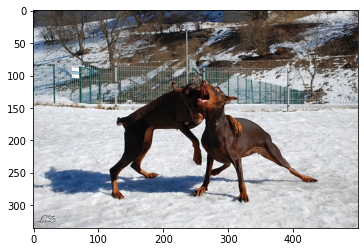

In [21]:
max_length = 32
tokenizer = load(open("tokenizer.p","rb"))
model = load_model('models/model_9.h5')
xception_model = Xception(include_top=False, pooling="avg")
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)

# TEXT-TO-SPEECH

In [22]:
import pyttsx3
engine = pyttsx3.init()
text = description[6:len(description)-4]
voices = engine.getProperty("voices")
engine.setProperty("voice", voices[2].id)
engine.setProperty("rate", 130)
engine.say(text)
engine.runAndWait()

# Train Without Progressive Loading

In [1]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

In [42]:
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos, vocab_size):
    X1, X2, y = list(), list(), list()
    # walk through each image identifier
    for key, desc_list in descriptions.items():
        # walk through each description for the image
        for desc in desc_list:
            # encode the sequence
            seq = tokenizer.texts_to_sequences([desc])[0]
            # split one sequence into multiple X,y pairs
            for i in range(1, len(seq)):
                # split into input and output pair
                in_seq, out_seq = seq[:i], seq[i]
                # pad input sequence
                in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                # encode output sequence
                out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                # store
                X1.append(photos[key][0])
                X2.append(in_seq)
                y.append(out_seq)
    return array(X1), array(X2), array(y)

In [43]:
# define the captioning model
def define_model(vocab_size, max_length):
    # feature extractor model
    inputs1 = Input(shape=(4096,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)
    # sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)
    # decoder model
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [44]:
# prepare training sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features, vocab_size)

MemoryError: Unable to allocate 8.65 GiB for an array with shape (306404, 7577) and data type float32